# ANALYZING THE EUROPEAN PLATFORM EU-CITIZEN.SCIENCE

## NECESSARY IMPORTS

In [1]:
#NECESSARY IMPORTS
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
#To show all columns
pd.options.display.max_columns = None

In [2]:
!pip install nltk
import nltk

In [3]:
#To import all functions from the functions_t.ipnyb created file
!pip install nbimporter
import nbimporter
from functions_t import *

## GETTING THE DATA

### EUROPEAN PROJECTS

In [4]:
#IMPORTING THE DATA
OUTPUT_FILENAME = "./Data/european_data/EuropeanProjects.json"#data path

with open(OUTPUT_FILENAME, 'r', encoding='utf-8') as f:
    project_dictionaries_list_european = json.load(f)

In [5]:
#Convert to pandas dataframe
dataframe_EU=pd.DataFrame.from_dict(project_dictionaries_list_european)
dataframe_EU[:5]
#European projects dataframe with all the columns got from the API request get.

id                                   name  \
0  184                             Vespawatch   
1  185                   Looking for Cowslips   
2    2                The Ladybird Experiment   
3  226  MammalNet: Watch Wildlife for Science   
4   48                               GripeNet   

                                                 aim  \
0  <p>Vespawatch targets beekeepers and the publi...   
1  <p>The aim of the project is to examine the pa...   
2  <p><span class="freebirdFormviewerViewItemsIte...   
3  <ul>\r\n\t<li>&nbsp;&nbsp;&nbsp; To engage cit...   
4  Ajude-nos a monitorizar a epidemia da gripe, e...   

                                         description  \
0  <p>Vespawatch target beekeepers, the public an...   
1  <p>Participants are expected to observe the pa...   
2  <p>Humans are affecting nature in different wa...   
3  <p><strong>MammalNe</strong>t is a partnership...   
4  A ideia de monitorizar a epidemia sazonal de g...   

                                            keywords  \
0  [{'id': 3, 'keyword': 'Biodiversity'}, {'id': ...   
1             [{'id': 3, 'keyword': 'Biodiversity'}]   
2  [{'id': 4, 'keyword': 'Artificial Intelligence...   
3                                                 []   
4  [{'id': 105, 'keyword': 'Influenza'}, {'id': 5...   

                                       status  \
0               {'id': 2, 'status': 'Active'}   
1  {'id': 3, 'status': 'Periodically active'}   
2            {'id': 5, 'status': 'Completed'}   
3               {'id': 2, 'status': 'Active'}   
4               {'id': 2, 'status': 'Active'}   

                                               topic  start_date    end_date  \
0  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top...  2018-02-01        None   
1                                                 []  2021-03-15  2021-06-15   
2  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,...  2018-06-01  2018-09-30   
3  [{'id': 1, 'topic': 'Agriculture & Veterinary ...        None        None   
4         [{'id': 17, 'topic': 'Health & Medicine'}]        None        None   

                                                 url  \
0                             https://vespawatch.be/   
1                                    www.cowslips.eu   
2  https://forskarfredag.se/forskarfredags-massex...   
3                                      mammalnet.com   
4                            http://www.gripenet.pt/   

                                    mainOrganisation  \
0  {'id': 66, 'dateCreated': '2020-11-18T08:11:14...   
1  {'id': 67, 'dateCreated': '2020-11-18T16:11:09...   
2                                               None   
3  {'id': 75, 'dateCreated': '2020-11-25T12:44:06...   
4                                               None   

                                        organisation   latitude   longitude  \
0                                                 []  50.866595    4.350256   
1  [{'id': 6, 'dateCreated': '2020-09-08T06:48:03...  22.897683  -40.356445   
2                                                 []  59.309647   17.881920   
3  [{'id': 6, 'dateCreated': '2020-09-08T06:48:03...  38.999909   -3.923664   
4                                                 []  38.765094   -9.163992   

  country                                             image1  \
0      BE  https://eu-citizen.science/media/media/images/...   
1          https://eu-citizen.science/media/media/images/...   
2      SE  https://eu-citizen.science/media/media/images/...   
3      ES  https://eu-citizen.science/media/media/images/...   
4      PT  https://eu-citizen.science/media/media/images/...   

            imageCredit1                                             image2  \
0                                                                      None   
1                         https://eu-citizen.science/media/media/images/...   
2  VA (Public & Science)  https://eu-citizen.science/media/media/images/...   
3                         https://eu-citizen.science/media/media/images/

In [6]:
dataframe_EU.info()
#We see that the dataframe contains 176 entries, which means 176 projects. Not all variables are filled in the projects, so 
#here it can be seen the amount of null values each column has. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                176 non-null    int64 
 1   name              176 non-null    object
 2   aim               176 non-null    object
 3   description       176 non-null    object
 4   keywords          176 non-null    object
 5   status            176 non-null    object
 6   topic             176 non-null    object
 7   start_date        139 non-null    object
 8   end_date          82 non-null     object
 9   url               176 non-null    object
 10  mainOrganisation  54 non-null     object
 11  organisation      176 non-null    object
 12  latitude          176 non-null    object
 13  longitude         176 non-null    object
 14  country           176 non-null    object
 15  image1            164 non-null    object
 16  imageCredit1      175 non-null    object
 17  image2          

In [7]:
print('There are several columns that may not be interesting for analysing, so we will see which of them are useful.')
print('The images columns will not be selected since they do not contain any interesting information. ')
print('Some variables will now be analysed to see if they contain useful information or are empty for most entries')


There are several columns that may not be interesting for analysing, so we will see which of them are useful.
The images columns will not be selected since they do not contain any interesting information. 
Some variables will now be analysed to see if they contain useful information or are empty for most entries


In [8]:
#originDatabase
print("The originDatabase column has ", sum(dataframe_EU["originDatabase"].isna()), " null values. And only ", sum(dataframe_EU["originDatabase"].notnull()), " that are not null. Those entries are the following:")
dataframe_EU[dataframe_EU["originDatabase"].notnull()].head()

The originDatabase column has  173  null values. And only  3  that are not null. Those entries are the following:


id                                               name  \
11   181  SCENT - Smart Toolbox for Engaging Citizens in...   
26   237                                               HOOP   
175  229                                           FLAMENCO   

                                                   aim  \
11   Europe has invested a significant amount of re...   
26   <p>The&nbsp;<strong>HOOP project</strong>&nbsp...   
175  <p>The goal of FLAMENCO is to build and valori...   

                                           description  \
11   The project designed, developed and implemente...   
26   <p>HOOP addresses the challenge of boosting Ur...   
175  <p>FLAMENCO&rsquo;s valorisation strategy&nbsp...   

                                              keywords  \
11   [{'id': 32, 'keyword': 'Citizen Observatories'...   
26   [{'id': 40, 'keyword': 'Citizen Science'}, {'i...   
175  [{'id': 95, 'keyword': 'Citizen Observatory'},...   

                               status  \
11   {'id': 5, 'status': 'Completed'}   
26      {'id': 2, 'status': 'Active'}   
175  {'id': 5, 'status': 'Completed'}   

                                                 topic  start_date  \
11   [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11...  2016-09-01   
26   [{'id': 9, 'topic': 'Chemical sciences'}, {'id...  2020-09-30   
175            [{'id': 29, 'topic': 'Transportation'}]  2016-01-01   

       end_date                                          url  \
11   2019-08-31                    https://scent-project.eu/   
26   2024-09-30                      https://hoopproject.eu/   
175  2019-12-31  http://soft.vub.ac.be/soft/content/flamenco   

                                      mainOrganisation  \
11   {'id': 62, 'dateCreated': '2020-11-13T09:04:19...   
26                                                None   
175  {'id': 88, 'dateCreated': '2020-12-18T13:32:12...   

                                          organisation   latitude  longitude  \
11                                                  []  37.987871  23.731715   
26   [{'id': 2, 'dateCreated': '2021-03-12T16:14:44...  38.063432  -1.671800   
175                                                 []  51.096246   4.178629   

    country                                             image1 imageCredit1  \
11       GR  https://eu-citizen.science/media/media/images/...                
26       ES  https://eu-citizen.science/media/media/images/...                
175      BE  https://eu-citizen.science/media/media/images/...                

                                                image2 imageCredit2  \
11   https://eu-citizen.science/media/media/images/...                
26   https://eu-citizen.science/media/media/images/...                
175                                               None                

                                                image3 imageCredit3  host  \
11   https://eu-citizen.science/media/media/images/...               None   
26   https://eu-citizen.science/media/media/images/...               None   
175  https://eu-citizen.science/media/media/images/...               None   

                                      howToParticipate  doingAtHome equipment  \
11   The SCENT community is continuously increasing...         True             
26   <p>At an early stage, Citizen Science interven...        False             
175  <p>The FLAMENCO platform enables everyone to c...        False             

                                           fundingBody fundingProgram  \
11            {'id': 6, 'body': 'European Commission'}                  
26            {'id': 6, 'body': 'European Commission'}                  
175  {'id': 34, 'body': 'Flemish Agency for Innovat...                  

                            originDatabase  \
11   {'id': 1, 'originDatabase': 'CORDIS'}   
26   {'id': 1, 'originDatabase': 'CORDIS'}   
175  {'id': 1, 'originDatabase': 'CORDIS'}   

                                      originURL                   originUID  \
11  

It can be seen that only three projects have filled the originDatabase field, and for all of them this origin database is CORDIS, which is the main source of results for the projects financed by the European funds since 1990. In fact, there is a "CORDIS - EU research projects under Horizon 2020 (2014-2020)" dataset which contains projects and organisations funded by the European Union under the Horizon 2020 framework programme for research and innovation from 2014 to 2020.

In [9]:
#originURL
print("The originURL column has ", len(dataframe_EU[dataframe_EU["originURL"]==""]), " null values. And only ", len(dataframe_EU[dataframe_EU["originURL"]!=""]), " that are not null. Those entries are the following:")
dataframe_EU[dataframe_EU["originURL"]!=""]

The originURL column has  168  null values. And only  8  that are not null. Those entries are the following:


id                                               name  \
11   181  SCENT - Smart Toolbox for Engaging Citizens in...   
116  113                       Vadonleső (The WildWatcher)    
123  117                             Schools and Satellites   
125  122                                       Liquencity·2   
132   96                                  Frogs on the road   
138  138                     Dawn Chorus - Stop and listen!   
143  149                        Topotheque | Local History    
173   74                                     X-Polli:nation   

                                                   aim  \
11   Europe has invested a significant amount of re...   
116  The objective of the project is to encourage n...   
123  Schools and Satellites (SaS) aims to better qu...   
125  The goal of Liquencity·2 is to use bioindicato...   
132  With help of volunteers, rescuing frogs from t...   
138  With #DawnChorus (www.dawn-chorus.org) we want...   
143  Topotheque is a platform on which Citizen Scie...   
173  <p>The X-Polli:Nation project aims to get comm...   

                                           description  \
11   The project designed, developed and implemente...   
116  The observation of the widespread and relative...   
123  Together with many teachers and their students...   
125  Liquencity·2 represents the continuation of th...   
132  Volunteers are called in to help transfer amph...   
138  Shortly before sunrise is when many bird speci...   
143  The Topotheque consists of two elements: the a...   
173  <p>The project has been developed in the frame...   

                                              keywords  \
11   [{'id': 32, 'keyword': 'Citizen Observatories'...   
116                                                 []   
123                                                 []   
125                                                 []   
132                                                 []   
138  [{'id': 3, 'keyword': 'Biodiversity'}, {'id': ...   
143                                                 []   
173  [{'id': 124, 'keyword': 'Id Tools'}, {'id': 12...   

                                         status  \
11             {'id': 5, 'status': 'Completed'}   
116               {'id': 2, 'status': 'Active'}   
123              {'id': 4, 'status': 'On hold'}   
125              {'id': 4, 'status': 'On hold'}   
132  {'id': 3, 'status': 'Periodically active'}   
138  {'id': 3, 'status': 'Periodically active'}   
143               {'id': 2, 'status': 'Active'}   
173               {'id': 2, 'status': 'Active'}   

                                                 topic  start_date  \
11   [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11...  2016-09-01   
116  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top...  2009-09-01   
123  [{'id': 10, 'topic': 'Climate & Weather'}, {'i...  2020-05-15   
125  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 7,...  2020-01-01   
132  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11...  2012-01-01   
138  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top...  2020-05-01   
143                                                 []  2014-01-01   
173  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11...  2019-01-03   

       end_date                                     url  \
11   2019-08-31               https://scent-project.eu/   
116        None            https://xn--vadonles-8sb.hu/   
123  2020-12-20  https://tahmo.org/schoolandsatellites/   
125  2020-12-31                     www.liquencity2.org   
132        None           http://konnad.elfond.ee/index   
138        None             https://dawn-chorus.org/en/   
143        None             https://www.topothek.at/de/   
173  2021-12-31               https://xpollination.org/   

                                      mainOrganisation  \
11   {'id': 62, 'dateCreated': '2020-11-13T09:04:19...   
116                                               None   
123                                               None   
125           

In [10]:
#originUID
print("The originUID column has ", len(dataframe_EU[dataframe_EU["originUID"]==""]), " null values. And only ", len(dataframe_EU[dataframe_EU["originUID"]!=""]), " that are not null. Those entries are the following:")
dataframe_EU[dataframe_EU["originUID"]!=""]

The originUID column has  172  null values. And only  4  that are not null. Those entries are the following:


id                                               name  \
11   181  SCENT - Smart Toolbox for Engaging Citizens in...   
65    94                                     My Naturesound   
118  115                             Bürger schaffen Wissen   
173   74                                     X-Polli:nation   

                                                   aim  \
11   Europe has invested a significant amount of re...   
65   Collect biodiversity observations which are ba...   
118  Bürger schaffen Wissen is the central platform...   
173  <p>The X-Polli:Nation project aims to get comm...   

                                           description  \
11   The project designed, developed and implemente...   
65   An ongoing biodiversity observation project wh...   
118  "The online plattform Bürger schaffen Wissen i...   
173  <p>The project has been developed in the frame...   

                                              keywords  \
11   [{'id': 32, 'keyword': 'Citizen Observatories'...   
65                                                  []   
118                                                 []   
173  [{'id': 124, 'keyword': 'Id Tools'}, {'id': 12...   

                               status  \
11   {'id': 5, 'status': 'Completed'}   
65      {'id': 2, 'status': 'Active'}   
118     {'id': 2, 'status': 'Active'}   
173     {'id': 2, 'status': 'Active'}   

                                                 topic  start_date  \
11   [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11...  2016-09-01   
65   [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top...  2015-08-01   
118                                                 []  2013-11-01   
173  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11...  2019-01-03   

       end_date                                                url  \
11   2019-08-31                          https://scent-project.eu/   
65         None  https://www.natmuseum.ut.ee/et/content/%C3%A4p...   
118  2022-12-31              https://www.buergerschaffenwissen.de/   
173  2021-12-31                          https://xpollination.org/   

                                      mainOrganisation  \
11   {'id': 62, 'dateCreated': '2020-11-13T09:04:19...   
65                                                None   
118                                               None   
173                                               None   

                                          organisation   latitude  longitude  \
11                                                  []  37.987871  23.731715   
65                                                  []  58.373578  26.716357   
118                                                 []  52.515478  13.390990   
173  [{'id': 1, 'dateCreated': '2021-05-06T07:47:15...  51.500146  -0.171964   

    country                                             image1  \
11       GR  https://eu-citizen.science/media/media/images/...   
65       EE  https://eu-citizen.science/media/media/images/...   
118      DE  https://eu-citizen.science/media/media/images/...   
173      GB  https://eu-citizen.science/media/media/images/...   

                   imageCredit1  \
11                                
65                                
118  Copyright: Karo Krämer/WiD   
173                        None   

                                                image2 imageCredit2  \
11   https://eu-citizen.science/media/media/images/...                
65   https://eu-citizen.science/media/media/images/...                
118  https://eu-citizen.science/media/media/images/...                
173  https://eu-citizen.science/media/media/images/...         None   

                                                image3  \
11   https://eu-citizen.science/media/media/images/...   
65   https://eu-citizen.science/media/media/images/...   
118  https://eu-citizen.science/media/media/images/...   
173  https://eu-citizen.science/media/media/images/...   

                   imageCredit3  \
11                          

In [11]:
#origin
print("The origin column has ", sum(dataframe_EU["origin"].isna())+len(dataframe_EU[dataframe_EU["origin"]==""]), " null values. Therefore, any project contains a origin value.")

The origin column has  176  null values. Therefore, any project contains a origin value.


In [12]:
print('In consequence, the previous fields will not be selected for the analysis since they do not provide any useful information. So only the desired columns will now be selected ( and reorganized for a better understanding)')
print('The EU_projects dataframe will be the one used from now on.')
#Reordering dataframe columns for a better understanding
EU_projects=dataframe_EU[['id', 'name', 'url', 'aim', 'description', 'howToParticipate', 'equipment', 'keywords', 'topic', 'start_date', 'end_date', 'dateCreated', 'status', 'host', 'mainOrganisation', 'organisation', 'fundingBody', 'fundingProgram', 'country',  'latitude', 'longitude',  'doingAtHome', 'featured']].copy()

In consequence, the previous fields will not be selected for the analysis since they do not provide any useful information. So only the desired columns will now be selected ( and reorganized for a better understanding)
The EU_projects dataframe will be the one used from now on.


In [14]:
#CORRECT SOME VARIABLE TYPES
#convert latitude and longitude to floats
EU_projects["longitude"]=EU_projects["longitude"].astype(float)
EU_projects["latitude"]=EU_projects["latitude"].astype(float)
#convert dates to datetime types
EU_projects['start_date'] = pd.to_datetime(EU_projects['start_date'])
EU_projects['end_date'] = pd.to_datetime(EU_projects['end_date'])
EU_projects['dateCreated'] = pd.to_datetime(EU_projects['dateCreated'])
EU_projects['dateCreated'] = pd.to_datetime(EU_projects['dateCreated']).dt.tz_localize(None)
#to check that all variable types are correct
EU_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                176 non-null    int64         
 1   name              176 non-null    object        
 2   url               176 non-null    object        
 3   aim               176 non-null    object        
 4   description       176 non-null    object        
 5   howToParticipate  176 non-null    object        
 6   equipment         175 non-null    object        
 7   keywords          176 non-null    object        
 8   topic             176 non-null    object        
 9   start_date        139 non-null    datetime64[ns]
 10  end_date          82 non-null     datetime64[ns]
 11  dateCreated       176 non-null    datetime64[ns]
 12  status            176 non-null    object        
 13  host              129 non-null    object        
 14  mainOrganisation  54 non-n

## ANALYSING EUROPEAN PROJECTS: TEXT MINING

### DESCRIPTION

In [15]:
EU_projects['description_clean'] = EU_projects.description.apply(lambda text: clean_text(text))
# Get the nltk.Text object (tokens)
description_tokens = convert_to_nltk_text(EU_projects, "description_clean")
description_std_tokens = standardize_text(description_tokens, "english")
EU_projects['description_clean'] = EU_projects.description_clean.apply(lambda text: standardize_text(text, "english"))

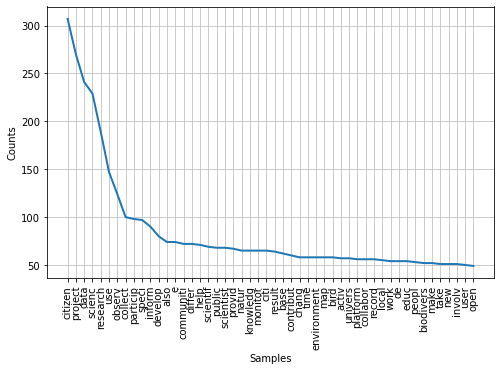

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.figure(figsize = (8,5))
nltk.FreqDist(description_std_tokens).plot(50)


The vocabulary is composed by 176 words 



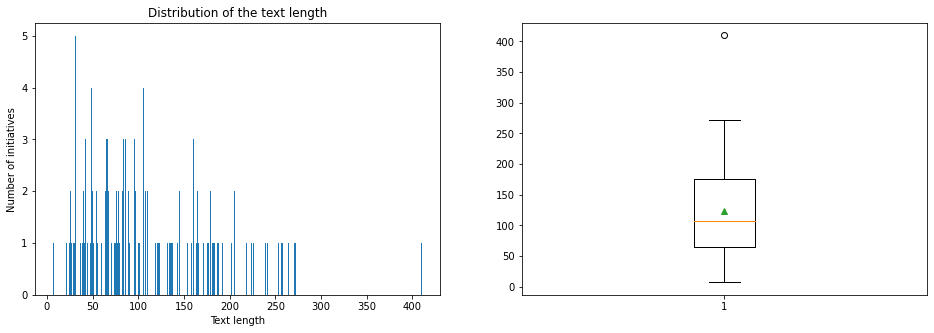

In [18]:
plot_text_length_distribution(dataset = EU_projects,
                              text_field = 'description_clean')

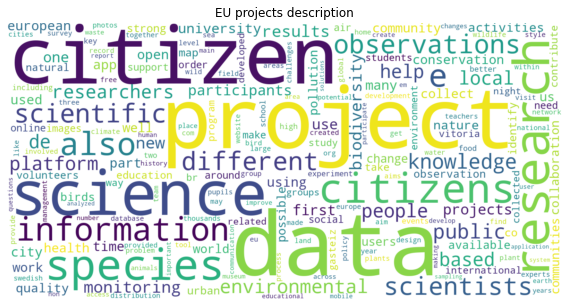

In [19]:
bag_of_words_desc, stemmed_desc=get_bagofwords(EU_projects, "description", "english")
plot_wordcloud("EU projects description", bag_of_words_desc)

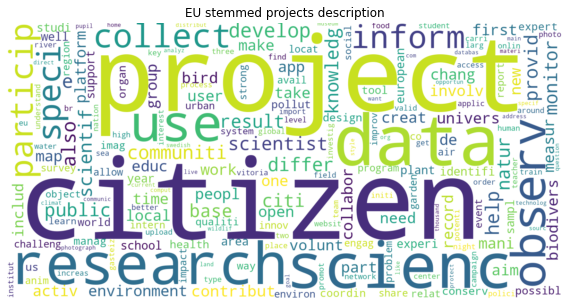

In [20]:
plot_wordcloud("EU stemmed projects description", stemmed_desc)

In [21]:
#More repetaed words for the original description texts
sorted(bag_of_words_desc.items(), key= lambda x: x[1], reverse=True)[:5]

[('data', 241),
 ('project', 221),
 ('citizen', 219),
 ('science', 215),
 ('research', 133)]

In [22]:
#More repetaed words for the stemmed description texts
sorted(stemmed_desc.items(), key= lambda x: x[1], reverse=True)[:5]

[('citizen', 307),
 ('project', 270),
 ('data', 241),
 ('scienc', 229),
 ('research', 189)]

In [24]:
tfidfs = []
EU_projects["description_resultwords"]=np.empty((len(EU_projects), 0)).tolist()
document_size=len(EU_projects)
# calculate tf
for index, row in EU_projects.iterrows():
    tfidf = TFIDF(row["description_clean"])
    tfidf.tf()
    tfidfs.append(tfidf)
# calculate idf
all_text = [tfidf.text for tfidf in tfidfs]
    
for i, tfidf in enumerate(tfidfs):
    tfidf.idf(all_text, document_size)
    tfidf.tf_idf()
    result_df = tfidf.text_df.sort_values('tfidf', ascending=False).head(5)  # sort and take top 5
    result_words = []
    for index, row in result_df.iterrows():
        result_words.append((row.word, row.tfidf))
        EU_projects.loc[i, "description_resultwords"].append((row.word, row.tfidf))
    '''print(i)
    print(tfidf.data, result_words)'''


### AIM

The same analysis than for the descriptions is done: cleaning and standardizing the text, getting the most repeated tokens (stemmed and not), showing the text length distribution and finally performing a tf-idf analysis to get the five most relevant words for each project aim. 

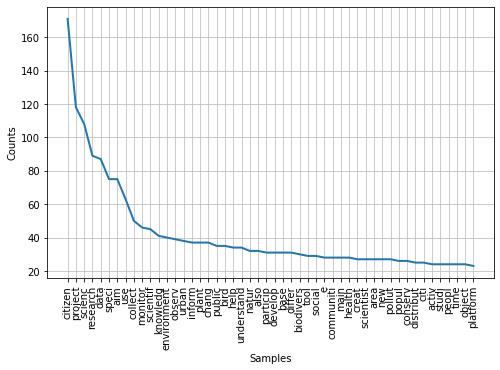

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
EU_projects['aim_clean'] = EU_projects.aim.apply(lambda text: clean_text(text))
# Get the nltk.Text object
aim_tokens = convert_to_nltk_text(EU_projects, "aim_clean")
aim_std_tokens = standardize_text(aim_tokens, "english")
EU_projects['aim_clean'] = EU_projects.aim_clean.apply(lambda text: standardize_text(text, "english"))
plt.figure(figsize = (8,5))
nltk.FreqDist(aim_std_tokens).plot(50)


The vocabulary is composed by 175 words 



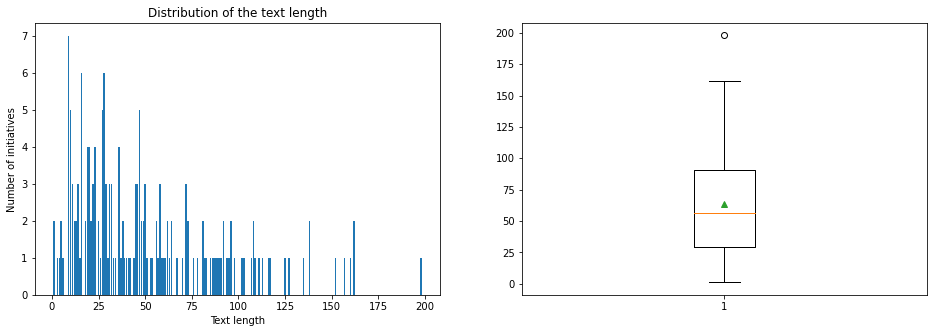

In [26]:
plot_text_length_distribution(dataset = EU_projects,
                              text_field = 'aim_clean')

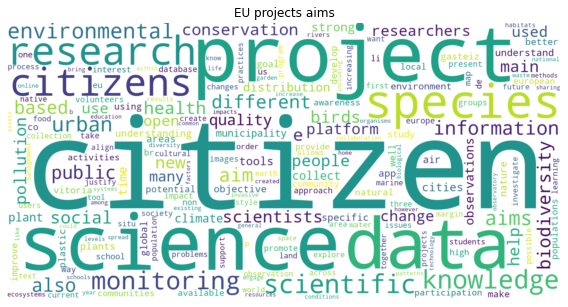

In [27]:
bag_of_words_aim, stemmed_aim=get_bagofwords(EU_projects, "aim", "english")
plot_wordcloud("EU projects aims", bag_of_words_aim)

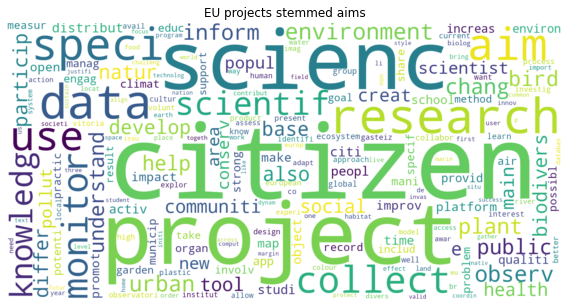

In [28]:
plot_wordcloud("EU projects stemmed aims", stemmed_aim)

In [29]:
sorted(stemmed_aim.items(), key= lambda x: x[1], reverse=True)[:5]

[('citizen', 171),
 ('project', 118),
 ('scienc', 108),
 ('research', 89),
 ('data', 87)]

In [30]:
tfidfs = []
EU_projects["aim_resultwords"]=np.empty((len(EU_projects), 0)).tolist()
document_size=len(EU_projects)
# calculate tf
for index, row in EU_projects.iterrows():
    tfidf = TFIDF(row["aim_clean"])
    tfidf.tf()
    tfidfs.append(tfidf)
# calculate idf

all_text = [tfidf.text for tfidf in tfidfs]
    
for i, tfidf in enumerate(tfidfs):
    tfidf.idf(all_text, document_size)
    tfidf.tf_idf()
    result_df = tfidf.text_df.sort_values('tfidf', ascending=False).head(5)  # sort and take top 5
    result_words = []
    for index, row in result_df.iterrows():
        result_words.append((row.word, row.tfidf))
        EU_projects.loc[i, "aim_resultwords"].append((row.word, row.tfidf))
    '''print(i)
    print(tfidf.data, result_words)'''

### howToParticipate

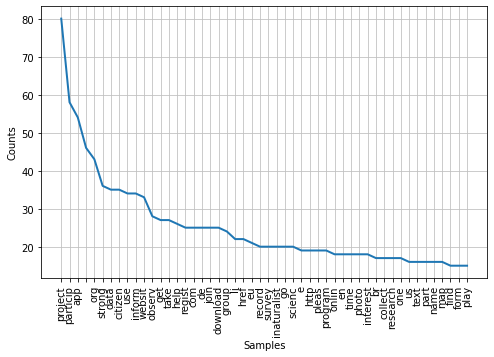

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
EU_projects['howToParticipate_clean'] = EU_projects.howToParticipate.apply(lambda text: clean_text(text))
# Get the nltk.Text object
howToParticipate_tokens = convert_to_nltk_text(EU_projects, "howToParticipate_clean")
howToParticipate_std_tokens = standardize_text(howToParticipate_tokens, "english")
EU_projects['howToParticipate_clean'] = EU_projects.howToParticipate_clean.apply(lambda text: standardize_text(text, "english"))
plt.figure(figsize = (8,5))
nltk.FreqDist(howToParticipate_std_tokens).plot(50)


The vocabulary is composed by 139 words 



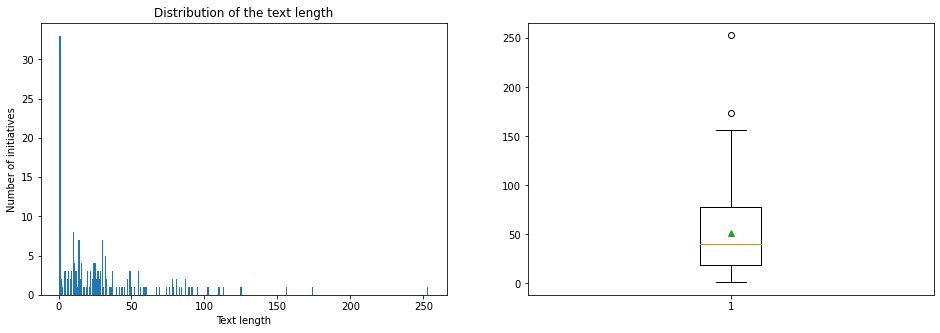

In [32]:
plot_text_length_distribution(dataset = EU_projects,
                              text_field = 'howToParticipate_clean')

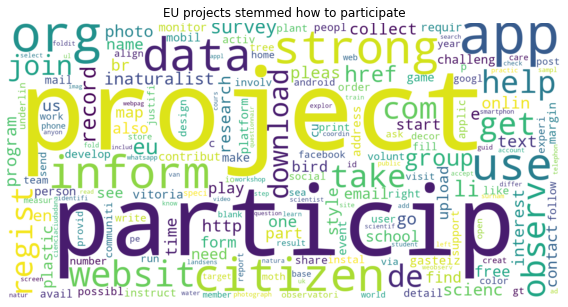

In [33]:
bag_of_words_howToParticipate, stemmed_howToParticipate=get_bagofwords(EU_projects, "howToParticipate", "english")
plot_wordcloud("EU projects stemmed how to participate", stemmed_howToParticipate)

In [34]:
sorted(stemmed_howToParticipate.items(), key= lambda x: x[1], reverse=True)[:5]

[('project', 80), ('particip', 58), ('app', 54), ('org', 43), ('strong', 36)]

### Equipment

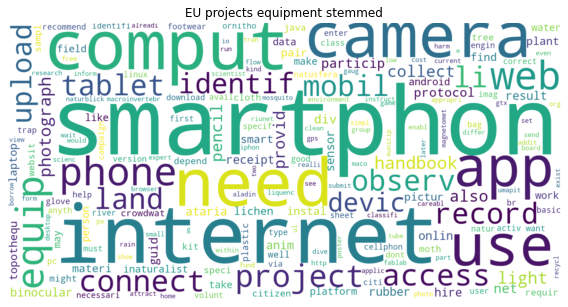

In [35]:
bag_of_words_equipment, equipment_stemmed=get_bagofwords(EU_projects, "equipment", "english")
plot_wordcloud("EU projects equipment stemmed", equipment_stemmed)

In [36]:
sorted(equipment_stemmed.items(), key= lambda x: x[1], reverse=True)[:5]

[('smartphon', 41),
 ('internet', 29),
 ('comput', 29),
 ('need', 27),
 ('camera', 27)]

### Join equipment and howToParticipate in needed field, since the needed material can be mentioned in both fields

In [37]:
app = ['app']
camera= ["camera", "image", "video", "photo"]
phone= ["phone"]
internet=["internet"]
computer=["computer"]
gps= ["gps"]
nothing=["nothing", "anything", "no equipment"]


In [38]:
# assign data of lists.  
needed_dict = {'id': [0,1,2,3,4,5,6], 'name': ['app', 'camera', 'phone', 'internet', 'computer', 'gps', 'nothing'], 'num_appears': [0,0,0,0,0,0,0], "projects_list": [[], [], [], [], [], [], []]}  
# Create DataFrame  
needed_df = pd.DataFrame(needed_dict)  
#add column to dataframe with how to participate list
EU_projects['needed_list'] = np.empty((len(EU_projects), 0)).tolist()
needed_list=['app', 'camera', 'phone', 'internet', 'computer', 'gps', 'nothing']

for index, row in EU_projects.iterrows():
    if row.equipment is not None:
        if any(x.lower() in row['equipment'].lower() for x in app) or any(x.lower() in row['howToParticipate'].lower() for x in app):
            needed_df.loc[0, "num_appears"]=needed_df.loc[0, "num_appears"]+1
            needed_df.loc[0, "projects_list"].append(row["id"])
            row["needed_list"].append("app")

        if any(x.lower() in row['equipment'].lower() for x in camera) or any(x.lower() in row['howToParticipate'].lower() for x in camera):
            needed_df.loc[1, "num_appears"]=needed_df.loc[1, "num_appears"]+1 
            needed_df.loc[1, "projects_list"].append(row["id"])
            row["needed_list"].append("camera")

        if any(x.lower() in row['equipment'].lower() for x in phone) or any(x.lower() in row['howToParticipate'].lower() for x in phone):
            needed_df.loc[2, "num_appears"]=needed_df.loc[2, "num_appears"]+1
            needed_df.loc[2, "projects_list"].append(row["id"])
            row["needed_list"].append("phone")

        if any(x.lower() in row['equipment'].lower() for x in internet) or any(x.lower() in row['howToParticipate'].lower() for x in internet):
            needed_df.loc[3, "num_appears"]=needed_df.loc[3, "num_appears"]+1
            needed_df.loc[3, "projects_list"].append(row["id"])
            row["needed_list"].append("internet")

        if any(x.lower() in row['equipment'].lower() for x in computer) or any(x.lower() in row['howToParticipate'].lower() for x in computer):
            needed_df.loc[4, "num_appears"]=needed_df.loc[4, "num_appears"]+1
            needed_df.loc[4, "projects_list"].append(row["id"])
            row["needed_list"].append("computer")

        if any(x.lower() in row['equipment'].lower() for x in gps) or any(x.lower() in row['howToParticipate'].lower() for x in gps):
            needed_df.loc[5, "num_appears"]=needed_df.loc[5, "num_appears"]+1
            needed_df.loc[5, "projects_list"].append(row["id"])
            row["needed_list"].append("gps")

        if any(x.lower() in row['equipment'].lower() for x in nothing) or any(x.lower() in row['howToParticipate'].lower() for x in nothing):
            needed_df.loc[6, "num_appears"]=needed_df.loc[6, "num_appears"]+1
            needed_df.loc[6, "projects_list"].append(row["id"])
            row["needed_list"].append("nothing")
        
needed_df = needed_df.sort_values(by=['num_appears'], ascending=False)
needed_df

id      name  num_appears  \
2   2     phone           68   
0   0       app           56   
1   1    camera           40   
4   4  computer           30   
3   3  internet           27   
6   6   nothing            6   
5   5       gps            5   

                                       projects_list  
2  [185, 226, 228, 180, 163, 247, 182, 25, 233, 2...  
0  [226, 180, 163, 247, 182, 227, 233, 232, 69, 2...  
1  [226, 228, 180, 182, 233, 232, 47, 153, 244, 1...  
4  [226, 230, 59, 240, 54, 235, 153, 246, 43, 116...  
3  [185, 226, 228, 180, 230, 47, 72, 235, 153, 24...  
6                       [17, 172, 178, 26, 114, 148]  
5                             [232, 23, 31, 98, 109]

In [39]:
needed_list=['app', 'camera', 'phone', 'internet', 'computer', 'gps', 'nothing']

needed_EU=EU_projects[['id', 'name']].copy()
for element in needed_list:
    needed_EU[element]=False
    
for index, row in EU_projects.iterrows():
    for element in needed_list:
        if element in row["needed_list"]:
            needed_EU.loc[index,[element]]=True
            
EU_projects["ne_app"]=needed_EU["app"]
EU_projects["ne_camera"]=needed_EU["camera"]
EU_projects["ne_phone"]=needed_EU["phone"]
EU_projects["ne_internet"]=needed_EU["internet"]
EU_projects["ne_computer"]=needed_EU["computer"]
EU_projects["ne_gps"]=needed_EU["gps"]
EU_projects["ne_nothing"]=needed_EU["nothing"]
needed_EU[:5]

id                                   name    app  camera  phone  internet  \
0  184                             Vespawatch  False   False  False     False   
1  185                   Looking for Cowslips  False   False   True      True   
2    2                The Ladybird Experiment  False   False  False     False   
3  226  MammalNet: Watch Wildlife for Science   True    True   True      True   
4   48                               GripeNet  False   False  False     False   

   computer    gps  nothing  
0     False  False    False  
1     False  False    False  
2     False  False    False  
3      True  False    False  
4     False  False    False

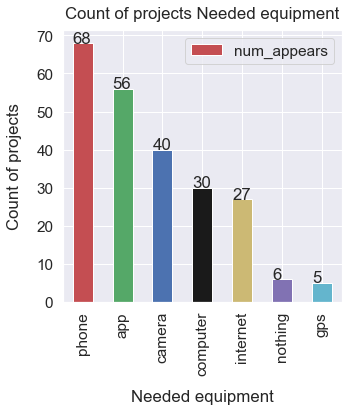

In [40]:
plot_countplot3(needed_df, "name", "num_appears", "Needed equipment", "projects")

## MORE ANALYSIS

### Keywords

In [41]:
#Generating three new columns: keywords_list, topics_list and status_, in order to show these variables in a more understandable way (there are with lists of dictionaries)
EU_projects['keywords_list'] = np.empty((len(EU_projects), 0)).tolist()
EU_projects['topics_list'] = np.empty((len(EU_projects), 0)).tolist()
EU_projects['status_']=np.nan

df_keywords_e = pd.DataFrame(columns=['id', 'keyword', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    for keyword in row["keywords"]:
        row['keywords_list'].append(keyword['keyword'])
    for topic in row.topic:
        row['topics_list'].append(topic['topic'])
    
    EU_projects.loc[index,['status_']]=row["status"]["status"]


In [42]:
#GENERATING A KEYWORDS DATAFRAME
np.empty((len(EU_projects), 0)).tolist()    

df_keywords_e = pd.DataFrame(columns=['id', 'keyword', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    for keyword in row["keywords"]:
        if keyword['id'] not in df_keywords_e['id'].unique():
            new_row = {'id':keyword['id'], 'keyword':keyword['keyword'], 'num_times_appears':1, 'list_projects': list()}
            new_row["list_projects"].append(row["id"])
            df_keywords_e = df_keywords_e.append(new_row, ignore_index=True)
        else:
            index_ = df_keywords_e.index[df_keywords_e['id'] == keyword['id']]
            df_keywords_e.loc[index_, 'num_times_appears'] = df_keywords_e.loc[index_, 'num_times_appears'] +1
            for index2, row2 in df_keywords_e.iterrows():
                if index2==index_:
                    row2["list_projects"].append(row["id"])

In [43]:
df_keywords_e = df_keywords_e.sort_values(by=['num_times_appears'], ascending=False)
df_keywords_e[:5]

id          keyword num_times_appears  \
0    3     Biodiversity                16   
2   40  Citizen Science                13   
4    5       Monitoring                11   
29  22      Environment                10   
5   23           Nature                 9   

                                        list_projects  
0   [184, 185, 2, 182, 232, 42, 90, 15, 22, 63, 68...  
2   [184, 183, 237, 21, 27, 28, 40, 134, 140, 165,...  
4    [184, 2, 48, 182, 170, 51, 52, 63, 124, 165, 78]  
29     [237, 177, 13, 22, 68, 70, 109, 158, 165, 254]  
5           [184, 182, 232, 47, 177, 14, 63, 68, 176]

We observe that there are 181 different keywords, where the most used ones are Biodiversity, Citizen Science and Monitoring. 

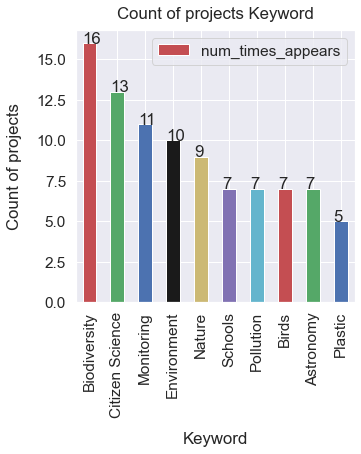

In [44]:
#Barplot with the most repeated keywords
plot_countplot3(df_keywords_e.head(10), "keyword", "num_times_appears", "Keyword", "projects")

In [45]:
#To see all keywords
'''print(len(df_keywords_e))
df_keywords_e.keyword.unique()'''

'print(len(df_keywords_e))\ndf_keywords_e.keyword.unique()'

### TOPICS

In [46]:
#CREATING A TOPICS DATAFRAME
df_topics_e = pd.DataFrame(columns=['id', 'topic', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    for topic in row.topic:
        if topic['id'] not in df_topics_e['id'].unique():
            new_row = {'id':topic['id'], 'topic':topic['topic'], 'num_times_appears':1, 'list_projects':list()}
            new_row["list_projects"].append(row["id"])
            df_topics_e = df_topics_e.append(new_row, ignore_index=True)
        else:
            index_ = df_topics_e.index[df_topics_e['id'] == topic['id']]
            df_topics_e.loc[index_, 'num_times_appears'] = df_topics_e.loc[index_, 'num_times_appears'] +1
            for index2, row2 in df_topics_e.iterrows():
                if index2==index_:
                    row2["list_projects"].append(row["id"])

In [47]:
print("There are ", len(df_topics_e), " different topics. ")
df_topics_e = df_topics_e.sort_values(by=['num_times_appears'], ascending=False)
df_topics_e[:5]

There are  29  different topics. 


id                  topic num_times_appears  \
1    5           Biodiversity                68   
2   11  Ecology & Environment                67   
10  12              Education                49   
6   23      Nature & outdoors                36   
9    7                Biology                31   

                                        list_projects  
1   [184, 2, 226, 180, 230, 247, 181, 182, 232, 47...  
2   [184, 226, 228, 180, 230, 181, 182, 227, 233, ...  
10  [226, 228, 230, 163, 247, 240, 69, 235, 106, 2...  
6   [2, 226, 230, 247, 182, 233, 232, 108, 251, 14...  
9   [226, 230, 182, 59, 236, 54, 69, 153, 108, 42,...

It can be seen that there are 29 different topics. From those, the most used ones are Biodiversity, Ecology & Environment and Education. 

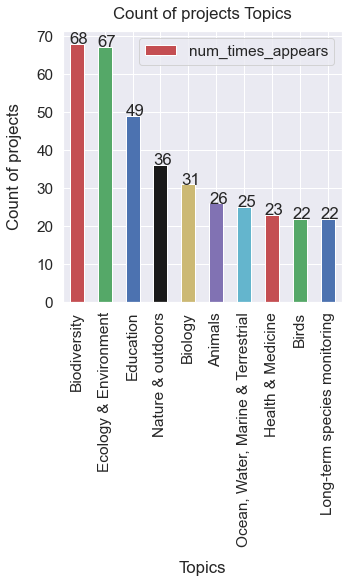

In [48]:
plot_countplot3(df_topics_e.head(10), "topic", "num_times_appears", "Topics", "projects")

In order to obtain a deeper understanding of the projects, the topics have been distinguished in four different groups (depending on their science type) that correspond to the primary disciplines of citizen science projects:

In [49]:
humanities_social=['Social sciences',  'Archaeology & Cultural', 'Indigenous culture', 'Science policy','Education','Geography']
physical_sciences=['Astronomy & Space', 'Geology & Earth science', 'Physics', 'Chemical sciences']
life_sciences=['Biodiversity', 'Ecology & Environment', 'Nature & outdoors', 'Biology', 'Animals', 'Ocean, Water, Marine & Terrestrial',
              'Birds', 'Long-term species monitoring', 'Climate & Weather', 'Insects & pollinators', 'Biogeography', 'Genetics']
applied_sciences=[ 'Health & Medicine', 'Information & Computing sciences', 'Natural resource management',
'Transportation',  'Sound', 'Food science', 'Agriculture & Veterinary science']

In [51]:
#GENERATING A TOPICS DATAFRAME
topics_list=['humanities_social', 'physical_sciences', 'life_sciences', 'applied_sciences']
count_humanities=0
count_physical=0
count_life=0
count_applied=0

topics_EU=EU_projects[['id', 'name', 'topic']].copy()
for element in topics_list:
    topics_EU[element]=False
    
for index, row in EU_projects.iterrows():
    if any(x in row['topics_list'] for x in humanities_social):
        topics_EU.loc[index,["humanities_social"]]=True
        count_humanities+=1
    if any(x in row['topics_list'] for x in physical_sciences):
        topics_EU.loc[index,["physical_sciences"]]=True
        count_physical+=1
    if any(x in row['topics_list'] for x in life_sciences):
        topics_EU.loc[index,["life_sciences"]]=True
        count_life+=1
    if any(x in row['topics_list'] for x in applied_sciences):
        topics_EU.loc[index,["applied_sciences"]]=True
        count_applied+=1
            
topics_EU[:5]

id                                   name  \
0  184                             Vespawatch   
1  185                   Looking for Cowslips   
2    2                The Ladybird Experiment   
3  226  MammalNet: Watch Wildlife for Science   
4   48                               GripeNet   

                                               topic  humanities_social  \
0  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top...              False   
1                                                 []              False   
2  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,...              False   
3  [{'id': 1, 'topic': 'Agriculture & Veterinary ...               True   
4         [{'id': 17, 'topic': 'Health & Medicine'}]              False   

   physical_sciences  life_sciences  applied_sciences  
0              False           True             False  
1              False          False             False  
2              False           True              True  
3              False           True              True  
4              False          False              True

In [52]:
print(count_humanities, " out of ", len(EU_projects), " projects belong to humanistic sciences.")
print(count_physical, " out of ", len(EU_projects), " projects belong to physical sciences.")
print(count_life, "out of ", len(EU_projects), " projects belong to life sciences.")
print(count_applied, " out of ", len(EU_projects), " projects belong to applied sciences.")

73  out of  176  projects belong to humanistic sciences.
21  out of  176  projects belong to physical sciences.
122 out of  176  projects belong to life sciences.
54  out of  176  projects belong to applied sciences.


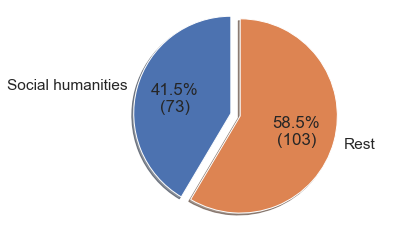

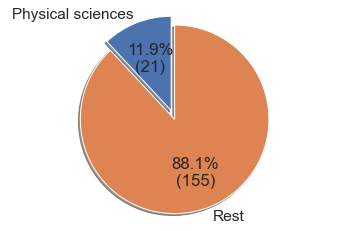

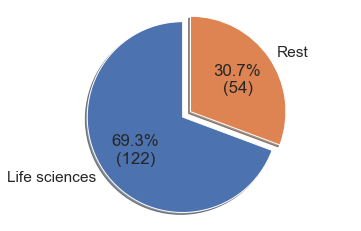

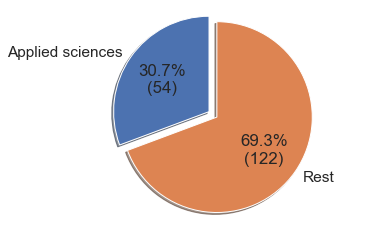

In [53]:
#PLOTTING TOPICS PROJECTS PERCENTAGES
pie_chart(EU_projects, "Social humanities", count_humanities)
pie_chart(EU_projects, "Physical sciences", count_physical)
pie_chart(EU_projects, "Life sciences", count_life)
pie_chart(EU_projects, "Applied sciences", count_applied)

In [54]:
#ADDING THE TOPICS COLUMNS TO THE EU_projects DATAFRAME
EU_projects["topic_social"]=topics_EU["humanities_social"]
EU_projects["topic_physical"]=topics_EU["physical_sciences"]
EU_projects["topic_life"]=topics_EU["life_sciences"]
EU_projects["topic_applied"]=topics_EU["applied_sciences"]

### STATUS

In [55]:
#GENERATING A STATUS DATAFRAME
df_status_e = pd.DataFrame(columns=['id', 'status', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    if row["status"]["id"] not in df_status_e['id'].unique():
        new_row = {'id':row["status"]["id"], 'status':row["status"]["status"], 'num_times_appears':1, 'list_projects':[row['id']]}        
        df_status_e = df_status_e.append(new_row, ignore_index=True)
    else:
        index_ = df_status_e.index[df_status_e['id'] == row["status"]["id"]]
        df_status_e.loc[index_,'num_times_appears'] = df_status_e.loc[index_, 'num_times_appears'] +1
        for index2, row2 in df_status_e.iterrows():
                if index2==index_:
                    row2["list_projects"].append(row["id"])
                    

In [56]:
df_status_e = df_status_e.sort_values(by=['num_times_appears'], ascending=False)
df_status_e

id               status num_times_appears  \
0  2               Active               138   
2  5            Completed                22   
1  3  Periodically active                10   
3  1      Not yet started                 4   
4  4              On hold                 2   

                                       list_projects  
0  [184, 226, 48, 230, 17, 182, 25, 183, 227, 233...  
2  [2, 163, 181, 46, 7, 15, 1, 36, 16, 30, 38, 32...  
1   [185, 228, 247, 152, 159, 27, 96, 138, 158, 250]  
3                                [180, 150, 20, 258]  
4                                         [117, 122]

It can be seen that there are 5 different status: Active, Completed, Periodically active, Not yet started and On hold. Most projects are active, while some of them are completed and only 6 of them are not started or on hold.

<Figure size 432x288 with 0 Axes>

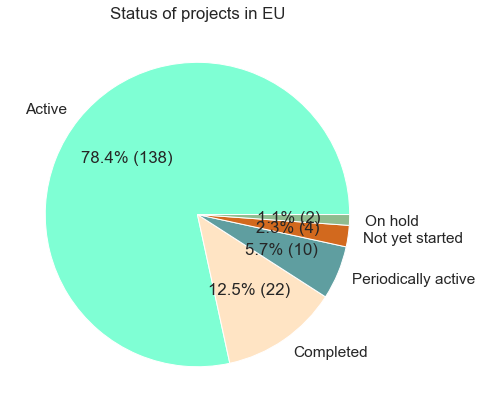

In [57]:
plot_piee(EU_projects, 'status_', "Status of projects in EU")

### DATES

See the amount of projects that have a determined starting and ending date, plotting the corresponding histograms and calculating the average duration of projects.

There are  37  projects without a determined starting date.
Therefore, the other  139  do specify a starting date.


Text(0, 0.5, 'Number of projects')

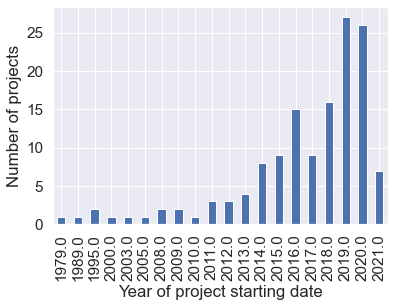

In [58]:
print("There are ", EU_projects["start_date"].isna().sum(), " projects without a determined starting date.")
print("Therefore, the other ", len(EU_projects)-EU_projects["start_date"].isna().sum(), " do specify a starting date.")
ax = EU_projects["start_date"].groupby(EU_projects["start_date"].dt.year).count().plot(kind="bar")
ax.set_xlabel("Year of project starting date")
ax.set_ylabel("Number of projects")

There are  94  projects without a determined ending date.
Therefore, the other  82  do specify an ending date.


Text(0, 0.5, 'Number of projects')

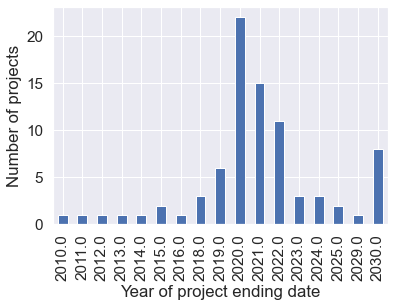

In [59]:
print("There are ", EU_projects["end_date"].isna().sum(), " projects without a determined ending date.")
print("Therefore, the other ", len(EU_projects)-EU_projects["end_date"].isna().sum(), " do specify an ending date.")
ax = EU_projects["end_date"].groupby(EU_projects["end_date"].dt.year).count().plot(kind="bar")
ax.set_xlabel("Year of project ending date")
ax.set_ylabel("Number of projects")

From the projects that have a determined starting and ending date, it can be calculated the duration of them. This duration value will be added in two new columns (in months or years).

In [60]:
EU_projects['duration_months']=np.nan
EU_projects['duration_years']=np.nan

for index, row in EU_projects.iterrows():
    EU_projects.loc[index,['duration_months']]=(row["end_date"].year-row["start_date"].year)*12 + (row["end_date"].month-row["start_date"].month)
    EU_projects.loc[index,['duration_years']]=(row["end_date"].year-row["start_date"].year) 


Text(0, 0.5, 'Number of projects')

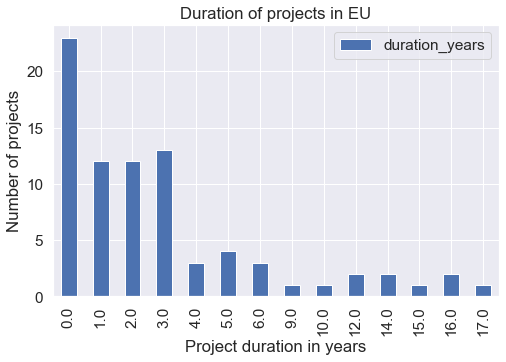

In [62]:
ax=EU_projects['duration_years'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), title='Duration of projects in EU', legend=True)
ax.set_xlabel("Project duration in years")
ax.set_ylabel("Number of projects")

In [63]:
EU_projects['duration_years'].describe()

count    80.000000
mean      3.250000
std       4.320982
min       0.000000
25%       0.000000
50%       2.000000
75%       3.250000
max      17.000000
Name: duration_years, dtype: float64

Therefore, there are 80 projects with a determined starting and ending date. From those we can extract that the mean duration is 3.25 years while the median is 2, maximum 17 years and minimum less than 1 year. 

### CREATION DATES (when they have been uploaded to the EU-CITIZEN.SCIENCE platform )

There are  0  projects without a determined created date.
Therefore, all projects have a create date since it is the date when the project has been uploaded to the platform


Text(0, 0.5, 'Number of projects')

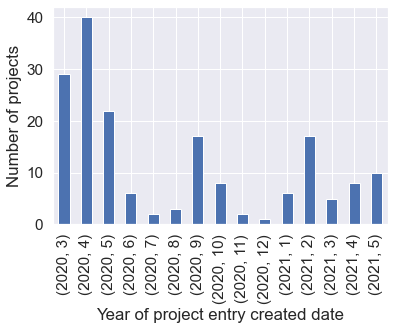

In [64]:
print("There are ", EU_projects["dateCreated"].isna().sum(), " projects without a determined created date.")
print("Therefore, all projects have a create date since it is the date when the project has been uploaded to the platform")
ax = EU_projects["dateCreated"].groupby([EU_projects["dateCreated"].dt.year, EU_projects["dateCreated"].dt.month]).count().plot(kind="bar")
ax.set_xlabel("Year of project entry created date")
ax.set_ylabel("Number of projects")

It can be observed that the month in which more projects were uploaded is April 2020, and also March and May, which correspond with the time when the platform was first released.

### HOSTS

In [65]:
pd.options.display.max_colwidth=50

In [66]:
print("There are ", EU_projects["host"].isna().sum(), " projects without a determined host.")
print("Therefore, the other ", len(EU_projects)-EU_projects["host"].isna().sum(), " do specify a project host.")
#EU_projects['host'].value_counts().values.sum()

There are  47  projects without a determined host.
Therefore, the other  129  do specify a project host.


In [67]:
#Show the five most common hosts:
EU_projects['host'].value_counts()[:5]

VA (Public & Science)                                            9
Environmental Research Center of Vitoria-Gasteiz city council    8
Leiden University                                                4
Natural History Museum                                           3
Ibercivis Foundation                                             2
Name: host, dtype: int64

In [68]:
#Investigate a little bit, showing the projects that have the most common host:
EU_projects[EU_projects['host']==EU_projects['host'].value_counts()[:1].index.tolist()[0]]

id                             name  \
2    2          The Ladybird Experiment   
57  46     The Star-Spotting Experiment   
78  36         The Vegetable Experiment   
91  38                 The Notice Board   
94  32          The Acoustic Experiment   
95  33  The Best-Before-Date Experiment   
96  34                 The Risk Picture   
97  35            The Autumn Experiment   
98  37           The Tea Bag Experiment   

                                                  url  \
2   https://forskarfredag.se/forskarfredags-massex...   
57  https://forskarfredag.se/researchers-night/mas...   
78  https://forskarfredag.se/massexperiment/gronsa...   
91  https://forskarfredag.se/massexperiment/anslag...   
94  https://v-a.se/2011/01/forskarfredags-akustikf...   
95  https://forskarfredag.se/massexperiment/bast-f...   
96  https://forskarfredag.se/massexperiment/massex...   
97  https://forskarfredag.se/massexperiment/hostfo...   
98  https://forskarfredag.se/massexperiment/tepase...   

                                                  aim  \
2   <p><span class="freebirdFormviewerViewItemsIte...   
57  The aim of the Star-Spotting Experiment was to...   
78  How much fruit and vegetables do children and ...   
91  To study what kind of content is being posted ...   
94  To explore the acoustic properties of Swedish ...   
95  The aim of the project was to take inventory o...   
96  The aim of the project was to explore which en...   
97  How does a tree know it is autumn? How is clim...   
98  To map the decomposition characteristics of di...   

                                          description howToParticipate  \
2   <p>Humans are affecting nature in different wa...                    
57  Our use of artificial light has dramatically c...                    
78  Over one day, approximately 5,500 participatin...                    
91  What is the function of the physical notice bo...                    
94  In this Scandinavian citizen science initiativ...                    
95  Approximately 1,800 Swedish pupils helped rese...                    
96  In The Risk Picture, 722 Swedish pupils helped...                    
97  Climate change is impacting when the growing s...                    
98  When dead plants decompose in the soil, the de...                    

   equipment                                           keywords  \
2             [{'id': 4, 'keyword': 'Artificial Intelligence...   
57            [{'id': 131, 'keyword': 'Astronomy'}, {'id': 1...   
78            [{'id': 74, 'keyword': 'Nutrition'}, {'id': 12...   
91            [{'id': 78, 'keyword': 'Citizen Humanities'}, ...   
94            [{'id': 64, 'keyword': 'Acoustics'}, {'id': 65...   
95            [{'id': 67, 'keyword': 'Food Storage'}, {'id':...   
96            [{'id': 71, 'keyword': 'Images'}, {'id': 123, ...   
97            [{'id': 73, 'keyword': 'Autumn'}, {'id': 123, ...   
98            [{'id': 76, 'keyword': 'Decomposition'}, {'id'...   

                                                topic start_date   end_date  \
2   [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,... 2018-06-01 2018-09-30   
57  [{'id': 4, 'topic': 'Astronomy & Space'}, {'id... 2019-01-31 2020-03-15   
78              [{'id': 13, 'topic': 'Food science'}] 2014-09-15 2014-09-30   
91     [{'id': 3, 'topic': 'Archaeology & Cultural'}] 2016-09-01 2016-09-30   
94  [{'id': 17, 'topic': 'Health & Medicine'}, {'i... 2010-09-20 2010-10-08   
95              [{'id': 13, 'topic': 'Food science'}] 2011-09-12 2011-09-30   
96           [{'id': 27, 'topic': 'Social sciences'}] 2012-09-01 2012-09-30   
97  [{'id': 7, 'topic': 'Biology'}, {'id': 10, 'to... 2013-09-01 2013-10-30   
98  [{'id': 7, 'topic': 'Biology'}, {'id': 10, 'to... 2015-05-10 2015-09-10   

                  dateCreated                            status  \
2  2020-03-24 06:01:37.419226  {'id': 5, 'status': 'Completed'}   
57 2020-03-25 10:06:51.565257  {'id': 5, 'status': 'Completed'}   
78 2020-03-25 08:24:15.9395

It can be seen that the "VA (Public & Science) host, which is the most common one, belongs to Sweden (SE). All projects related to it are completed and not done at home, and most of them belong to the fundingProgram H2020 MSCA- NIGHT, which corresponds to European Researcher's night, from Horizon 2020. 

###### Show also projects belonging to 'Environmental Research Center of Vitoria-Gasteiz city council'

In [70]:
EU_projects[EU_projects['host']=='Environmental Research Center of Vitoria-Gasteiz city council']

id                                               name  \
50   133  Night Predatory Birds Conservation Program of ...   
127  126                        100&CIA for Vitoria-Gasteiz   
128  127    Orchids Conservation Program of Vitoria-Gasteiz   
130  128  Urban Birds Conservation Program of Vitoria-Ga...   
131  129   Dragonfly Conservation Program of Vitoria-Gas...   
134  131      Moths Conservation Program of Vitoria-Gasteiz   
135  132       Land Conservation Program of Vitoria-Gasteiz   
141  130  Morning Butterflies Conservation Program of Vi...   

                                                   url  \
50   https://www.vitoria-gasteiz.org/wb021/was/cont...   
127  https://www.vitoria-gasteiz.org/wb021/was/cont...   
128  https://www.vitoria-gasteiz.org/wb021/was/cont...   
130  https://www.vitoria-gasteiz.org/wb021/was/cont...   
131  https://www.vitoria-gasteiz.org/wb021/was/cont...   
134  https://www.vitoria-gasteiz.org/wb021/was/cont...   
135  https://www.vitoria-gasteiz.org/wb021/was/cont...   
141  https://www.vitoria-gasteiz.org/wb021/was/cont...   

                                                   aim  \
50   <p>The main objective of this program is monit...   
127  100&CIA for Vitoria-Gasteiz aims to bring toge...   
128  The main objective of this program is to monit...   
130  The main objective of this program is knowing ...   
131  The main objective of this program is increasi...   
134  The main objective of this program is monitori...   
135  The main objective of this program is knowing ...   
141  The main objective of this program is monitori...   

                                           description  \
50   <p>This program is based on the participation ...   
127  It was created in 2013 by the Environmental Re...   
128  This program is based on the participation of ...   
130  This program is based on the participation of ...   
131  This is the third program included in our Citi...   
134  This program is based on the participation of ...   
135  This program is based on the participation of ...   
141  This program is based on the participation of ...   

                                      howToParticipate  \
50   <p>If you are interested in participate in thi...   
127  Any person residing in Vitoria-Gasteiz or surr...   
128  If you are interested in participate in this p...   
130  If you are interested in participate in this p...   
131  If you are interested in participate in this p...   
134  If you are interested in participate in this p...   
135  If you are interested in participate in this p...   
141  If you are interested in participate in this p...   

                                             equipment keywords  \
50   <p>-Land-receipt (in the web). -Pencil and rub...       []   
127  You will need: \r\n-a pencil\r\n-a pair of bin...       []   
128  -Land-receipt and land-handbook (in the web)\r...       []   
130  -Land-receipt and land-handbook (in the web).\...       []   
131  -Land-receipt and land-handbook (in the web).\...       []   
134  -Land-receipt (in the web).\r\n-Pencil and rub...       []   
135  -Land-receipt and land-handbook (in the web).\...       []   
141  -Land-receipt and land-handbook (in the web)\r...       []   

                                                 topic start_date   end_date  \
50   [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2020-01-01 2030-12-31   
127  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11... 2020-01-01 2020-06-30   
128  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 7,... 2013-04-01 2030-12-31   
130  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,... 2014-04-15 2030-12-31   
131  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2014-05-15 2030-12-31   
134  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2016-01-01 2030-12-31   
135  [{'id': 24, 'topic': 'Natural resource managem... 2018-05-01 2030-12-31   
141  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2015-04-15 2030-12-31   

                   da

All projects related to "Environmental Research Center of Vitoria-Gasteiz city council" belong to Spain and have as funding program the "Summons of assistances for the development of the Scientific, technologic and Innovation Culture (Convocatoria de ayudas para el Fomento de la Cultura Científica, Tecnológica y de la Innovación)"

### MAIN ORGANISATION

In [71]:
#Generate columns mainOrg which will contain just the name of the main organisation related to the project 
#and fundBody, which does the same for the funding body. 
EU_projects['mainOrg']=np.nan
EU_projects['fundBody']=np.nan

for index, row in EU_projects.iterrows():
    try:
        EU_projects.loc[index,['mainOrg']]=row.mainOrganisation.get('name')
    except:
        pass
    try:
        EU_projects.loc[index,['fundBody']]=row["fundingBody"]["body"]
    except:
        pass

In [72]:
#Create a main organisations dataframe which contains all the information from the organisations
df_main_organisations_e = pd.DataFrame(columns=['id', 'dateCreated', 'name', 'description', 'latitude', 'longitude', 'country', 'creator', 'type', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    try:
        if row.mainOrganisation.get("id") not in df_main_organisations_e['id'].unique():
            new_row = {'id':row.mainOrganisation.get("id"), 'dateCreated':row.mainOrganisation.get("dateCreated"), 'name':row.mainOrganisation.get('name'), 'description':row.mainOrganisation.get('description'), 'latitude':row.mainOrganisation.get('latitude'), 'longitude':row.mainOrganisation.get('longitude'), 'country':row.mainOrganisation.get('country'), 'creator':row.mainOrganisation.get('creator'), 'type':row.mainOrganisation.get('type'), 'num_times_appears':1, 'list_projects':list()}
            new_row["list_projects"].append(row["id"])
            df_main_organisations_e = df_main_organisations_e.append(new_row, ignore_index=True)
        else:
            index_ = df_main_organisations_e.index[df_main_organisations_e['id'] == row.mainOrganisation.get("id")]
            df_main_organisations_e.loc[index_,'num_times_appears'] = df_main_organisations_e.loc[index_,'num_times_appears']+1 
            
            if(len(index_)>0):
                for index2, row2 in df_main_organisations_e.iterrows():
                    if index2==index_:
                        row2["list_projects"].append(row["id"])
        
    except:
        pass
    

In [73]:
df_main_organisations_e = df_main_organisations_e.sort_values(by=['num_times_appears'], ascending=False)
df_main_organisations_e[:5]

id                  dateCreated                            name  \
25   2  2021-03-12T16:14:44.312362Z            Ibercivis Foundation   
7   11  2021-04-09T11:03:03.325507Z  Maremma Natural History Museum   
18  50  2020-10-07T09:47:24.539706Z    Surfrider Foundation Europe    
31  19  2020-09-08T09:10:48.338867Z               Leiden University   
19  73  2021-02-24T17:23:21.652503Z    Museum für Naturkunde Berlin   

                                          description   latitude  longitude  \
25  \r\nIBERCIVIS is the national private non-for-...  41.684275  -0.887436   
7   Among the precursors of citizen science in Ita...  42.760494  11.116094   
18  Surfrider Foundation Europe is a non-profit or...  43.459946  -1.540784   
31  Leiden University is one of Europe’s leading i...  52.156635   4.486740   
19  The Museum für Naturkunde Berlin  – Leibniz In...  52.530490  13.379115   

   country creator  type num_times_appears         list_projects  
25      ES       1  None                 4         [26, 7, 6, 4]  
7       IT      19  None                 4  [247, 251, 250, 258]  
18      FR    1390  None                 3       [172, 178, 242]  
31      NL      45  None                 2            [125, 135]  
19      DE     946  None                 2              [19, 21]

### ORGANISATION

The same is done with organisations

In [74]:
df_organisations_e = pd.DataFrame(columns=['id', 'dateCreated', 'name', 'description', 'latitude', 'longitude', 'country', 'creator', 'orgType', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    for org in row.organisation:
        if org.get("id") not in df_organisations_e['id'].unique():
            new_row = {'id':org.get("id"), 'dateCreated':org.get("dateCreated"), 'name':org.get('name'), 'description':org.get('description'), 'latitude':org.get('latitude'), 'longitude':org.get('longitude'), 'country':org.get('country'), 'creator':org.get('creator'), 'orgType':org.get('orgType'), 'num_times_appears':1, 'list_projects':list()}      
            new_row["list_projects"].append(row["id"])
            df_organisations_e = df_organisations_e.append(new_row, ignore_index=True)
        else:
            index_ = df_organisations_e.index[df_organisations_e['id'] == org.get("id")]
            df_organisations_e.loc[index_,'num_times_appears'] = df_organisations_e.loc[index_,'num_times_appears'] +1 
            for index2, row2 in df_organisations_e.iterrows():
                if index2==index_:
                    row2["list_projects"].append(row["id"])
    

In [75]:
df_organisations_e = df_organisations_e.sort_values(by=['num_times_appears'], ascending=False)

df_organisations_e[:5]

id                  dateCreated  \
9     1  2021-05-06T07:47:15.622051Z   
0     6  2020-09-08T06:48:03.452860Z   
14    2  2021-03-12T16:14:44.312362Z   
12   60  2020-11-04T06:35:04.459879Z   
31  116  2021-02-15T13:26:01.639736Z   

                                             name  \
9     European Citizen Science Association (ECSA)   
0   Vetenskap & Allmänhet (VA – Public & Science)   
14                           Ibercivis Foundation   
12                       Universitat de Barcelona   
31             Universitat Autonoma de Barcelona    

                                          description   latitude  longitude  \
9   Since 2013, ECSA has evolved from an informal ...  52.530490  13.379115   
0   VA (Public & Science) is a Swedish non-profit ...  59.335830  18.075792   
14  \r\nIBERCIVIS is the national private non-for-...  41.684275  -0.887436   
12  The University of Barcelona (UB) is a public u...  41.384362   2.119789   
31  The Universitat Autònoma de Barcelona (UAB), l...  41.757870   2.031182   

   country creator orgType num_times_appears           list_projects  
9       DE       3       2                 5  [180, 237, 21, 18, 74]  
0       SE      24       2                 4    [185, 226, 180, 227]  
14      ES       1       2                 3          [237, 21, 145]  
12      ES    2316       3                 2              [227, 235]  
31      ES    2545       3                 1                   [254]

In [76]:
#COMPARING IF ORGANISATIONS AND MAIN ORGANISATIONS ARE THE SAME ENTITIES
#printing the organisations that appear both as organisations and main organisations:
repeated=[]
repeated_df=pd.DataFrame()
for index, row in df_organisations_e.iterrows():
    for index_2, row_2 in df_main_organisations_e.iterrows():
        if row["id"]==row_2["id"]:
            new_row = {'dateCreated':row["dateCreated"], 'name':row['name'], 'description':row['description'], 'country':row['country'], 'num_times_appears':int(row["num_times_appears"]+row2["num_times_appears"])}      
            repeated_df = repeated_df.append(new_row, ignore_index=True)
repeated_df

country                  dateCreated  \
0      DE  2021-05-06T07:47:15.622051Z   
1      SE  2020-09-08T06:48:03.452860Z   
2      ES  2021-03-12T16:14:44.312362Z   
3      ES  2020-11-04T06:35:04.459879Z   
4      FR  2020-10-07T09:47:24.539706Z   
5      AT  2020-09-08T05:44:00.705185Z   
6      NL  2020-09-08T09:10:48.338867Z   
7      BE  2020-11-18T08:11:14.969870Z   
8      IT  2021-04-09T11:03:03.325507Z   

                                         description  \
0  Since 2013, ECSA has evolved from an informal ...   
1  VA (Public & Science) is a Swedish non-profit ...   
2  \r\nIBERCIVIS is the national private non-for-...   
3  The University of Barcelona (UB) is a public u...   
4  Surfrider Foundation Europe is a non-profit or...   
5  The International Institute for Applied System...   
6  Leiden University is one of Europe’s leading i...   
7  The Research Institute for Nature and Forest (...   
8  Among the precursors of citizen science in Ita...   

                                                name  num_times_appears  
0        European Citizen Science Association (ECSA)                6.0  
1      Vetenskap & Allmänhet (VA – Public & Science)                5.0  
2                               Ibercivis Foundation                4.0  
3                           Universitat de Barcelona                3.0  
4                       Surfrider Foundation Europe                 2.0  
5  International Institute for Applied Systems An...                2.0  
6                                  Leiden University                2.0  
7    Research Institute for Nature and Forest (INBO)                2.0  
8                     Maremma Natural History Museum                2.0

### FUNDING BODY

In [77]:
print("There are ", EU_projects["fundBody"].isna().sum(), " projects without a determined funding body.")
print("Therefore, the other ", len(EU_projects)-EU_projects["fundBody"].isna().sum(), " do specify a project funding body.")
print("From those funding bodies, ", len(EU_projects.fundBody.value_counts()), " of them are distinct.")
print("The most common ones are: ")
#EU_projects['fundBody'].value_counts().values.sum()
#Show the five most common funding bodies:
EU_projects['fundBody'].value_counts()[:5]

There are  112  projects without a determined funding body.
Therefore, the other  64  do specify a project funding body.
From those funding bodies,  32  of them are distinct.
The most common ones are: 


European Commission                         11
European Comission                           8
Arts and Humanities Research Council         5
Fecyt-Ministerio de Ciencia y Tecnología     4
European Research Council (ERC)              4
Name: fundBody, dtype: int64

### FUNDING PROGRAM

In [78]:
df_fundingprogram_e = pd.DataFrame(columns=['fundingProgram', 'country', 'num_times_appears', 'list_projects'])

for index, row in EU_projects.iterrows():
    try:
        if row.fundingProgram not in df_fundingprogram_e['fundingProgram'].unique():
            new_row = {'fundingProgram': row.fundingProgram, 'country':row.country, 'num_times_appears':1, 'list_projects':list()}
            new_row["list_projects"].append(row["id"])
            df_fundingprogram_e = df_fundingprogram_e.append(new_row, ignore_index=True)
        else:
            index_ = df_fundingprogram_e.index[df_fundingprogram_e['fundingProgram'] == row.fundingProgram]
            #df_hosts_e.loc[index,['num_times_appears']] = df_hosts_e[index].num_times_appears +1 
            df_fundingprogram_e.loc[index_,'num_times_appears'] = df_fundingprogram_e.loc[index_,'num_times_appears']+1 
            
            if(len(index_)>0):
                for index2, row2 in df_fundingprogram_e.iterrows():
                    if index2==index_:
                        row2["list_projects"].append(row["id"])
        
    except:
        pass

df_fundingprogram_e = df_fundingprogram_e.sort_values(by=['num_times_appears'], ascending=False)

df_fundingprogram_e[:5]

fundingProgram country  \
0                                                          BE   
28  Summons of assistances for the development of ...      ES   
18                                   H2020 MSCA-NIGHT      SE   
5                                        Horizon 2020      BE   
4                                               H2020      ES   

   num_times_appears                                      list_projects  
0                126  [184, 185, 2, 226, 48, 228, 180, 230, 163, 247...  
28                 7                [126, 127, 128, 129, 131, 132, 130]  
18                 5                               [38, 32, 33, 34, 35]  
5                  3                                      [91, 144, 18]  
4                  2                                         [236, 140]

In [79]:
pd.options.display.max_colwidth=50


In [80]:
EU_projects[EU_projects['fundingProgram']=='Summons of assistances for the development of the Scientific, technologic and Innovation Culture (Convocatoria de ayudas para el Fomento de la Cultura Científica, Tecnológica y de la Innovación)']

id                                               name  \
127  126                        100&CIA for Vitoria-Gasteiz   
128  127    Orchids Conservation Program of Vitoria-Gasteiz   
130  128  Urban Birds Conservation Program of Vitoria-Ga...   
131  129   Dragonfly Conservation Program of Vitoria-Gas...   
134  131      Moths Conservation Program of Vitoria-Gasteiz   
135  132       Land Conservation Program of Vitoria-Gasteiz   
141  130  Morning Butterflies Conservation Program of Vi...   

                                                   url  \
127  https://www.vitoria-gasteiz.org/wb021/was/cont...   
128  https://www.vitoria-gasteiz.org/wb021/was/cont...   
130  https://www.vitoria-gasteiz.org/wb021/was/cont...   
131  https://www.vitoria-gasteiz.org/wb021/was/cont...   
134  https://www.vitoria-gasteiz.org/wb021/was/cont...   
135  https://www.vitoria-gasteiz.org/wb021/was/cont...   
141  https://www.vitoria-gasteiz.org/wb021/was/cont...   

                                                   aim  \
127  100&CIA for Vitoria-Gasteiz aims to bring toge...   
128  The main objective of this program is to monit...   
130  The main objective of this program is knowing ...   
131  The main objective of this program is increasi...   
134  The main objective of this program is monitori...   
135  The main objective of this program is knowing ...   
141  The main objective of this program is monitori...   

                                           description  \
127  It was created in 2013 by the Environmental Re...   
128  This program is based on the participation of ...   
130  This program is based on the participation of ...   
131  This is the third program included in our Citi...   
134  This program is based on the participation of ...   
135  This program is based on the participation of ...   
141  This program is based on the participation of ...   

                                      howToParticipate  \
127  Any person residing in Vitoria-Gasteiz or surr...   
128  If you are interested in participate in this p...   
130  If you are interested in participate in this p...   
131  If you are interested in participate in this p...   
134  If you are interested in participate in this p...   
135  If you are interested in participate in this p...   
141  If you are interested in participate in this p...   

                                             equipment keywords  \
127  You will need: \r\n-a pencil\r\n-a pair of bin...       []   
128  -Land-receipt and land-handbook (in the web)\r...       []   
130  -Land-receipt and land-handbook (in the web).\...       []   
131  -Land-receipt and land-handbook (in the web).\...       []   
134  -Land-receipt (in the web).\r\n-Pencil and rub...       []   
135  -Land-receipt and land-handbook (in the web).\...       []   
141  -Land-receipt and land-handbook (in the web)\r...       []   

                                                 topic start_date   end_date  \
127  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 11... 2020-01-01 2020-06-30   
128  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 7,... 2013-04-01 2030-12-31   
130  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,... 2014-04-15 2030-12-31   
131  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2014-05-15 2030-12-31   
134  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2016-01-01 2030-12-31   
135  [{'id': 24, 'topic': 'Natural resource managem... 2018-05-01 2030-12-31   
141  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2015-04-15 2030-12-31   

                   dateCreated                         status  \
127 2020-05-04 11:24:55.428571  {'id': 2, 'status': 'Active'}   
128 2020-05-04 11:37:10.458666  {'id': 2, 'status': 'Active'}   
130 2020-05-04 11:53:55.511831  {'id': 2, 'status': 'Active'}   
131 2020-05-04 12:04:56.655050  {'id': 2, 'status': 'Active'}   
134 2020-05-04 15:46:19.478832  {'id': 2, 'status': 'Active'}   
135 2020-05-04 15:55:23.968726  {'id': 2, 'status': 'Active'}   
141 2020

### COUNTRY

In [81]:
print("There are ", len(EU_projects.country.value_counts()), " different project countries. The most common ones are: ")

EU_projects['country'].value_counts()[:5]

There are  26  different project countries. The most common ones are: 


ES    39
GB    18
IT    15
SE    11
AT     9
Name: country, dtype: int64

<Figure size 432x288 with 0 Axes>

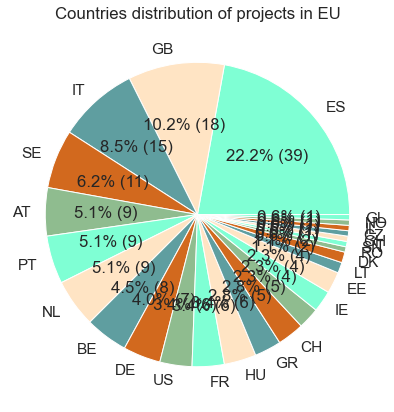

In [82]:
plot_piee(EU_projects, "country", "Countries distribution of projects in EU")

In [83]:
#CHECK ALL ORGANISATION COUNTRIES ARE THE SAME AS THE PROJECT COUNTRIES
for index, row in EU_projects.iterrows():
    try:
        if row.country != row.mainOrganisation.get('country'):
            print('PROJECT: ', row['name'], '\n   Project country: ', row.country, '\n   Main Organisation country: ', row.mainOrganisation.get('country'), '\n')
    except:
        pass

PROJECT:  Looking for Cowslips 
   Project country:   
   Main Organisation country:  EE 

PROJECT:  SEEDS - Science Engagement to Empower Disadvantaged adoleScents 
   Project country:  ES 
   Main Organisation country:  DE 

PROJECT:  careables 
   Project country:  DE 
   Main Organisation country:  AT 



There are three cases in which the project country does not correspond with the main organisation country. In the first case it is because there is no country determined. But for the second project "SEEDS - Science Engagement to Empower Disadvantaged adoleScents ", it is an Spanish project whose main organisation is the 'European Citizen Science Association (ECSA)', related to Denmark. and for the "careables" project, its determined country is Denmark while the main organisation 'Centre for Social Innovation - ZSI ' belongs to Austria 

### DOING AT HOME

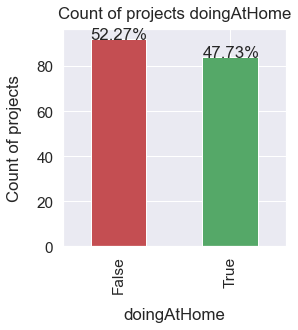

In [84]:
plot_countplot(EU_projects, "doingAtHome", "projects", True)

### FEATURED

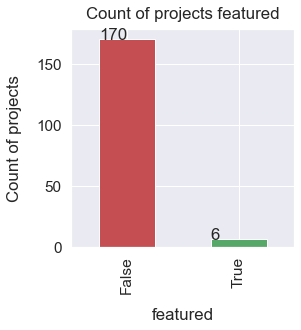

In [85]:
plot_countplot(EU_projects, "featured", "projects", False)

In [86]:
#Show projects that are highlited
print("There are ", len(EU_projects[EU_projects.featured==True]), " highlited projects.")
EU_projects[EU_projects.featured==True]

There are  6  highlited projects.


id                                       name  \
9    247                          Natura sulle Mura   
139  253  STOC (Suivi Temporel des Oiseaux Communs)   
170  254                                    OpenTEK   
172  258                   BioBlitz a tutti i costi   
174  260            BeBirds: Belgian Ringing Scheme   
175  229                                   FLAMENCO   

                                                   url  \
9    https://www.museonaturalemaremma.it/natura-sul...   
139  http://www.vigienature.fr/fr/suivi-temporel-de...   
170                          https://opentek.eu/licci    
172  https://www.museonaturalemaremma.it/bioblitz-a...   
174       https://odnature.naturalsciences.be/bebirds/   
175        http://soft.vub.ac.be/soft/content/flamenco   

                                                   aim  \
9    <p>The aim of the project is monitoring biodiv...   
139  <p>The aim of the project is to monitor common...   
170  <p>Aim:</p>\r\n\r\n<p><a href="https://opentek...   
172  <p style="text-align:justify">The main objecti...   
174  <p><strong>BeBirds - the Belgian Ringing Centr...   
175  <p>The goal of FLAMENCO is to build and valori...   

                                           description  \
9    <p>The ancient, still almost complete city wal...   
139  <p>The monitored sites are now selected by fol...   
170  <p>Background:</p>\r\n\r\n<p>In&nbsp;the&nbsp;...   
172  <p style="text-align:justify">The &ldquo;BioBl...   
174  <p>Why ring birds?</p>\r\n\r\n<p>Ringing is a ...   
175  <p>FLAMENCO&rsquo;s valorisation strategy&nbsp...   

                                      howToParticipate  \
9    <p>Go to the website <u><a href="http://www.in...   
139  <p>skilled enough to identify calls and songs ...   
170  <p>The OpenTEK platform can be used as a visit...   
172  <p>Go to the website <a href="http://www.inatu...   
174  <p>How to become a ringer?</p>\r\n\r\n<p>To ri...   
175  <p>The FLAMENCO platform enables everyone to c...   

                                             equipment  \
9            <p>Smartphone and iNaturalist app</p>\r\n   
139                  <p>binoculars, pen, paper</p>\r\n   
170  <p>Smartphone, tablet or computer. The platfor...   
172            <p>Smartphone, iNaturalist app,</p>\r\n   
174                                                      
175                                                      

                                              keywords  \
9                                                   []   
139                   [{'id': 30, 'keyword': 'Birds'}]   
170  [{'id': 40, 'keyword': 'Citizen Science'}, {'i...   
172  [{'id': 3, 'keyword': 'Biodiversity'}, {'id': ...   
174  [{'id': 30, 'keyword': 'Birds'}, {'id': 44, 'k...   
175  [{'id': 95, 'keyword': 'Citizen Observatory'},...   

                                                 topic start_date   end_date  \
9    [{'id': 5, 'topic': 'Biodiversity'}, {'id': 12... 2018-04-28        NaT   
139  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 6,... 1989-01-01        NaT   
170  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 10... 2018-06-01 2023-05-31   
172  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 12... 2021-05-15 2021-05-15   
174  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,...        NaT        NaT   
175            [{'id': 29, 'topic': 'Transportation'}] 2016-01-01 2019-12-31   

                   dateCreated                                      status  \
9   2021-05-03 19:04:51.240363  {'id': 3, 'status': 'Periodically active'}   
139 2021-05-03 19:04:38.894639               {'id': 2, 'status': 'Active'}   
170 2021-05-05 08:39:05.225622               {'id': 2, 'status': 'Active'}   
172 2021-05-05 09:58:10.970684      {'id': 1, 'status': 'Not yet started'}   
174 2021-05-11 10:38:21.170836               {'id': 2, 'status': 'Active'}   
175 2021-05-17 16:02:06.724742            {'id': 5, 'status': 'Completed'}   

     host                                   mainOrganisation  \
9    N

<Figure size 432x288 with 0 Axes>

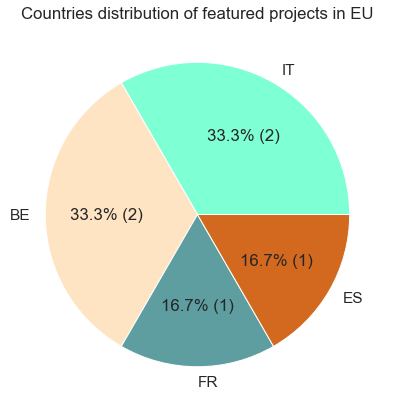

In [87]:
plot_piee(EU_projects[EU_projects.featured==True], "country", "Countries distribution of featured projects in EU")

## PROJECTS RELATED WITH EDUCATION

In [88]:
education=["school", "teacher", "student", "educat", "pupil"]
#add column to dataframe that determines if the project contains an educational word
EU_projects['education_in_text'] = False
education_text_id=[]

for index, row in EU_projects.iterrows():
    if any(x.lower() in row['description'].lower() for x in education) or any(x.lower() in row['aim'].lower() for x in education) or any(x.lower() in row['howToParticipate'].lower() for x in education):
        EU_projects.loc[index,['education_in_text']]=True
        education_text_id.append(row["id"])
    

In [89]:
#add column to dataframe that determines if the project has "Education" as topic or any educational keyword
EU_projects['education_in_keywords_topic'] = False
education_keywords_id=[]
education_topic_id=[]

education_keywords=['Schools', 'Education', 'Classrooms', 'Special Education', 'Teachers',  'Aire Marine Educative']
for index, row in EU_projects.iterrows():
    for keyword in row["keywords_list"]:
        if keyword in education_keywords:
            education_keywords_id.append(row["id"])
            EU_projects.loc[index,['education_in_keywords_topic']]=True
    if "Education" in row["topics_list"]:
        education_topic_id.append(row["id"])
        EU_projects.loc[index,['education_in_keywords_topic']]=True


In [90]:
education_in_keywords_or_topic=sorted(list(set(education_keywords_id) | set(education_topic_id)))

print("\nProjects with Education as topic or keywords: ",len(education_in_keywords_or_topic))
#print(" \n", sorted(education_in_keywords_or_topic))

print("\nProjects with Education words in description / aim / howToParticipate: ",len(education_text_id))
#print(" \n", sorted(education_text_id))

education_anywhere=sorted(list(set(education_in_keywords_or_topic) | set(education_text_id)))
print("\nProjects with education in topics/keyword/text (description/aim/howToParticipate): ",len(education_anywhere))
#print(" \n", sorted(education_anywhere))

print("\nProjects with education in text but not in keywords/topic: ", len(sorted(list(set(education_text_id)-set(education_in_keywords_or_topic)))))

print("\nOut of ", len(EU_projects), "projects")



Projects with Education as topic or keywords:  54

Projects with Education words in description / aim / howToParticipate:  69

Projects with education in topics/keyword/text (description/aim/howToParticipate):  86

Projects with education in text but not in keywords/topic:  32

Out of  176 projects


<Figure size 432x288 with 0 Axes>

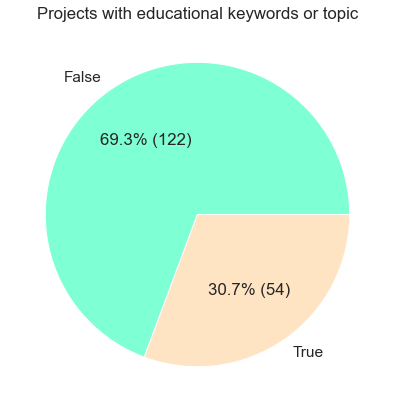

In [91]:
plot_piee(EU_projects, 'education_in_keywords_topic', "Projects with educational keywords or topic")

<Figure size 432x288 with 0 Axes>

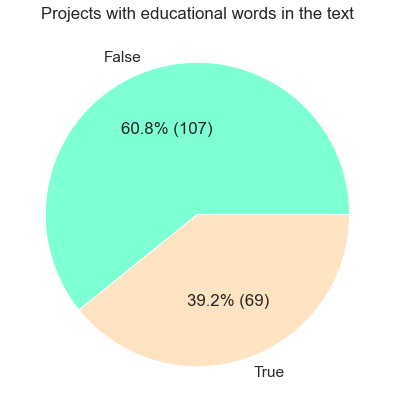

In [92]:
plot_piee(EU_projects, 'education_in_text', "Projects with educational words in the text")

In [94]:
#EU_projects=EU_projects.drop(columns=['keywords', 'status', 'topic', 'mainOrganisation', 'fundingBody'])
with pd.ExcelWriter('EU_projects.xlsx', options={'strings_to_urls': False}) as writer:
        EU_projects.to_excel(writer, 'EU_projects')
EU_projects[:5]

id                                   name  \
0  184                             Vespawatch   
1  185                   Looking for Cowslips   
2    2                The Ladybird Experiment   
3  226  MammalNet: Watch Wildlife for Science   
4   48                               GripeNet   

                                                 url  \
0                             https://vespawatch.be/   
1                                    www.cowslips.eu   
2  https://forskarfredag.se/forskarfredags-massex...   
3                                      mammalnet.com   
4                            http://www.gripenet.pt/   

                                                 aim  \
0  <p>Vespawatch targets beekeepers and the publi...   
1  <p>The aim of the project is to examine the pa...   
2  <p><span class="freebirdFormviewerViewItemsIte...   
3  <ul>\r\n\t<li>&nbsp;&nbsp;&nbsp; To engage cit...   
4  Ajude-nos a monitorizar a epidemia da gripe, e...   

                                         description  \
0  <p>Vespawatch target beekeepers, the public an...   
1  <p>Participants are expected to observe the pa...   
2  <p>Humans are affecting nature in different wa...   
3  <p><strong>MammalNe</strong>t is a partnership...   
4  A ideia de monitorizar a epidemia sazonal de g...   

                                    howToParticipate  \
0  <p>Everyone can help track the Asian hornet in...   
1  <p>Instructions to participate are available o...   
2                                                      
3  <ul>\r\n\t<li>Collecting and sharing the prese...   
4  Ajude-nos a monitorizar a epidemia da gripe, e...   

                                           equipment  \
0         <p>No specific equipment required.</p>\r\n   
1  <p>Recommended: smartphone with internet conne...   
2                                                      
3  <ul>\r\n\t<li>\r\n\t<p>To participate as an ob...   
4                                                      

                                            keywords  \
0  [{'id': 3, 'keyword': 'Biodiversity'}, {'id': ...   
1             [{'id': 3, 'keyword': 'Biodiversity'}]   
2  [{'id': 4, 'keyword': 'Artificial Intelligence...   
3                                                 []   
4  [{'id': 105, 'keyword': 'Influenza'}, {'id': 5...   

                                               topic start_date   end_date  \
0  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2018-02-01        NaT   
1                                                 [] 2021-03-15 2021-06-15   
2  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,... 2018-06-01 2018-09-30   
3  [{'id': 1, 'topic': 'Agriculture & Veterinary ...        NaT        NaT   
4         [{'id': 17, 'topic': 'Health & Medicine'}]        NaT        NaT   

                 dateCreated                                      status  \
0 2020-12-18 17:22:29.027278               {'id': 2, 'status': 'Active'}   
1 2021-02-08 13:04:33.184447  {'id': 3, 'status': 'Periodically active'}   
2 2020-03-24 06:01:37.419226            {'id': 5, 'status': 'Completed'}   
3 2021-03-03 14:16:49.394339               {'id': 2, 'status': 'Active'}   
4 2020-04-06 13:07:59.357393               {'id': 2, 'status': 'Active'}   

                                               host  \
0                                              None   
1                                              None   
2                             VA (Public & Science)   
3                                              None   
4  Instituto Nacional de Saúde Doutor Ricardo Jorge   

                                    mainOrganisation  \
0  {'id': 66, 'dateCreated': '2020-11-18T08:11:14...   
1  {'id': 67, 'dateCreated': '2020-11-18T16:11:09...   
2                                               None   
3  {'id': 75, 'dateCreated': '2020-11-25T12:44:06...   
4                                               None   

                                        organisation  \
0                                    

## CORRELATIONS

A new dataframe to explore correlations will be done, containing some columns of the EU_projects plus the needed material (one column for each so that the variables are True/False). Since for correlations we need numerical values and not categories, several variables will be generated from the categorical ones, determining if that value is included or not (True/False). For fields such as the status and countries, they will be converted to numerical types by using the OrdinalEncoder, which maps categories to numeric values. Since there are 26 countries, 6 groups have been made depending on their geography. For the status, they have been classified into Active, Completed or not being done at the moment.

In [96]:
EU_correlations=EU_projects[['id', 'name', 'country', 'host', 'status_', 'doingAtHome', 'start_date', 'end_date', 'duration_months', 'duration_years', 'education_in_keywords_topic', 'education_in_text']].copy()

EU_correlations["ne_app"]=needed_EU["app"]
EU_correlations["ne_camera"]=needed_EU["camera"]
EU_correlations["ne_phone"]=needed_EU["phone"]
EU_correlations["ne_internet"]=needed_EU["internet"]
EU_correlations["ne_computer"]=needed_EU["computer"]
EU_correlations["ne_gps"]=needed_EU["gps"]
EU_correlations["ne_nothing"]=needed_EU["nothing"]

EU_correlations["topic_social"]=topics_EU["humanities_social"]
EU_correlations["topic_physical"]=topics_EU["physical_sciences"]
EU_correlations["topic_life"]=topics_EU["life_sciences"]
EU_correlations["topic_applied"]=topics_EU["applied_sciences"]

EU_correlations['start_date'] = pd.to_datetime(EU_correlations['start_date'])
EU_correlations["start_date"]=EU_correlations["start_date"].dt.year
EU_correlations['end_date'] = pd.to_datetime(EU_correlations['end_date'])
EU_correlations["end_date"]=EU_correlations["end_date"].dt.year

EU_correlations[:5]

id                                   name country  \
0  184                             Vespawatch      BE   
1  185                   Looking for Cowslips           
2    2                The Ladybird Experiment      SE   
3  226  MammalNet: Watch Wildlife for Science      ES   
4   48                               GripeNet      PT   

                                               host              status_  \
0                                              None               Active   
1                                              None  Periodically active   
2                             VA (Public & Science)            Completed   
3                                              None               Active   
4  Instituto Nacional de Saúde Doutor Ricardo Jorge               Active   

   doingAtHome  start_date  end_date  duration_months  duration_years  \
0         True      2018.0       NaN              NaN             NaN   
1        False      2021.0    2021.0              3.0             0.0   
2        False      2018.0    2018.0              3.0             0.0   
3         True         NaN       NaN              NaN             NaN   
4         True         NaN       NaN              NaN             NaN   

   education_in_keywords_topic  education_in_text  ne_app  ne_camera  \
0                        False              False   False      False   
1                        False              False   False      False   
2                        False               True   False      False   
3                         True              False    True       True   
4                        False              False   False      False   

   ne_phone  ne_internet  ne_computer  ne_gps  ne_nothing  topic_social  \
0     False        False        False   False       False         False   
1      True         True        False   False       False         False   
2     False        False        False   False       False         False   
3      True         True         True   False       False          True   
4     False        False        False   False       False         False   

   topic_physical  topic_life  topic_applied  
0           False        True          False  
1           False       False          False  
2           False        True           True  
3           False        True           True  
4           False       False           True

In [97]:
import category_encoders as ce

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=["country", "status_"],return_df=True,
                           mapping=[{'col': "country", 'mapping':{
                                                                "GH": 1, "SN": 1, 'IL': 1, "US": 1,
                                                                  "GB": 2, "IE": 2,  "EE": 2, "LT":2 ,    
                                                                  "ES": 3, "PT": 3,"IT": 3,"FR": 3,
                                                                  "NO": 4, "SE": 4, "DK": 4, "GL": 4,
                                                                  "RO": 5, "HU": 5, "GR": 5,"CZ": 5, "AT": 5,
                                                                  "NL": 6, "BE": 6,"DE": 6, "CH": 6
                                                                  }},
                                    {'col': "status_", "mapping": {"Active": 1, "Periodically active": 1, "Completed": 2, 
                                                                  "Not yet started": 0, "On hold": 0}}
                                       
                                     ])
#Transformed data, now all columns have numerical or boolean values
EU_correlations = encoder.fit_transform(EU_correlations)
EU_correlations[:3]

C:\Users\Usuario\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


id                     name  country                   host  status_  \
0  184               Vespawatch      6.0                   None        1   
1  185     Looking for Cowslips     -1.0                   None        1   
2    2  The Ladybird Experiment      4.0  VA (Public & Science)        2   

   doingAtHome  start_date  end_date  duration_months  duration_years  \
0         True      2018.0       NaN              NaN             NaN   
1        False      2021.0    2021.0              3.0             0.0   
2        False      2018.0    2018.0              3.0             0.0   

   education_in_keywords_topic  education_in_text  ne_app  ne_camera  \
0                        False              False   False      False   
1                        False              False   False      False   
2                        False               True   False      False   

   ne_phone  ne_internet  ne_computer  ne_gps  ne_nothing  topic_social  \
0     False        False        False   False       False         False   
1      True         True        False   False       False         False   
2     False        False        False   False       False         False   

   topic_physical  topic_life  topic_applied  
0           False        True          False  
1           False       False          False  
2           False        True           True

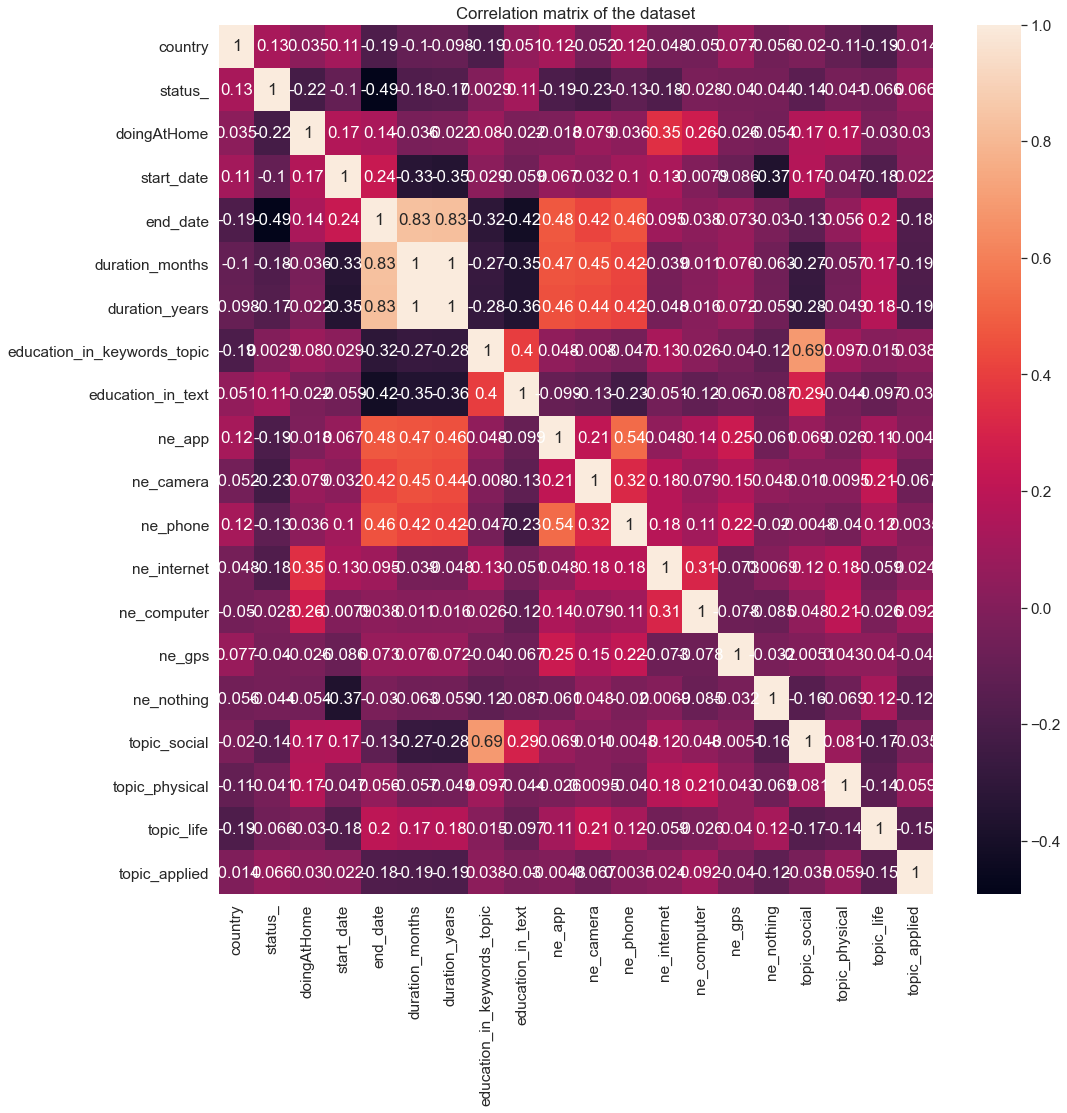

In [98]:
df_noID= EU_correlations.iloc[:, 1:]#ignore id
corr=df_noID.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr, annot=True)
plt.title("Correlation matrix of the dataset")
plt.show()

In [99]:
#Show the most correlated variables in order
corr_matrix = corr.abs()
#the matrix is symmetric so we extract the upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
pd.set_option('display.max_rows', 500)
print(sol[:10])

duration_months              duration_years     0.996878
end_date                     duration_months    0.833810
                             duration_years     0.825699
education_in_keywords_topic  topic_social       0.690241
ne_app                       ne_phone           0.535226
status_                      end_date           0.491735
end_date                     ne_app             0.480405
duration_months              ne_app             0.465265
end_date                     ne_phone           0.461404
duration_years               ne_app             0.456910
dtype: float64


<ipython-input-99-4f128c0aca77>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))


The pairs of variables with more correlation are:
* Duration months and duration years, end_ date with duration (months and years), which are obvious. 
* Education_in_keywords_topic and topic_social, which means that most projects having educational keywords or belong to social humanities topics, which makes sense.
-Then, need an app and need a phone, which of course are related since if an app is needed to participate into a project, it will need a phone too. 
-Also status and ending dates are correlated since the end date determines the status of the project.  
-This correlations list also shows a fact that may seem weird at the first glance. The thing is that there exists a correlation between the ending date or duration or a project and the need of a phone, app or camera. At the beginning I thought that it may be by chance, but then using the Tableau dashboard I realised that it is true, depending on if a project needs a phone or not the ending date is modified (most projects that need an app finish at 2030). This makes sense since old projects could not ask for an application since smartphones were not that common. However, nowadays technology is much more evolved and projects take advantage of it and ask citizens to use applications, smartphones and cameras to collect information for the CS projects. That is the reason why the end date and the need for technology are related.

However, this correlation analysis should not be very strictly considered, only as a guide to see what filters to apply while playing with the Tableau visualization. The reason is that several variables are categorical and  when encoding them to numeric values we are losing precision, especially if from 26 values as for countries they are reduced into 6. Therefore, these obtained correlations are useful to try and verify them with the Tableau dashboard, where these and more analysis among projects variables will be done to extract meaningful insights. 

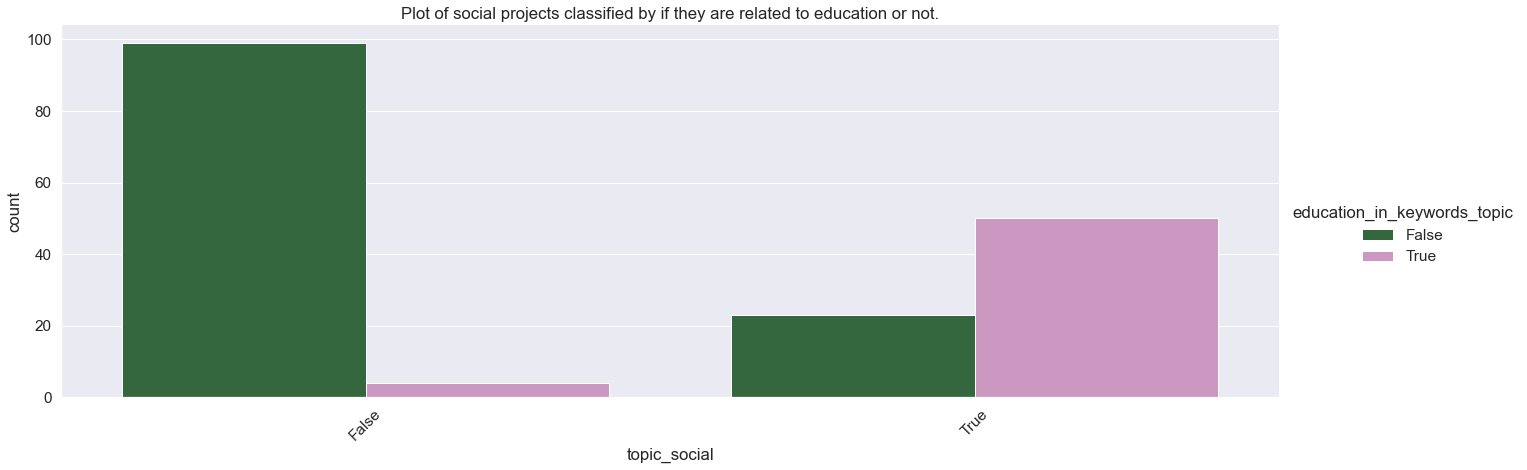

In [100]:
ax=plot_by_variable(EU_correlations, "topic_social", "education_in_keywords_topic")
ax.set(title='Plot of social projects classified by if they are related to education or not.')

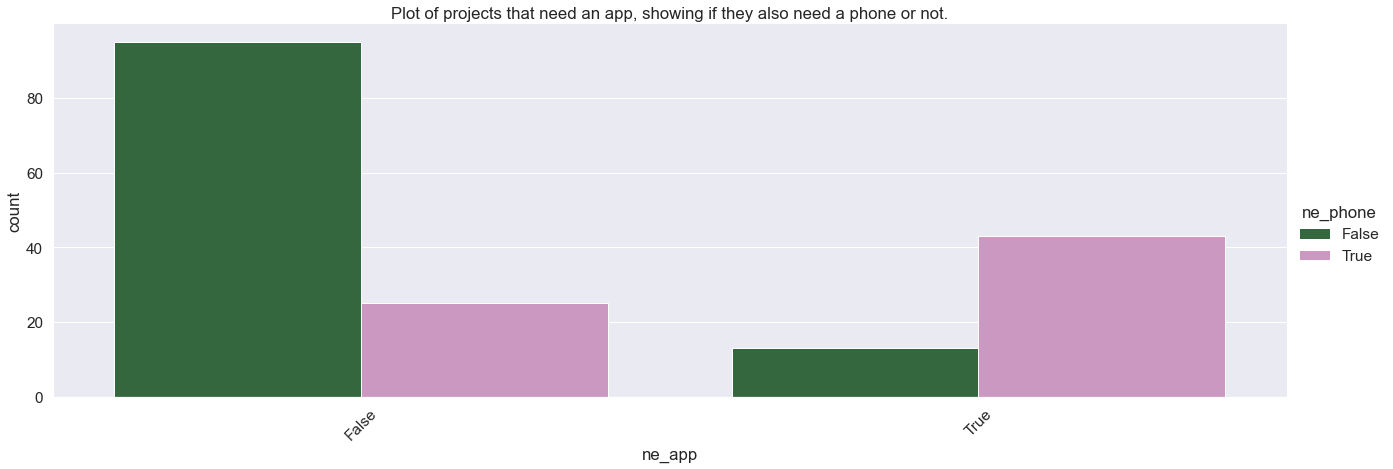

In [101]:
ax=plot_by_variable(EU_correlations, "ne_app", "ne_phone")
ax.set(title='Plot of projects that need an app, showing if they also need a phone or not.')

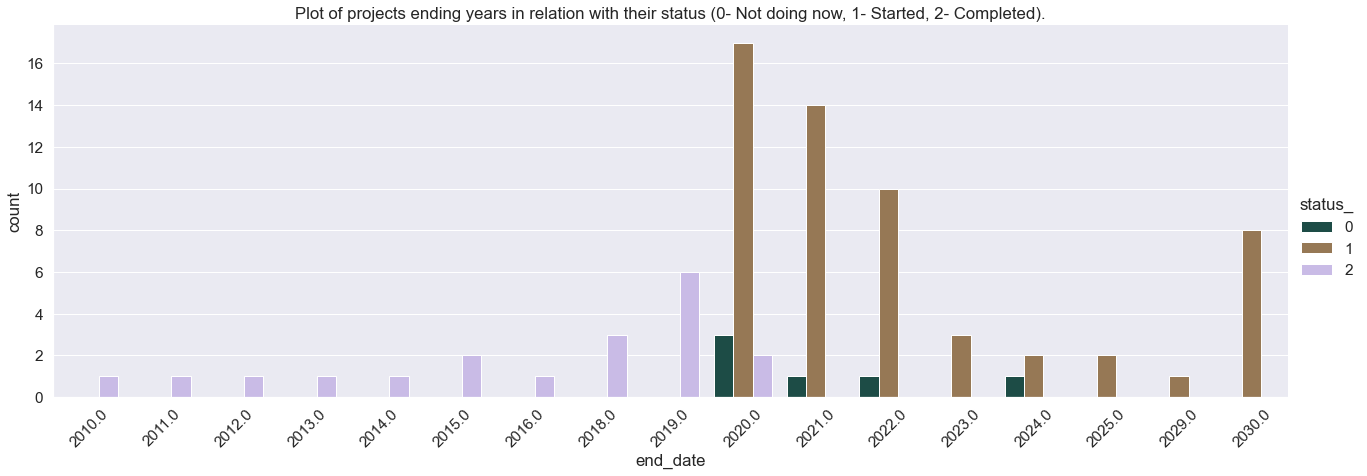

In [102]:
ax=plot_by_variable(EU_correlations, "end_date", "status_")
ax.set(title='Plot of projects ending years in relation with their status (0- Not doing now, 1- Started, 2- Completed).')

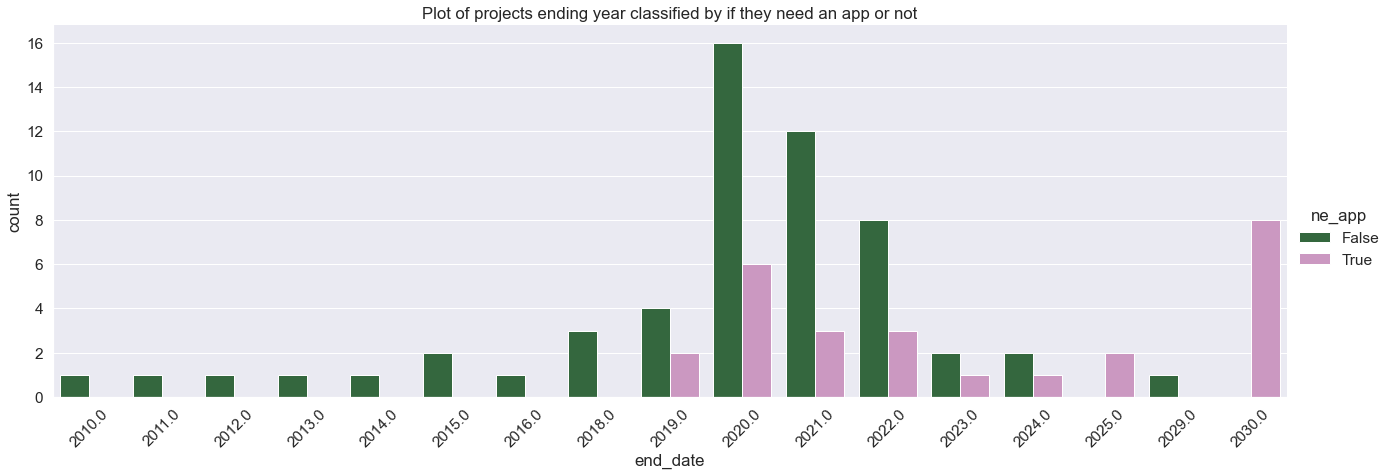

In [103]:
ax=plot_by_variable(EU_correlations, "end_date", "ne_app")
ax.set(title='Plot of projects ending year classified by if they need an app or not')
#What have been explained before can be seen in here

## ANALYSING EUROPEAN RESOURCES

In [107]:
#Getting the data
OUTPUT_FILENAME = "./Data/european_data/EuropeanResources.json"

with open(OUTPUT_FILENAME, 'r', encoding='utf-8') as f:
    resources_dictionaries_list_european = json.load(f)
    
EU_resources=pd.DataFrame.from_dict(resources_dictionaries_list_european)
EU_resources[:5]

id                                               name  \
0    8  Socientize White Paper on Citizen Science in E...   
1  138                 Biodiversa Citizen Science Toolkit   
2   18                             Tree Tools for Schools   
3    1  Citizen Science  science for everyone: A guide...   
4   89  Mapping citizen science contributions to the U...   

                                                 url  \
0  https://ec.europa.eu/newsroom/dae/document.cfm...   
1                    https://www.biodiversa.org/1814   
2  http://www.treetoolsforschools.org.uk/category...   
3  https://www.tcv.org.uk/wp-content/uploads/2014...   
4  https://link.springer.com/article/10.1007%2Fs1...   

                                            abstract  \
0  <p>The SOCIENTIZE Project aims at improving th...   
1  Discover the BiodivERsA Citizen Science Toolki...   
2  <p>A collection of interactive activities, spo...   
3  <p>This guide is a toolkit to help teachers bu...   
4  The UN Sustainable Development Goals (SDGs) ar...   

                                              image1  \
0  https://eu-citizen.science/media/media/images/...   
1  https://eu-citizen.science/media/media/images/...   
2  https://eu-citizen.science/media/media/images/...   
3  https://eu-citizen.science/media/media/images/...   
4  https://eu-citizen.science/media/media/images/...   

                                              image2  \
0  https://eu-citizen.science/media/media/images/...   
1                                               None   
2  https://eu-citizen.science/media/media/images/...   
3  https://eu-citizen.science/media/media/images/...   
4  https://eu-citizen.science/media/media/images/...   

                                             authors  \
0       [{'id': 20, 'author': 'Socientize project'}]   
1  [{'id': 4, 'author': 'H Roy'}, {'id': 1704, 'a...   
2  [{'id': 46, 'author': 'Woodland Trust'}, {'id'...   
3  [{'id': 1, 'author': 'The Conservation Volunte...   
4  [{'id': 273, 'author': 'D Fraisl'}, {'id': 287...   

                                            audience  \
0           [{'id': 7, 'audience': 'ALL Audiences'}]   
1  [{'id': 1, 'audience': 'Researchers & Academic...   
2               [{'id': 2, 'audience': 'Educators'}]   
3               [{'id': 2, 'audience': 'Educators'}]   
4           [{'id': 7, 'audience': 'ALL Audiences'}]   

                  dateUploaded  \
0  2020-03-24T02:51:42.811517Z   
1  2020-11-23T08:36:14.851465Z   
2  2020-03-24T04:04:43.938100Z   
3  2020-03-24T01:44:53.902211Z   
4  2020-07-09T13:53:42.147332Z   

                                            keywords  \
0  [{'id': 118, 'keyword': 'White Paper'}, {'id':...   
1                                                 []   
2  [{'id': 33, 'keyword': 'Education'}, {'id': 41...   
3  [{'id': 1, 'keyword': 'Educators'}, {'id': 2, ...   
4  [{'id': 94, 'keyword': 'Sustainable Developmen...   

                                            category                 license  \
0       {'id': 8, 'text': 'Service', 'parent': None}  Creative Commons CC-BY   
1  {'id': 5, 'text': 'Interactive Resource (Websi...                           
2         {'id': 3, 'text': 'Event', 'parent': None}                           
3      {'id': 15, 'text': 'Guideline', 'parent': 12}                     N/A   
4  {'id': 6, 'text': 'Moving Image (Video)', 'par...                      OA   

                          publisher  datePublished  \
0                Socientize Project         2014.0   
1                        Biodiversa         2020.0   
2                              None         2020.0   
3                               N/A         2014.0   
4  Sustainability Science, Springer         2020.0   

                                               theme inLanguage  \
0  [{'id': 1, 'theme': 'Introduction to CS'}, {'i...         en   
1  [{'id': 1, 'theme': 'Introduction to CS'}, {'i...         en   
2  [{'id': 12, 'theme': 'Instructions'}, {'id': 1...         en   

In [108]:
EU_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             106 non-null    int64  
 1   name           106 non-null    object 
 2   url            106 non-null    object 
 3   abstract       106 non-null    object 
 4   image1         97 non-null     object 
 5   image2         54 non-null     object 
 6   authors        106 non-null    object 
 7   audience       106 non-null    object 
 8   dateUploaded   106 non-null    object 
 9   keywords       106 non-null    object 
 10  category       106 non-null    object 
 11  license        105 non-null    object 
 12  publisher      104 non-null    object 
 13  datePublished  95 non-null     float64
 14  theme          106 non-null    object 
 15  inLanguage     106 non-null    object 
 16  resourceDOI    105 non-null    object 
 17  featured       106 non-null    bool   
dtypes: bool(1)

In [109]:
try:
    EU_resources=EU_resources.drop(columns=['url', 'image1', 'image2', 'license', 'resourceDOI'])
except:
    pass

### ABSTRACT

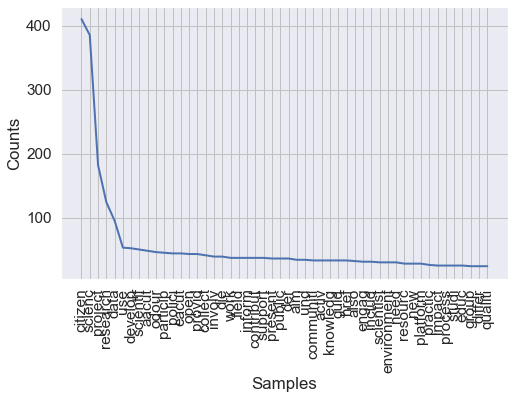


The vocabulary is composed by 106 words 



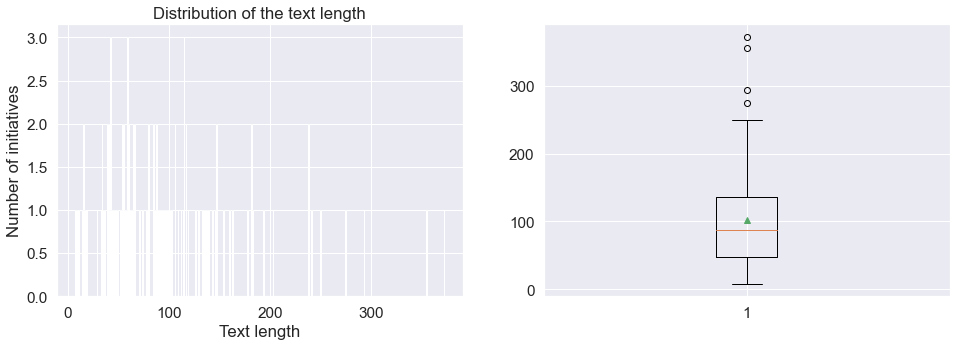

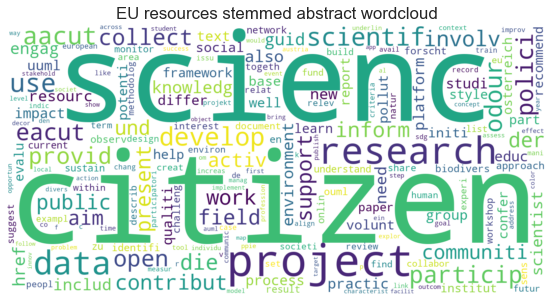

[('citizen', 410),
 ('scienc', 385),
 ('project', 182),
 ('research', 124),
 ('data', 95)]

In [110]:
EU_resources['abstract_clean'] = EU_resources.abstract.apply(lambda text: clean_text(text))
# Get the nltk.Text object
abstract_tokens = convert_to_nltk_text(EU_resources, "abstract_clean")
abstract_std_tokens = standardize_text(abstract_tokens, "english")
EU_resources['abstract_clean'] = EU_resources.abstract_clean.apply(lambda text: standardize_text(text, "english"))

plt.figure(figsize = (8,5))
nltk.FreqDist(abstract_std_tokens).plot(50)

nltk.FreqDist(abstract_std_tokens).most_common(20)

plot_text_length_distribution(dataset = EU_resources,
                              text_field = 'abstract_clean')

bag_of_words_abstract, stemmed_abstract=get_bagofwords(EU_resources, "abstract", "english")
plot_wordcloud("EU resources stemmed abstract wordcloud", stemmed_abstract)

sorted(stemmed_abstract.items(), key= lambda x: x[1], reverse=True)[:5]

In [111]:
tfidfs = []
EU_resources["abstract_resultwords"]=np.empty((len(EU_resources), 0)).tolist()
document_size=len(EU_resources)
# calculate tf
for index, row in EU_resources.iterrows():
    tfidf = TFIDF(row["abstract_clean"])
    tfidf.tf()
    tfidfs.append(tfidf)
# calculate idf

all_text = [tfidf.text for tfidf in tfidfs]
    
for i, tfidf in enumerate(tfidfs):
    tfidf.idf(all_text, document_size)
    tfidf.tf_idf()
    result_df = tfidf.text_df.sort_values('tfidf', ascending=False).head(5)  # sort and take top 5
    result_words = []
    for index, row in result_df.iterrows():
        result_words.append((row.word, row.tfidf))
        EU_resources.loc[i, "abstract_resultwords"].append((row.word, row.tfidf))
    '''print(i)
    print(tfidf.data, result_words)
'''

In [112]:
#CLASSIFICATE IN 4 TYPES OF RESOURCES DEPENDING IF THEY CONTAIN THESE WORDS OR NOT
toolkit=["toolkit", "toolbox"]
activity=["activit"]
webinar=["webinar"]
course=["course"]

In [113]:
# assign data of lists.  
abstract_dict = {'id': [0,1,2,3], 'name': ['toolkit', 'activity', 'webinar', 'course'], 'num_appears': [0,0,0,0], "projects_list": [[], [], [], []]}  
# Create DataFrame  
abstract_df = pd.DataFrame(abstract_dict)  
#add column to dataframe with how to participate list
EU_resources['abstract_list'] = np.empty((len(EU_resources), 0)).tolist()
EU_resources['type']=""

for index, row in EU_resources.iterrows():
    if any(x.lower() in row['abstract'].lower() for x in activity):
        abstract_df.loc[1, "num_appears"]=abstract_df.loc[1, "num_appears"]+1
        abstract_df.loc[1, "projects_list"].append(row["id"])
        row["abstract_list"].append("activity")
        EU_resources.loc[index,"type"]="activity"
    if any(x.lower() in row['abstract'].lower() for x in toolkit):
        abstract_df.loc[0, "num_appears"]=abstract_df.loc[0, "num_appears"]+1
        abstract_df.loc[0, "projects_list"].append(row["id"])
        row["abstract_list"].append("toolkit")
        EU_resources.loc[index,"type"]="toolkit"
    if any(x.lower() in row['abstract'].lower() for x in webinar):
        abstract_df.loc[2, "num_appears"]=abstract_df.loc[2, "num_appears"]+1
        abstract_df.loc[2, "projects_list"].append(row["id"])
        row["abstract_list"].append("webinar")
        EU_resources.loc[index,"type"]="webinar"
    if any(x.lower() in row['abstract'].lower() for x in course):
        abstract_df.loc[3, "num_appears"]=abstract_df.loc[3, "num_appears"]+1
        abstract_df.loc[3, "projects_list"].append(row["id"])
        row["abstract_list"].append("course")
        EU_resources.loc[index,"type"]="course"
        

abstract_df = abstract_df.sort_values(by=['num_appears'], ascending=False)

abstract_df

id      name  num_appears  \
1   1  activity           18   
0   0   toolkit            6   
2   2   webinar            3   
3   3    course            2   

                                       projects_list  
1  [8, 18, 1, 136, 33, 11, 9, 15, 61, 68, 91, 96,...  
0                         [138, 1, 137, 36, 82, 164]  
2                                       [56, 63, 55]  
3                                          [61, 164]

### AUTHORS

In [114]:
EU_resources['authors_list'] = np.empty((len(EU_resources), 0)).tolist()
EU_resources['audience_list'] = np.empty((len(EU_resources), 0)).tolist()
EU_resources['keywords_list']=np.empty((len(EU_resources), 0)).tolist()
EU_resources['themes_list']=np.empty((len(EU_resources), 0)).tolist()
EU_resources['category_']=np.nan

for index, row in EU_resources.iterrows():
    for author in row["authors"]:
        row['authors_list'].append(author['author'])
    for audience in row.audience:
        row['audience_list'].append(audience['audience'])
    for keyword in row.keywords:
        row['keywords_list'].append(keyword['keyword'])
    for theme in row.theme:
        row['themes_list'].append(theme['theme'])
    
    EU_resources.loc[index,['category_']]=row["category"]["text"]


In [115]:
df_r_authors_e = pd.DataFrame(columns=['id', 'author', 'num_times_appears'])

for index, row in EU_resources.iterrows():
    for author in row.authors:
        if author['id'] not in df_r_authors_e.id.unique():
            new_row = {'id':author['id'], 'author':author['author'], 'num_times_appears':1}
            df_r_authors_e = df_r_authors_e.append(new_row, ignore_index=True)
        else:
            index_ = df_r_authors_e.index[df_r_authors_e['id'] == author['id']]
            df_r_authors_e.loc[index_,'num_times_appears'] = df_r_authors_e.loc[index_,'num_times_appears'] +1

In [116]:
df_r_authors_e = df_r_authors_e.sort_values(by=['num_times_appears'], ascending=False)
print("There are ", len(df_r_authors_e['id'].unique()), " distinct authors. From which, the most repetead ones are: ")
df_r_authors_e[:5]

There are  2014  distinct authors. From which, the most repetead ones are: 


id                       author num_times_appears
1749    8               Fermin Serrano                 5
10      1  The Conservation Volunteers                 5
1750   11               Francisco Sanz                 4
1751   18                Maite Pelacho                 4
312   569                   T Schaefer                 3

### AUDIENCE

In [117]:
#AUDIENCE
df_r_audience_e = pd.DataFrame(columns=['id', 'audience', 'num_times_appears'])

for index, row in EU_resources.iterrows():
    for audience in row.audience:
        if audience['id'] not in df_r_audience_e.id.unique():
            new_row = {'id':audience['id'], 'audience':audience['audience'], 'num_times_appears':1}
            df_r_audience_e = df_r_audience_e.append(new_row, ignore_index=True)
        else:
            index_ = df_r_audience_e.index[df_r_audience_e['id'] == audience['id']]
            df_r_audience_e.loc[index_,'num_times_appears'] = df_r_audience_e.loc[index_,'num_times_appears'] +1 

In [118]:
df_r_audience_e = df_r_audience_e.sort_values(by=['num_times_appears'], ascending=False)
print("There are ", len(df_r_audience_e['id'].unique()), " distinct audiences. From which, the most repetead ones are: ")
df_r_audience_e

There are  7  distinct audiences. From which, the most repetead ones are: 


id                         audience num_times_appears
1  1          Researchers & Academics                52
3  4  CS Project Leaders & Initiators                49
4  3     Community Members & Citizens                48
0  7                    ALL Audiences                39
5  5                      CSOs & NGOs                34
2  2                        Educators                33
6  6         Policy & Decision Makers                31

### KEYWORD

In [119]:
#KEYWORDS
df_r_keywords_e = pd.DataFrame(columns=['id', 'keyword', 'num_times_appears'])

for index, row in EU_resources.iterrows():
    for keyword in row.keywords:
        if keyword['id'] not in df_r_keywords_e.id.unique():
            new_row = {'id':keyword['id'], 'keyword':keyword['keyword'], 'num_times_appears':1}
            df_r_keywords_e = df_r_keywords_e.append(new_row, ignore_index=True)
        else:
            index_ = df_r_keywords_e.index[df_r_keywords_e['id'] == keyword['id']]
            df_r_keywords_e.loc[index_,'num_times_appears'] = df_r_keywords_e.loc[index_,'num_times_appears'] +1 

In [120]:
df_r_keywords_e = df_r_keywords_e.sort_values(by=['num_times_appears'], ascending=False)
print("There are ", len(df_r_keywords_e['id'].unique()), " distinct keywords. From which, the most repeated ones are: ")

df_r_keywords_e[:5]

There are  144  distinct keywords. From which, the most repeated ones are: 


id          keyword num_times_appears
23   6      Environment                 8
22   5       Evaluation                 7
24   9         Overview                 7
28  22           Policy                 6
57  80  citizen science                 6

### THEMES

In [121]:
#THEME
df_r_themes_e = pd.DataFrame(columns=['id', 'theme', 'num_times_appears'])

for index, row in EU_resources.iterrows():
    for theme in row.theme:
        if theme['id'] not in df_r_themes_e.id.unique():
            new_row = {'id':theme['id'], 'theme':theme['theme'], 'num_times_appears':1}
            df_r_themes_e = df_r_themes_e.append(new_row, ignore_index=True)
        else:
            index_ = df_r_themes_e.index[df_r_themes_e['id'] == theme['id']]
            df_r_themes_e.loc[index_,'num_times_appears'] = df_r_themes_e.loc[index_,'num_times_appears'] +1
            
df_r_themes_e = df_r_themes_e.sort_values(by=['num_times_appears'], ascending=False)
print(df_r_themes_e['theme'].unique())
print("There are ", len(df_r_themes_e['theme'].unique()), " distinct themes. From which, the most repeated ones are: ")
df_r_themes_e

['Best practices' 'Introduction to CS' 'Research design and methods'
 'Engagement' 'Data quality and standards' 'Impact' 'Communication'
 'Evaluation of citizen science' 'Co-creation' 'Empowerment'
 'Instructions' 'CS stories' 'Regulations and ethics'
 'Link with formal education' 'Project management'
 'Reflections on science' 'Project sustainability' 'Transferability'
 'Event planning']
There are  19  distinct themes. From which, the most repeated ones are: 


id                          theme num_times_appears
7    2                 Best practices                48
0    1             Introduction to CS                35
12   4    Research design and methods                31
1    5                     Engagement                27
11  11     Data quality and standards                23
6   15                         Impact                22
3    7                  Communication                21
15  16  Evaluation of citizen science                20
2    6                    Co-creation                18
4   10                    Empowerment                17
8   12                   Instructions                17
10   9                     CS stories                16
5   14         Regulations and ethics                13
9   13     Link with formal education                12
13   3             Project management                12
18  19         Reflections on science                12
16  17         Project sustainability                10
14  18                Transferability                 7
17   8                 Event planning                 5

### CATEGORIES

In [122]:
#CATEGORY
df_r_category_e = pd.DataFrame(columns=['id', 'text', 'parent', 'num_times_appears'])

for index, row in EU_resources.iterrows():
    try:
        if row.category.get("id") not in df_r_category_e['id'].unique():
            new_row = {'id':row.category.get("id"), 'text':row.category.get("text"), 'parent':row.category.get('parent'), 'num_times_appears':1}        
            df_r_category_e = df_r_category_e.append(new_row, ignore_index=True)
        else:
            index_ = df_r_category_e.index[df_r_category_e['id'] == row.category.get("id")]
            df_r_category_e.loc[index_,'num_times_appears'] = df_r_category_e.loc[index_,'num_times_appears'] +1 
        
    except:
        pass

In [123]:
df_r_category_e = df_r_category_e.sort_values(by=['num_times_appears'], ascending=False)
print("There are ", len(df_r_category_e['id'].unique()), " distinct categories. From which, the most repeated ones are: ")

df_r_category_e

There are  14  distinct categories. From which, the most repeated ones are: 


id                            text parent num_times_appears
3   15                       Guideline     12                31
2    3                           Event   None                14
1    5  Interactive Resource (Website)   None                13
4    6            Moving Image (Video)   None                10
5    1                      Collection   None                10
0    8                         Service   None                 8
9   17          Scientific Publication     12                 6
6   13                          Report     12                 5
7    7      Physical Object (Hardware)   None                 4
8   11                     Still Image   None                 1
10  10                           Sound   None                 1
11   2                         Dataset   None                 1
12   9                        Software   None                 1
13  20                           Other     12                 1

In [124]:
EU_resources['publisher'].value_counts()[:5]

                                        19
The GoNano project                       3
ECSA                                     3
Scivil                                   2
Citizen Science: Theory and Practice     2
Name: publisher, dtype: int64

Text(0, 0.5, 'Number of resources')

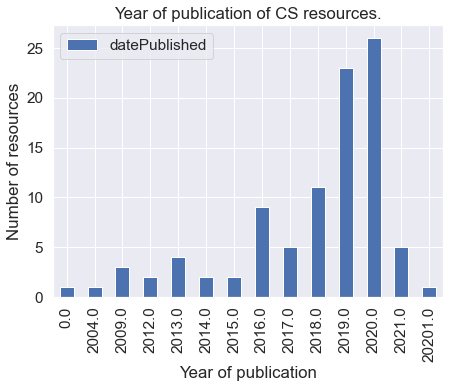

In [125]:
ax=EU_resources['datePublished'].value_counts().sort_index().plot(kind='bar', figsize=(7,5), title="Year of publication of CS resources.", legend=True)
ax.set_xlabel("Year of publication")
ax.set_ylabel("Number of resources")

Text(0, 0.5, 'Number of resources')

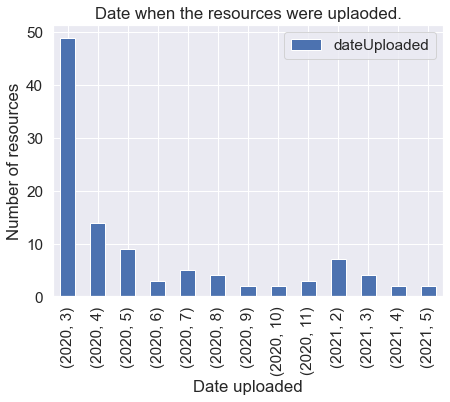

In [126]:
EU_resources['dateUploaded'] = pd.to_datetime(EU_resources['dateUploaded'])
EU_resources['dateUploaded'] = pd.to_datetime(EU_resources['dateUploaded']).dt.tz_localize(None)

#resources_dataframe['dateUploaded'].value_counts().plot(kind='bar')
ax=EU_resources['dateUploaded'].groupby([EU_resources["dateUploaded"].dt.year, EU_resources["dateUploaded"].dt.month]).count().plot(kind="bar", figsize=(7,5), title="Date when the resources were uplaoded.", legend=True)
ax.set_xlabel("Date uploaded")
ax.set_ylabel("Number of resources")

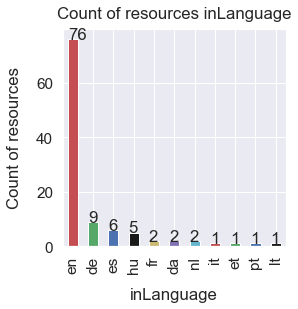

In [127]:
plot_countplot(EU_resources, 'inLanguage', "resources", False)

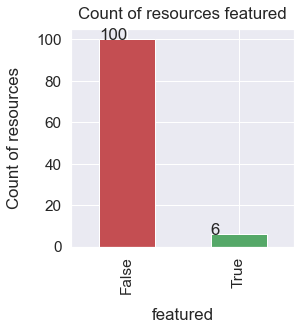

In [128]:
plot_countplot(EU_resources, 'featured', "resources", False)

In [129]:
EU_resources[EU_resources.featured==True]

id                                               name  \
72   148  Geographic Citizen Science Design: no one left...   
97   162       Állampolgári tudomány és közösségi filozófia   
98   161  CONECT-e: Petra Benyei’s workshop on the citiz...   
100  169                               ECSA Conference 2020   
103  164                     'Sensing the Risk' book launch   
105  167                     Citizen Science SDG Conference   

                                              abstract  \
72   <p>Little did Isaac Newton, Charles Darwin and...   
97   <p>&Iacute;r&aacute;somban olyan &uacute;jabb ...   
98   <p>On the 24th&nbsp;of November,&nbsp;<a href=...   
100  <p style="text-align:justify">In September 202...   
103  <p>On March 15, the &lsquo;Sensing the Risk&rs...   
105  <p style="text-align:justify">In October 2020,...   

                                               authors  \
72   [{'id': 233, 'author': 'M Haklay'}, {'id': 298...   
97            [{'id': 2054, 'author': 'László Nemes'}]   
98                                                  []   
100  [{'id': 274, 'author': 'D Riemenschneider'}, {...   
103          [{'id': 2047, 'author': 'A Berti Suman'}]   
105  [{'id': 2013, 'author': 'S Voigt-Heucke'}, {'i...   

                                              audience  \
72   [{'id': 2, 'audience': 'Educators'}, {'id': 4,...   
97   [{'id': 5, 'audience': 'CSOs & NGOs'}, {'id': ...   
98   [{'id': 3, 'audience': 'Community Members & Ci...   
100  [{'id': 5, 'audience': 'CSOs & NGOs'}, {'id': ...   
103  [{'id': 1, 'audience': 'Researchers & Academic...   
105  [{'id': 1, 'audience': 'Researchers & Academic...   

                  dateUploaded  \
72  2021-02-10 19:35:31.995136   
97  2021-03-29 09:22:46.777788   
98  2021-03-29 09:17:04.595078   
100 2021-05-14 11:47:50.790976   
103 2021-04-19 10:07:13.577137   
105 2021-05-02 15:29:45.000000   

                                              keywords  \
72   [{'id': 15, 'keyword': 'Mobile App'}, {'id': 1...   
97   [{'id': 44, 'keyword': 'Public engagement'}, {...   
98                                                  []   
100  [{'id': 8, 'keyword': 'Starting projects'}, {'...   
103  [{'id': 3, 'keyword': 'Toolkit'}, {'id': 6, 'k...   
105  [{'id': 5, 'keyword': 'Evaluation'}, {'id': 22...   

                                              category  \
72   {'id': 17, 'text': 'Scientific Publication', '...   
97   {'id': 17, 'text': 'Scientific Publication', '...   
98          {'id': 13, 'text': 'Report', 'parent': 12}   
100    {'id': 1, 'text': 'Collection', 'parent': None}   
103         {'id': 3, 'text': 'Event', 'parent': None}   
105    {'id': 1, 'text': 'Collection', 'parent': None}   

                                             publisher  datePublished  \
72                                           UCL Press        20201.0   
97                            MAGYAR FILOZÓFIAI SZEMLE         2020.0   
98                                               ESSRG         2021.0   
100                                                            2020.0   
103  Wolf Legal Publishers; The Sensing for Justice...         2021.0   
105                                               None         2020.0   

                                                 theme inLanguage  featured  \
72   [{'id': 2, 'theme': 'Best practices'}, {'id': ...         en      True   
97   [{'id': 1, 'theme': 'Introduction to CS'}, {'i...         hu      True   
98              [{'id': 2, 'theme': 'Best practices'}]         en      True   
100  [{'id': 5, 'theme': 'Engagement'}, {'id': 16, ...         en      True   
103  [{'id': 9, 'theme': 'CS stories'}, {'id': 10, ...         en      True   
105  [{'id': 2, 'theme': 'Best practices'}, {'id': ...         en      True   

                                        abstract_clean  \
72   littl isaac newton charl darwin lsquo gentleme...   
97   iacut r aacut somban olyan uacut jabb nemzetk ...   
98   th novemb href http laseg cat en team petra b

## RESOURCES RELATED WITH EDUCATION

In [131]:
education_dataframe=pd.DataFrame(columns=EU_resources.columns)
educators_list=[]
all_audiences_list=[]
link_with_formal_list=[]
keywords_list=[]

EU_resources["inEducation"]=False
#education_keywords_list=['Educators', 'Teachers', 'Education', 'non formal education', 'high school', 'school', 'secondary', 'primary']

education_keywords=['Educators', 'Teachers', 'Education', 'high school', 'school', 'secondary', 'primary']

for index, row in EU_resources.iterrows():
    if "Educators" in row.audience_list:
        educators_list.append(row["id"])
        
    if "Link with formal education" in row.themes_list:
        link_with_formal_list.append(row["id"])
        
    if any(x in row.keywords_list for x in education_keywords):
        keywords_list.append(row["id"]) 
        
    if "Educators" in row.audience_list or "Link with formal education" in row.themes_list or any(x in row.keywords_list for x in education_keywords):     
        education_dataframe=education_dataframe.append(row,ignore_index=True)
        EU_resources.loc[index, "inEducation"]=True

In [132]:
print("Resources with Educators as audience: ",len(sorted(list(educators_list))))
print("Resources with link with formal education as theme: ", len(sorted(list(link_with_formal_list))))
print("Resources with any educational keyword: ", len(sorted(list(keywords_list))))
education_field=(sorted(list( set(educators_list) | set(link_with_formal_list) | set(keywords_list))))
print("Therefore, ", len(education_field), " out of ", len(EU_resources) ,"resources have an educational keyword, audience or theme. ")


Resources with Educators as audience:  33
Resources with link with formal education as theme:  12
Resources with any educational keyword:  9
Therefore,  35  out of  106 resources have an educational keyword, audience or theme. 


In [133]:
with pd.ExcelWriter('EU_resources.xlsx', options={'strings_to_urls': False}) as writer:
        EU_resources.to_excel(writer, 'EU_resources')
EU_resources[:5]

id                                               name  \
0    8  Socientize White Paper on Citizen Science in E...   
1  138                 Biodiversa Citizen Science Toolkit   
2   18                             Tree Tools for Schools   
3    1  Citizen Science  science for everyone: A guide...   
4   89  Mapping citizen science contributions to the U...   

                                            abstract  \
0  <p>The SOCIENTIZE Project aims at improving th...   
1  Discover the BiodivERsA Citizen Science Toolki...   
2  <p>A collection of interactive activities, spo...   
3  <p>This guide is a toolkit to help teachers bu...   
4  The UN Sustainable Development Goals (SDGs) ar...   

                dateUploaded                         publisher  datePublished  \
0 2020-03-24 02:51:42.811517                Socientize Project         2014.0   
1 2020-11-23 08:36:14.851465                        Biodiversa         2020.0   
2 2020-03-24 04:04:43.938100                              None         2020.0   
3 2020-03-24 01:44:53.902211                               N/A         2014.0   
4 2020-07-09 13:53:42.147332  Sustainability Science, Springer         2020.0   

  inLanguage  featured                                     abstract_clean  \
0         en     False  socient project aim improv understand uptak im...   
1         en     False  discov biodiversa citizen scienc toolkit aim r...   
2         en     False  collect interact activ spot sheet download res...   
3         en     False  guid toolkit help teacher build citizen scienc...   
4         en     False  un sustain develop goal sdgs vision achiev sus...   

                                abstract_resultwords        abstract_list  \
0  [(uptak, 0.06), (multi, 0.054), (amateur, 0.04...           [activity]   
1  [(biodiversa, 0.209), (discov, 0.209), (toolki...            [toolkit]   
2  [(environ, 0.27), (children, 0.265), (sheet, 0...           [activity]   
3  [(school, 0.129), (local, 0.112), (learn, 0.1)...  [activity, toolkit]   
4  [(sdg, 0.245), (indic, 0.101), (could, 0.078),...                   []   

       type                                       authors_list  \
0  activity                               [Socientize project]   
1   toolkit  [H Roy, L Goudeseune, H Eggermont, Q Groom, X ...   
2  activity                            [Woodland Trust, DEFRA]   
3   toolkit                      [The Conservation Volunteers]   
4            [D Fraisl, M Gold, U Wehn, J Campbell, L See, ...   

               audience_list                           keywords_list  \
0            [ALL Audiences]                   [White Paper, Europe]   
1  [Researchers & Academics]                                      []   
2                [Educators]     [Education, Activity, Downloadable]   
3                [Educators]          [Educators, Teachers, Toolkit]   
4            [ALL Audiences]  [Sustainable Development Goals (SDGs)]   

                                         themes_list  \
0  [Introduction to CS, Engagement, Co-creation, ...   
1  [Introduction to CS, Best practices, Instructi...   
2         [Instructions, Link with formal education]   
3                       [Link with formal education]   
4  [Best practices, CS stories, Data quality and ...   

                        category_  inEducation  
0                         Service        False  
1  Interactive Resource (Website)        False  
2                           Event         True  
3                       Guideline         True  
4            Moving Image (Video)        False

## ANALYSING EUROPEAN TRAINING RESOURCES

In [134]:
OUTPUT_FILENAME = "./Data/european_data/EuropeanTrainingResources.json"

with open(OUTPUT_FILENAME, 'r', encoding='utf-8') as f:
    training_resources_dictionaries_list_european = json.load(f)
    
EU_train_res=pd.DataFrame.from_dict(training_resources_dictionaries_list_european)
EU_train_res[:5]

id                                               name  \
0   32  Citizen Science and Scientific Crowdsourcing: ...   
1  101                         Citizen Science with GIS&T   
2   99                     Open Science Training Handbook   
3   39  Citizen Science Projects: How to Make a Differ...   
4  105    Natural History Museum Guide to Citizen Science   

                                                 url  \
0  https://www.ucl.ac.uk/lifelearning/courses/cit...   
1  https://gistbok.ucgis.org/bok-topics/2018-quar...   
2  https://open-science-training-handbook.gitbook...   
3  https://www.futurelearn.com/courses/weobserve-...   
4  https://www.nhm.ac.uk/content/dam/nhmwww/take-...   

                                            abstract  \
0  Formal university course on a variety of diffe...   
1  Citizen Science is defined as the participatio...   
2  Basic facts of CS (e.g., approach, law, ethics...   
3  "Would you like to understand the environment ...   
4  Guide to help design and implement a citizen s...   

                                              image1  \
0  https://eu-citizen.science/media/media/images/...   
1  https://eu-citizen.science/media/media/images/...   
2  https://eu-citizen.science/media/media/images/...   
3  https://eu-citizen.science/media/media/images/...   
4  https://eu-citizen.science/media/media/images/...   

                                              image2  \
0  https://eu-citizen.science/media/media/images/...   
1  https://eu-citizen.science/media/media/images/...   
2                                               None   
3  https://eu-citizen.science/media/media/images/...   
4  https://eu-citizen.science/media/media/images/...   

                                             authors  \
0                     [{'id': 150, 'author': 'UCL'}]   
1  [{'id': 233, 'author': 'M Haklay'}, {'id': 296...   
2                                                 []   
3       [{'id': 160, 'author': 'WeObserve Project'}]   
4  [{'id': 2, 'author': 'J Tweddle'}, {'id': 3, '...   

                                            audience  \
0  [{'id': 1, 'audience': 'Researchers & Academic...   
1  [{'id': 1, 'audience': 'Researchers & Academic...   
2               [{'id': 2, 'audience': 'Educators'}]   
3           [{'id': 7, 'audience': 'ALL Audiences'}]   
4  [{'id': 1, 'audience': 'Researchers & Academic...   

                  dateUploaded  \
0  2020-03-25T15:08:37.730245Z   
1  2020-09-08T08:32:59.265312Z   
2  2020-09-08T08:12:02.860362Z   
3  2020-03-26T11:05:30.520423Z   
4  2020-09-08T08:56:59.727372Z   

                                            keywords  \
0    [{'id': 70, 'keyword': 'general introduction'}]   
1  [{'id': 127, 'keyword': 'Volunteered Geographi...   
2                                                 []   
3  [{'id': 80, 'keyword': 'citizen science'}, {'i...   
4  [{'id': 6, 'keyword': 'Environment'}, {'id': 2...   

                                            category license  \
0         {'id': 3, 'text': 'Event', 'parent': None}           
1  {'id': 5, 'text': 'Interactive Resource (Websi...  CC-BY,   
2  {'id': 5, 'text': 'Interactive Resource (Websi...           
3         {'id': 3, 'text': 'Event', 'parent': None}           
4         {'id': 13, 'text': 'Report', 'parent': 12}           

                 publisher  datePublished  \
0                      UCL         2018.0   
1                    UCGIS         2019.0   
2                    H2020            NaN   
3  WeObserve - FutureLearn         2019.0   
4   Natural History Museum         2012.0   

                                               theme inLanguage  \
0  [{'id': 6, 'theme': 'Co-creation'}, {'id': 19,...         en   
1  [{'id': 16, 'theme': 'Evaluation of citizen sc...         en   
2         [{'id': 3, 'theme': 'Project management'}]         en   
3  [{'id': 1, 'theme': 'Introduction to CS'}, {'i...         en   
4             [{'id': 2, 'theme': 'Best practices'}]         en   

              

In [135]:
EU_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25 non-null     int64  
 1   name                  25 non-null     object 
 2   url                   25 non-null     object 
 3   abstract              25 non-null     object 
 4   image1                24 non-null     object 
 5   image2                8 non-null      object 
 6   authors               25 non-null     object 
 7   audience              25 non-null     object 
 8   dateUploaded          25 non-null     object 
 9   keywords              25 non-null     object 
 10  category              25 non-null     object 
 11  license               25 non-null     object 
 12  publisher             25 non-null     object 
 13  datePublished         19 non-null     float64
 14  theme                 25 non-null     object 
 15  inLanguage            25 

In [136]:
try:
    EU_train_res=EU_train_res.drop(columns=['url', 'image1', 'image2', 'license', 'resourceDOI'])
except:
    pass

In [137]:
print("There are ", len(EU_train_res),"posted training resources")

There are  25 posted training resources


In [138]:
#CHECK WHICH COLUMNS ARE NOT EMPTY
EU_train_res[EU_train_res["conditionsOfAccess"]!=""]
#Since only one resource indicates the conditions of access this column will be remove since it does not provide any useful information. 
EU_train_res=EU_train_res.drop(columns=['conditionsOfAccess'])

In [139]:
print(EU_train_res["educationLevel"].unique())
print(EU_train_res["learningResourceType"].unique())
print("Therefore, both columns are empty, so there are gonna be removed since they do not provide any useful information.")
print(EU_train_res["timeRequired"].unique())
print("Time required column will also be removed since only 6 training resources have this field filled and it does not specify how the time is expressed. Therefore it does not provide any useful information. ")
EU_train_res=EU_train_res.drop(columns=['educationLevel', 'learningResourceType', 'timeRequired'])

[None]
[None]
Therefore, both columns are empty, so there are gonna be removed since they do not provide any useful information.
[ nan  1.   1.5  2.  24. ]
Time required column will also be removed since only 6 training resources have this field filled and it does not specify how the time is expressed. Therefore it does not provide any useful information. 


### ABSTRACT

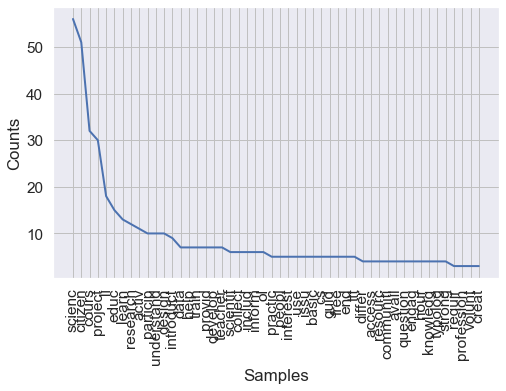


The vocabulary is composed by 25 words 



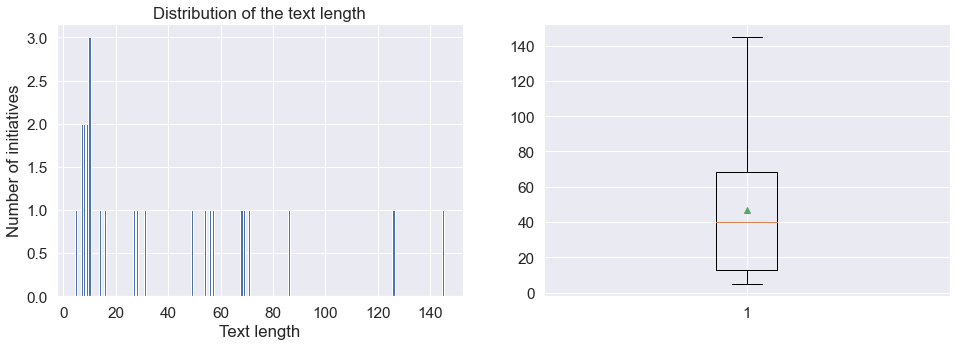

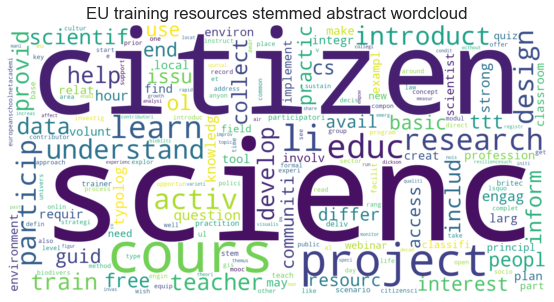

[('scienc', 56), ('citizen', 51), ('cours', 32), ('project', 30), ('li', 18)]

In [140]:
EU_train_res['abstract_clean'] = EU_train_res.abstract.apply(lambda text: clean_text(text))
# Get the nltk.Text object
abstract_tokens = convert_to_nltk_text(EU_train_res, "abstract_clean")
abstract_std_tokens = standardize_text(abstract_tokens, "english")
EU_train_res['abstract_clean'] = EU_train_res.abstract_clean.apply(lambda text: standardize_text(text, "english"))

plt.figure(figsize = (8, 5))
nltk.FreqDist(abstract_std_tokens).plot(50)

plot_text_length_distribution(dataset = EU_train_res,
                              text_field = 'abstract_clean')

bag_of_words_abstract, stemmed_abstract=get_bagofwords(EU_train_res, "abstract", "english")
plot_wordcloud("EU training resources stemmed abstract wordcloud", stemmed_abstract)

sorted(stemmed_abstract.items(), key= lambda x: x[1], reverse=True)[:5]

In [141]:
tfidfs = []
EU_train_res["abstract_resultwords"]=np.empty((len(EU_train_res), 0)).tolist()
document_size=len(EU_train_res)
# calculate tf
for index, row in EU_train_res.iterrows():
    tfidf = TFIDF(row["abstract_clean"])
    tfidf.tf()
    tfidfs.append(tfidf)
# calculate idf

all_text = [tfidf.text for tfidf in tfidfs]
    
for i, tfidf in enumerate(tfidfs):
    tfidf.idf(all_text, document_size)
    tfidf.tf_idf()
    result_df = tfidf.text_df.sort_values('tfidf', ascending=False).head(5)  # sort and take top 5
    result_words = []
    for index, row in result_df.iterrows():
        result_words.append((row.word, row.tfidf))
        EU_train_res.loc[i, "abstract_resultwords"].append((row.word, row.tfidf))

    '''print(i)
    print(tfidf.data, result_words)'''

In [142]:
webinar=["webinar"]
activity=["activit"]
course=["course"]
toolkit=["toolkit", "toolbox"]

In [143]:
# assign data of lists.  
abstract_dict = {'id': [0,1,2,3], 'name': ['toolkit', 'activity', 'webinar', 'course'], 'num_appears': [0,0,0,0], "projects_list": [[], [], [], []]}  

# Create DataFrame  
abstract_df = pd.DataFrame(abstract_dict)  
#add column to dataframe with how to participate list
EU_train_res['abstract_list'] = np.empty((len(EU_train_res), 0)).tolist()
EU_train_res['type']=""

for index, row in EU_train_res.iterrows():
    if any(x.lower() in row['abstract'].lower() for x in activity):
        abstract_df.loc[1, "num_appears"]=abstract_df.loc[1, "num_appears"]+1
        abstract_df.loc[1, "projects_list"].append(row["id"])
        row["abstract_list"].append("activity")
        EU_train_res.loc[index,"type"]="activity"
    if any(x.lower() in row['abstract'].lower() for x in toolkit):
        abstract_df.loc[0, "num_appears"]=abstract_df.loc[0, "num_appears"]+1
        abstract_df.loc[0, "projects_list"].append(row["id"])
        row["abstract_list"].append("toolkit")
        EU_train_res.loc[index,"type"]="toolkit"
    if any(x.lower() in row['abstract'].lower() for x in webinar):
        abstract_df.loc[2, "num_appears"]=abstract_df.loc[2, "num_appears"]+1
        abstract_df.loc[2, "projects_list"].append(row["id"])
        row["abstract_list"].append("webinar")
        EU_train_res.loc[index,"type"]="webinar"
    if any(x.lower() in row['abstract'].lower() for x in course):
        abstract_df.loc[3, "num_appears"]=abstract_df.loc[3, "num_appears"]+1
        abstract_df.loc[3, "projects_list"].append(row["id"])
        row["abstract_list"].append("course")
        EU_train_res.loc[index,"type"]="course"
        
abstract_df = abstract_df.sort_values(by=['num_appears'], ascending=False)

abstract_df

id      name  num_appears                                     projects_list
3   3    course           10  [32, 39, 124, 125, 141, 142, 143, 144, 156, 153]
1   1  activity            5                         [124, 141, 143, 144, 156]
2   2   webinar            3                                   [109, 110, 116]
0   0   toolkit            1                                             [104]

Out of the 25 posted training resources, 10 of them are courses (including 5 activites), 3 are webinars and there is 1 toolkit.  

### AUTHORS

In [144]:
EU_train_res['authors_list'] = np.empty((len(EU_train_res), 0)).tolist()
EU_train_res['audience_list'] = np.empty((len(EU_train_res), 0)).tolist()
EU_train_res['keywords_list']=np.empty((len(EU_train_res), 0)).tolist()
EU_train_res['themes_list']=np.empty((len(EU_train_res), 0)).tolist()
EU_train_res['category_']=np.nan

for index, row in EU_train_res.iterrows():
    for author in row["authors"]:
        row['authors_list'].append(author['author'])
    for audience in row.audience:
        row['audience_list'].append(audience['audience'])
    for keyword in row.keywords:
        row['keywords_list'].append(keyword['keyword'])
    for theme in row.theme:
        row['themes_list'].append(theme['theme'])
    
    EU_train_res.loc[index,['category_']]=row["category"]["text"]


In [145]:
df_tr_authors_e = pd.DataFrame(columns=['id', 'author', 'num_times_appears'])

for index, row in EU_train_res.iterrows():

    for author in row.authors:
        if author['id'] not in df_tr_authors_e.id.unique():
            new_row = {'id':author['id'], 'author':author['author'], 'num_times_appears':1}
            df_tr_authors_e = df_tr_authors_e.append(new_row, ignore_index=True)
        else:
            index_ = df_tr_authors_e.index[df_tr_authors_e['id'] == author['id']]
            df_tr_authors_e.loc[index_,'num_times_appears'] = df_tr_authors_e.loc[index_,'num_times_appears'] +1


In [146]:
df_tr_authors_e = df_tr_authors_e.sort_values(by=['num_times_appears'], ascending=False)
print("There are ", len(df_tr_authors_e['id'].unique()), " distinct authors. ")
df_tr_authors_e

There are  10  distinct authors. 


id             author num_times_appears
0  150                UCL                 5
1  233           M Haklay                 1
2  296          P Rickles                 1
3  297            C Ellul                 1
4  298      A Skarlatidou                 1
5  160  WeObserve Project                 1
6    2          J Tweddle                 1
7    3         L Robinson                 1
8    4              H Roy                 1
9    5           M Pocock                 1

### AUDIENCE

In [147]:
#AUDIENCE
df_tr_audience_e = pd.DataFrame(columns=['id', 'audience', 'num_times_appears'])

for index, row in EU_train_res.iterrows():
    for audience in row.audience:
        if audience['id'] not in df_tr_audience_e.id.unique():
            new_row = {'id':audience['id'], 'audience':audience['audience'], 'num_times_appears':1}
            df_tr_audience_e = df_tr_audience_e.append(new_row, ignore_index=True)
        else:
            index_ = df_tr_audience_e.index[df_tr_audience_e['id'] == audience['id']]
            df_tr_audience_e.loc[index_,'num_times_appears'] = df_tr_audience_e.loc[index_,'num_times_appears'] +1 

In [148]:
df_tr_audience_e = df_tr_audience_e.sort_values(by=['num_times_appears'], ascending=False)
print(df_tr_audience_e['id'].unique())
df_tr_audience_e

[1 4 2 3 7 6 5]


id                         audience num_times_appears
0  1          Researchers & Academics                15
4  4  CS Project Leaders & Initiators                10
1  2                        Educators                 8
5  3     Community Members & Citizens                 5
2  7                    ALL Audiences                 3
3  6         Policy & Decision Makers                 2
6  5                      CSOs & NGOs                 2

### KEYWORDS

In [149]:
#KEYWORDS
df_tr_keywords_e = pd.DataFrame(columns=['id', 'keyword', 'num_times_appears'])

for index, row in EU_train_res.iterrows():
    for keyword in row.keywords:
        if keyword['id'] not in df_tr_keywords_e.id.unique():
            new_row = {'id':keyword['id'], 'keyword':keyword['keyword'], 'num_times_appears':1}
            df_tr_keywords_e = df_tr_keywords_e.append(new_row, ignore_index=True)
        else:
            index_ = df_tr_keywords_e.index[df_tr_keywords_e['id'] == keyword['id']]
            df_tr_keywords_e.loc[index_,'num_times_appears'] = df_tr_keywords_e.loc[index_,'num_times_appears'] +1 

In [150]:
df_tr_keywords_e = df_tr_keywords_e.sort_values(by=['num_times_appears'], ascending=False)
df_tr_keywords_e[:5]

id               keyword num_times_appears
3   80       citizen science                 2
0   70  general introduction                 1
13   7          Introduction                 1
22  33             Education                 1
21  28                school                 1

### CATEGORIES

In [151]:
#CATEGORY
df_tr_category_e = pd.DataFrame(columns=['id', 'text', 'parent', 'num_times_appears', 'list_projects'])

for index, row in EU_train_res.iterrows():
    try:
        if row.category.get("id") not in df_tr_category_e['id'].unique():
            new_row = {'id':row.category.get("id"), 'text':row.category.get("text"), 'parent':row.category.get('parent'), 'num_times_appears':1, 'list_projects':[row.id]}        
            df_tr_category_e = df_tr_category_e.append(new_row, ignore_index=True)
        else:
            index_ = df_tr_category_e.index[df_tr_category_e['id'] == row.category.get("id")]
            df_tr_category_e.loc[index_,'num_times_appears'] = df_tr_category_e.loc[index_,'num_times_appears'] +1 
        
    except:
        pass

In [152]:
df_tr_category_e = df_tr_category_e.sort_values(by=['num_times_appears'], ascending=False)
df_tr_category_e

id                            text parent num_times_appears list_projects
1   5  Interactive Resource (Website)   None                13         [101]
4   6            Moving Image (Video)   None                 4         [107]
0   3                           Event   None                 3          [32]
2  13                          Report     12                 2         [105]
3  15                       Guideline     12                 1         [104]
5  19                            Book     12                 1         [114]
6   1                      Collection   None                 1         [116]

### THEMES

In [153]:
#THEME
df_tr_themes_e = pd.DataFrame(columns=['id', 'theme', 'num_times_appears', 'list_projects'])

for index, row in EU_train_res.iterrows():
    for theme in row.theme:
        if theme['id'] not in df_tr_themes_e.id.unique():
            new_row = {'id':theme['id'], 'theme':theme['theme'], 'num_times_appears':1, 'list_projects':[row.id]}
            df_tr_themes_e = df_tr_themes_e.append(new_row, ignore_index=True)
        else:
            index_ = df_tr_themes_e.index[df_tr_themes_e['id'] == theme['id']]
            df_tr_themes_e.loc[index_,['num_times_appears']] = df_tr_themes_e.loc[index_,['num_times_appears']] +1

In [154]:
df_tr_themes_e = df_tr_themes_e.sort_values(by=['num_times_appears'], ascending=False)
df_tr_themes_e[:5]

id                       theme num_times_appears list_projects
8   1          Introduction to CS                13          [32]
6   2              Best practices                 9          [32]
4   5                  Engagement                 6          [32]
3  11  Data quality and standards                 4          [32]
0   6                 Co-creation                 3          [32]

In [155]:
EU_train_res['publisher'].value_counts()[:5]

                                                    5
Citizen science association (CSA)                   2
SciStarter                                          1
Californian Academy Sciences; Pearson Foundation    1
Natural History Museum                              1
Name: publisher, dtype: int64

Text(0, 0.5, 'Number of resources')

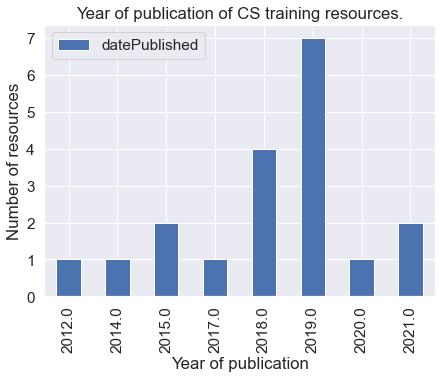

In [156]:
ax=EU_train_res['datePublished'].value_counts().sort_index().plot(kind='bar', figsize=(7,5), title="Year of publication of CS training resources.", legend=True)
ax.set_xlabel("Year of publication")
ax.set_ylabel("Number of resources")

Text(0, 0.5, 'Number of resources')

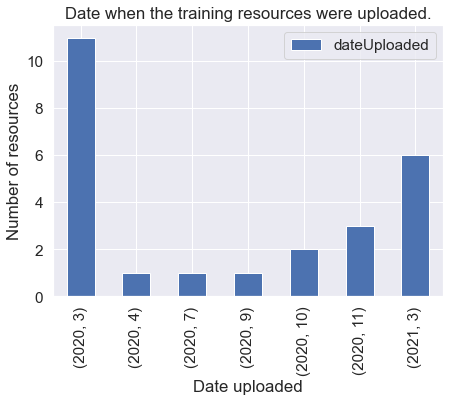

In [157]:
EU_train_res['dateUploaded'] = pd.to_datetime(EU_train_res['dateUploaded'])
EU_train_res['dateUploaded'] = pd.to_datetime(EU_train_res['dateUploaded']).dt.tz_localize(None)

#resources_dataframe['dateUploaded'].value_counts().plot(kind='bar')
ax=EU_train_res['dateUploaded'].groupby([EU_train_res["dateUploaded"].dt.year, EU_resources["dateUploaded"].dt.month]).count().plot(kind="bar", figsize=(7,5), title="Date when the training resources were uploaded.", legend=True)
ax.set_xlabel("Date uploaded")
ax.set_ylabel("Number of resources")

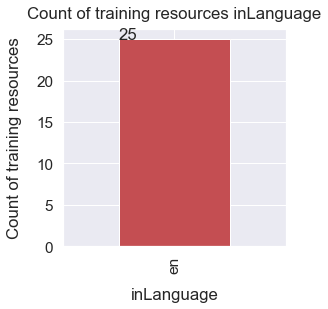

In [158]:
plot_countplot(EU_train_res, 'inLanguage', "training resources", False)

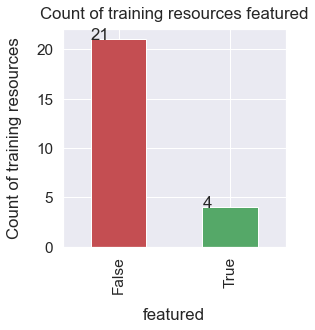

In [159]:
plot_countplot(EU_train_res, 'featured', "training resources", False)

In [160]:
EU_train_res[EU_train_res.featured==True]

id                                            name  \
19  141                      Citizen Science Typologies   
20  142                 Introduction to Citizen Science   
21  143          Leading a ‘Train the Trainer’ workshop   
22  144  Designing for learning through citizen science   

                                             abstract  \
19  <p>This is a free course of 1.5 hours for anyo...   
20  <p>This is a free course of approximately 1.5 ...   
21  <p>This is a free course of 1.5 hours for citi...   
22  <p>This is a free course of two hours, that pr...   

                           authors  \
19  [{'id': 150, 'author': 'UCL'}]   
20  [{'id': 150, 'author': 'UCL'}]   
21  [{'id': 150, 'author': 'UCL'}]   
22  [{'id': 150, 'author': 'UCL'}]   

                                             audience  \
19  [{'id': 1, 'audience': 'Researchers & Academic...   
20           [{'id': 7, 'audience': 'ALL Audiences'}]   
21  [{'id': 1, 'audience': 'Researchers & Academic...   
22  [{'id': 4, 'audience': 'CS Project Leaders & I...   

                 dateUploaded  \
19 2021-01-20 10:33:01.103296   
20 2021-01-20 10:52:30.333084   
21 2021-01-20 10:58:26.374592   
22 2021-01-20 22:34:45.832865   

                                             keywords  \
19             [{'id': 924, 'keyword': 'typologies'}]   
20  [{'id': 7, 'keyword': 'Introduction'}, {'id': ...   
21               [{'id': 55, 'keyword': 'Knowledge'}]   
22  [{'id': 1, 'keyword': 'Educators'}, {'id': 2, ...   

                                             category publisher  \
19  {'id': 5, 'text': 'Interactive Resource (Websi...             
20  {'id': 5, 'text': 'Interactive Resource (Websi...             
21  {'id': 5, 'text': 'Interactive Resource (Websi...             
22  {'id': 5, 'text': 'Interactive Resource (Websi...             

    datePublished                                              theme  \
19            NaN             [{'id': 2, 'theme': 'Best practices'}]   
20            NaN         [{'id': 1, 'theme': 'Introduction to CS'}]   
21            NaN             [{'id': 2, 'theme': 'Best practices'}]   
22            NaN  [{'id': 1, 'theme': 'Introduction to CS'}, {'i...   

   inLanguage  featured   own  \
19         en      True  True   
20         en      True  True   
21         en      True  True   
22         en      True  True   

                                       abstract_clean  \
19  free cours hour anyon wish learn differ approa...   
20  free cours approxim hour citizen scienc practi...   
21  free cours hour citizen scienc practition look...   
22  free cours two hour provid introduct design de...   

                                 abstract_resultwords       abstract_list  \
19  [(classifi, 0.107), (quiz, 0.107), (typolog, 0...  [activity, course]   
20  [(li, 0.075), (ol, 0.064), (understand, 0.06),...            [course]   
21  [(ttt, 0.183), (trainer, 0.11), (train, 0.106)...  [activity, course]   
22  [(design, 0.084), (deliv, 0.079), (particip, 0...  [activity, course]   

      type authors_list                                      audience_list  \
19  course        [UCL]                          [Researchers & Academics]   
20  course        [UCL]                                    [ALL Audiences]   
21  course        [UCL]  [Researchers & Academics, CS Project Leaders &...   
22  course        [UCL]       [CS Project Leaders & Initiators, Educators]   

                                        keywords_list  \
19                                       [typologies]   
20   [Introduction, citizen science, Characteristics]   
21                                        [Knowledge]   
22  [Educators, Teachers, Design, primary, seconda...   

                                         themes_list  \
19                                  [Best practices]   
20                              [Introduction to CS]   
21                                  [Best practices]   
22  [Introduction to CS, Best practices, Engagement]   

 

True    4
Name: own, dtype: int64

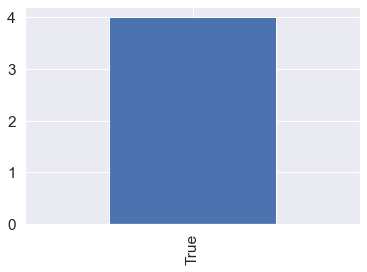

In [161]:
EU_train_res['own'].value_counts().plot(kind='bar')
EU_train_res['own'].value_counts()

In [162]:
EU_train_res[EU_train_res.own==True]

id                                            name  \
19  141                      Citizen Science Typologies   
20  142                 Introduction to Citizen Science   
21  143          Leading a ‘Train the Trainer’ workshop   
22  144  Designing for learning through citizen science   

                                             abstract  \
19  <p>This is a free course of 1.5 hours for anyo...   
20  <p>This is a free course of approximately 1.5 ...   
21  <p>This is a free course of 1.5 hours for citi...   
22  <p>This is a free course of two hours, that pr...   

                           authors  \
19  [{'id': 150, 'author': 'UCL'}]   
20  [{'id': 150, 'author': 'UCL'}]   
21  [{'id': 150, 'author': 'UCL'}]   
22  [{'id': 150, 'author': 'UCL'}]   

                                             audience  \
19  [{'id': 1, 'audience': 'Researchers & Academic...   
20           [{'id': 7, 'audience': 'ALL Audiences'}]   
21  [{'id': 1, 'audience': 'Researchers & Academic...   
22  [{'id': 4, 'audience': 'CS Project Leaders & I...   

                 dateUploaded  \
19 2021-01-20 10:33:01.103296   
20 2021-01-20 10:52:30.333084   
21 2021-01-20 10:58:26.374592   
22 2021-01-20 22:34:45.832865   

                                             keywords  \
19             [{'id': 924, 'keyword': 'typologies'}]   
20  [{'id': 7, 'keyword': 'Introduction'}, {'id': ...   
21               [{'id': 55, 'keyword': 'Knowledge'}]   
22  [{'id': 1, 'keyword': 'Educators'}, {'id': 2, ...   

                                             category publisher  \
19  {'id': 5, 'text': 'Interactive Resource (Websi...             
20  {'id': 5, 'text': 'Interactive Resource (Websi...             
21  {'id': 5, 'text': 'Interactive Resource (Websi...             
22  {'id': 5, 'text': 'Interactive Resource (Websi...             

    datePublished                                              theme  \
19            NaN             [{'id': 2, 'theme': 'Best practices'}]   
20            NaN         [{'id': 1, 'theme': 'Introduction to CS'}]   
21            NaN             [{'id': 2, 'theme': 'Best practices'}]   
22            NaN  [{'id': 1, 'theme': 'Introduction to CS'}, {'i...   

   inLanguage  featured   own  \
19         en      True  True   
20         en      True  True   
21         en      True  True   
22         en      True  True   

                                       abstract_clean  \
19  free cours hour anyon wish learn differ approa...   
20  free cours approxim hour citizen scienc practi...   
21  free cours hour citizen scienc practition look...   
22  free cours two hour provid introduct design de...   

                                 abstract_resultwords       abstract_list  \
19  [(classifi, 0.107), (quiz, 0.107), (typolog, 0...  [activity, course]   
20  [(li, 0.075), (ol, 0.064), (understand, 0.06),...            [course]   
21  [(ttt, 0.183), (trainer, 0.11), (train, 0.106)...  [activity, course]   
22  [(design, 0.084), (deliv, 0.079), (particip, 0...  [activity, course]   

      type authors_list                                      audience_list  \
19  course        [UCL]                          [Researchers & Academics]   
20  course        [UCL]                                    [ALL Audiences]   
21  course        [UCL]  [Researchers & Academics, CS Project Leaders &...   
22  course        [UCL]       [CS Project Leaders & Initiators, Educators]   

                                        keywords_list  \
19                                       [typologies]   
20   [Introduction, citizen science, Characteristics]   
21                                        [Knowledge]   
22  [Educators, Teachers, Design, primary, seconda...   

                                         themes_list  \
19                                  [Best practices]   
20                              [Introduction to CS]   
21                                  [Best practices]   
22  [Introduction to CS, Best practices, Engagement]   

 

### training resources linked with education

In [163]:
tr_education_dataframe=pd.DataFrame(columns=EU_train_res.columns)
educators_list=[]
all_audiences_list=[]
link_with_formal_list=[]
keywords_list=[]

EU_train_res["inEducation"]=False

education_keywords=['Educators', 'Teachers', 'Education', 'high school', 'school', 'secondary', 'primary']
school=["educat", "class", "school", "lesson", 'student', 'teacher']

for index, row in EU_train_res.iterrows():
    if "Educators" in row.audience_list:
        educators_list.append(row["id"])
        
    if "Link with formal education" in row.themes_list:
        link_with_formal_list.append(row["id"]) 
        
    if any(x in row.keywords_list for x in education_keywords):
        keywords_list.append(row["id"])    
        
    if "Educators" in row.audience_list or "Link with formal education" in row.themes_list or any(x in row.keywords_list for x in education_keywords):      
        tr_education_dataframe=tr_education_dataframe.append(row,ignore_index=True)
        EU_train_res.loc[index, "inEducation"]=True

In [164]:
print("Resources with Educators as audience: ",len(sorted(list(educators_list))))
print("Resources with link with formal education as theme: ", len(sorted(list(link_with_formal_list))))
print("Resources with any educational keyword: ", len(sorted(list(keywords_list))))
education_field=(sorted(list( set(educators_list) | set(link_with_formal_list) | set(keywords_list))))
print("In total, ", len(education_field), " out of ", len(EU_train_res) ,"resources have an educational keyword, audience or theme. ")


Resources with Educators as audience:  8
Resources with link with formal education as theme:  2
Resources with any educational keyword:  1
In total,  8  out of  25 resources have an educational keyword, audience or theme. 


In [165]:
resources_linked_with_formal_education =  pd.DataFrame(columns=['type_of_resource', 'id', 'name'])
for index, row in EU_train_res.iterrows():
    if row.inEducation==True:
        new_row = {'type_of_resource': 'training_resource' ,'id':row.id, 'name': row["name"]}
        resources_linked_with_formal_education = resources_linked_with_formal_education.append(new_row, ignore_index=True)
        #print(theme.get('theme'))
for index, row in EU_resources.iterrows():
    #if "Link with formal education" in row.themes_list:
    if row.inEducation==True:
        new_row = {'type_of_resource': 'resource' ,'id':row.id, 'name': row["name"]}
        resources_linked_with_formal_education = resources_linked_with_formal_education.append(new_row, ignore_index=True)
        #print(theme.get('theme'))

In [166]:
resources_linked_with_formal_education[:5]

type_of_resource   id                                               name
0  training_resource   99                     Open Science Training Handbook
1  training_resource  104  Californian Academy Sciences Citizen Science T...
2  training_resource  107  Australian Citizen Science Association Youtube...
3  training_resource  112          The Librarian's Guide to Citizen Science:
4  training_resource  124  Using Citizen Science Data in the Classroom (C...

In [167]:
with pd.ExcelWriter('EU_train_res.xlsx', options={'strings_to_urls': False}) as writer:
        EU_train_res.to_excel(writer, 'EU_train_res')
EU_train_res[:5]

id                                               name  \
0   32  Citizen Science and Scientific Crowdsourcing: ...   
1  101                         Citizen Science with GIS&T   
2   99                     Open Science Training Handbook   
3   39  Citizen Science Projects: How to Make a Differ...   
4  105    Natural History Museum Guide to Citizen Science   

                                            abstract  \
0  Formal university course on a variety of diffe...   
1  Citizen Science is defined as the participatio...   
2  Basic facts of CS (e.g., approach, law, ethics...   
3  "Would you like to understand the environment ...   
4  Guide to help design and implement a citizen s...   

                                             authors  \
0                     [{'id': 150, 'author': 'UCL'}]   
1  [{'id': 233, 'author': 'M Haklay'}, {'id': 296...   
2                                                 []   
3       [{'id': 160, 'author': 'WeObserve Project'}]   
4  [{'id': 2, 'author': 'J Tweddle'}, {'id': 3, '...   

                                            audience  \
0  [{'id': 1, 'audience': 'Researchers & Academic...   
1  [{'id': 1, 'audience': 'Researchers & Academic...   
2               [{'id': 2, 'audience': 'Educators'}]   
3           [{'id': 7, 'audience': 'ALL Audiences'}]   
4  [{'id': 1, 'audience': 'Researchers & Academic...   

                dateUploaded  \
0 2020-03-25 15:08:37.730245   
1 2020-09-08 08:32:59.265312   
2 2020-09-08 08:12:02.860362   
3 2020-03-26 11:05:30.520423   
4 2020-09-08 08:56:59.727372   

                                            keywords  \
0    [{'id': 70, 'keyword': 'general introduction'}]   
1  [{'id': 127, 'keyword': 'Volunteered Geographi...   
2                                                 []   
3  [{'id': 80, 'keyword': 'citizen science'}, {'i...   
4  [{'id': 6, 'keyword': 'Environment'}, {'id': 2...   

                                            category                publisher  \
0         {'id': 3, 'text': 'Event', 'parent': None}                      UCL   
1  {'id': 5, 'text': 'Interactive Resource (Websi...                    UCGIS   
2  {'id': 5, 'text': 'Interactive Resource (Websi...                    H2020   
3         {'id': 3, 'text': 'Event', 'parent': None}  WeObserve - FutureLearn   
4         {'id': 13, 'text': 'Report', 'parent': 12}   Natural History Museum   

   datePublished                                              theme  \
0         2018.0  [{'id': 6, 'theme': 'Co-creation'}, {'id': 19,...   
1         2019.0  [{'id': 16, 'theme': 'Evaluation of citizen sc...   
2            NaN         [{'id': 3, 'theme': 'Project management'}]   
3         2019.0  [{'id': 1, 'theme': 'Introduction to CS'}, {'i...   
4         2012.0             [{'id': 2, 'theme': 'Best practices'}]   

  inLanguage  featured   own  \
0         en     False  None   
1         en     False  None   
2         en     False  None   
3         en     False  None   
4         en     False  None   

                                      abstract_clean  \
0  formal univers cours varieti differ citizen sc...   
1  citizen scienc defin particip non profession v...   
2          basic fact cs e g approach law ethic data   
3  would like understand environ help creat chang...   
4  guid help design implement citizen scienc proj...   

                                abstract_resultwords abstract_list    type  \
0  [(registr, 0.18), (theori, 0.18), (topic, 0.18...      [course]  course   
1  [(local, 0.06), (may, 0.06), (decis, 0.04), (r...            []           
2  [(ethic, 0.281), (fact, 0.281), (approach, 0.2...            []           
3  [(find, 0.076), (environment, 0.076), (data, 0...      [course]  course   
4  [(biodivers, 0.212), (environ, 0.183), (implem...            []           

                                    authors_list  \
0                                          [UCL]   
1  [M Haklay, P Rickles, C Ellul, A Skarlatidou]   
2                          

## ANALYSING EUROPEAN ORGANISATIONS

In [168]:
OUTPUT_FILENAME = "./Data/european_data/EuropeanOrganisations.json"

with open(OUTPUT_FILENAME, 'r', encoding='utf-8') as f:
    organisations_dictionaries_list_european = json.load(f)
    
EU_organisations=pd.DataFrame.from_dict(organisations_dictionaries_list_european)

try:
    EU_organisations=EU_organisations.drop(columns=['url', 'logo'])
except:
    pass
EU_organisations[:5]

id                                               name  \
0   4  International Institute for Applied Systems An...   
1   6      Vetenskap & Allmänhet (VA – Public & Science)   
2   3                  Extreme Citizen Science (ExCiteS)   
3  82                                    British Library   
4  98                                         MountaiNow   

                                         description  \
0  The International Institute for Applied System...   
1  VA (Public & Science) is a Swedish non-profit ...   
2  Extreme Citizen Science (ExCiteS) is a situate...   
3  The British Library is the national library of...   
4  A live map of the latest mountain conditions a...   

                                 orgType      contactPoint  \
0  {'id': 2, 'type': 'Non-governmental'}      Dilek Fraisl   
1  {'id': 2, 'type': 'Non-governmental'}  Fredrik Brounéus   
2          {'id': 3, 'type': 'Academic'}       Muki Haklay   
3  {'id': 2, 'type': 'Non-governmental'}         Mia Ridge   
4     {'id': 5, 'type': 'Community-led'}  Alexia Massacand   

       contactPointEmail   latitude  longitude country  
0     fraisl@iiasa.ac.at  48.068272  16.358171      AT  
1         fredrik@v-a.se  59.335830  18.075792      SE  
2      excites@ucl.ac.uk  51.521421  -0.130674      GB  
3  digitalresearch@bl.uk  51.529877  -0.127720      GB  
4  divers@mountainow.net  46.521827   6.632702      CH

In [169]:
EU_organisations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 117 non-null    int64 
 1   name               117 non-null    object
 2   description        117 non-null    object
 3   orgType            117 non-null    object
 4   contactPoint       117 non-null    object
 5   contactPointEmail  117 non-null    object
 6   latitude           117 non-null    object
 7   longitude          117 non-null    object
 8   country            117 non-null    object
dtypes: int64(1), object(8)
memory usage: 8.4+ KB


In [170]:
print("In the projects information there are", len(df_main_organisations_e), " main organisations. \n")
print("In the projects information there are", len(df_organisations_e), " organisations. \n")
print("In the organisations section there are", len(EU_organisations), " organisations. \n")

a=0            
for index, row in EU_organisations.iterrows():
    for index_2, row_2 in df_main_organisations_e.iterrows():
        if row["id"]==row_2["id"]:
            a=a+1
print(a,"out of ", len(df_main_organisations_e), " main organisations of projects are included in the organisations section.\n")
b=0            
for index, row in EU_organisations.iterrows():
    for index_2, row_2 in df_organisations_e.iterrows():
        if row["id"]==row_2["id"]:
            b=b+1
print(b,"out of ", len(df_organisations_e), " organisations of projects are included in the organisations section.\n")


print("Therefore all organisations related to the projects appear in the organisations section of the platform, as expected.")

In the projects information there are 43  main organisations. 

In the projects information there are 33  organisations. 

In the organisations section there are 117  organisations. 

43 out of  43  main organisations of projects are included in the organisations section.

33 out of  33  organisations of projects are included in the organisations section.

Therefore all organisations related to the projects appear in the organisations section of the platform, as expected.


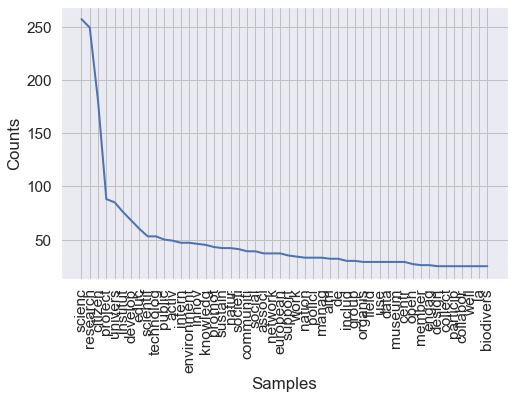


The vocabulary is composed by 117 words 



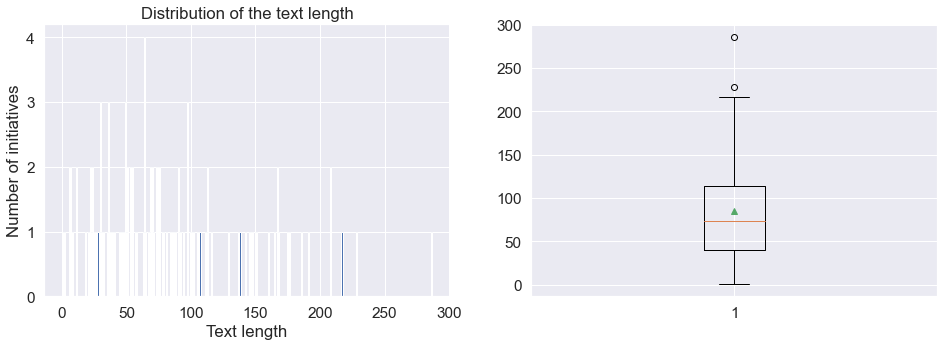

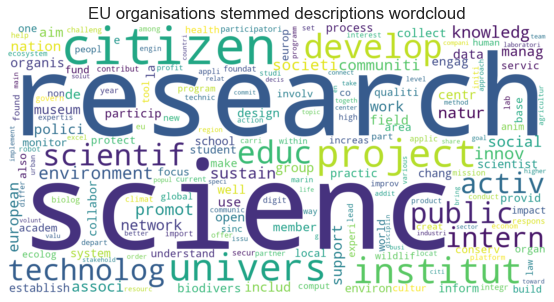

[('scienc', 257),
 ('research', 249),
 ('citizen', 180),
 ('project', 88),
 ('univers', 85)]

In [171]:
EU_organisations['description_clean'] = EU_organisations.description.apply(lambda text: clean_text(text))
# Get the nltk.Text object
description_tokens = convert_to_nltk_text(EU_organisations, "description_clean")
description_std_tokens = standardize_text(description_tokens, "english")
EU_organisations['description_clean'] = EU_organisations.description_clean.apply(lambda text: standardize_text(text, "english"))

plt.figure(figsize = (8,5))
nltk.FreqDist(description_std_tokens).plot(50)

plot_text_length_distribution(dataset = EU_organisations,
                              text_field = 'description_clean')

bag_of_words_description, stemmed_description=get_bagofwords(EU_organisations, "description", "english")
plot_wordcloud("EU organisations stemmed descriptions wordcloud", stemmed_description)

sorted(stemmed_description.items(), key= lambda x: x[1], reverse=True)[:5]

In [172]:
tfidfs = []
EU_organisations["description_resultwords"]=np.empty((len(EU_organisations), 0)).tolist()
document_size=len(EU_organisations)
# calculate tf
for index, row in EU_organisations.iterrows():
    tfidf = TFIDF(row["description_clean"])
    tfidf.tf()
    tfidfs.append(tfidf)
# calculate idf

all_text = [tfidf.text for tfidf in tfidfs]
    
for i, tfidf in enumerate(tfidfs):
    tfidf.idf(all_text, document_size)
    tfidf.tf_idf()
    result_df = tfidf.text_df.sort_values('tfidf', ascending=False).head(5)  # sort and take top 5
    result_words = []
    for index, row in result_df.iterrows():
        result_words.append((row.word, row.tfidf))
        EU_organisations.loc[i, "description_resultwords"].append((row.word, row.tfidf))
    '''print(i)
    print(tfidf.data, result_words)'''


In [173]:
EU_organisations['education']=False
EU_organisations['university']=False

education=["educat", "school", "class", "student", "teacher"]
uni=["universit"]
for index, row in EU_organisations.iterrows():
    if any(x.lower() in row['description'].lower() for x in education):
        EU_organisations.loc[index, "education"]=True
    if any(x.lower() in row['description'].lower() for x in uni):
        EU_organisations.loc[index, "university"]=True


In [174]:
print("The words educat(e/ion), school, class or student appear in ", len(EU_organisations[EU_organisations.education==True]), " organisations.\n")
print("The word university appears in ", len(EU_organisations[EU_organisations.university==True]), " organisations.\n")
print("Total of organisations related to education: ", len(EU_organisations[(EU_organisations.university==True) | (EU_organisations.education==True)]), ".\n")

The words educat(e/ion), school, class or student appear in  52  organisations.

The word university appears in  43  organisations.

Total of organisations related to education:  68 .



In [179]:
print("Contact points: ")
print(EU_organisations.contactPoint.value_counts()[:5])
print("\nContact point emails: ")
print(EU_organisations.contactPointEmail.value_counts()[:5])

Contact points: 
Daniel Dörler and Florian Heigl    2
Matthijs Begheyn                   2
OSDG                               1
Kertu Hool                         1
Marit Bogert                       1
Name: contactPoint, dtype: int64

Contact point emails: 
begheyn@strw.leidenuniv.nl    2
patricia@casaciencias.org     1
info@inbo.be                  1
sherson@mgmt.au.dk            1
l.mckittrick@epa.ie           1
Name: contactPointEmail, dtype: int64


In [180]:
EU_organisations[EU_organisations.contactPoint=='Daniel Dörler and Florian Heigl']

id                                               name  \
8   12                    Citizen Science Network Austria   
84  49  University of Natural Resources and Life Scien...   

                                          description  \
8   The Citizen Science Network Austria, coordinat...   
84  BOKU is one of the best universities for susta...   

                            orgType                     contactPoint  \
8   {'id': 6, 'type': 'Consortium'}  Daniel Dörler and Florian Heigl   
84    {'id': 3, 'type': 'Academic'}  Daniel Dörler and Florian Heigl   

                                    contactPointEmail   latitude  longitude  \
8                           office@citizen-science.at  48.236561  16.337509   
84  daniel.doerler@boku.ac.at, florian.heigl@boku....  48.236561  16.337509   

   country                                  description_clean  \
8       AT  citizen scienc network austria coordin univers...   
84      AT  boku one best univers sustain europ bring toge...   

                              description_resultwords  education  university  
8   [(austria, 0.264), (strengthen, 0.088), (citiz...       True        True  
84  [(boku, 0.377), (econom, 0.084), (sustain, 0.0...       True        True

In [181]:
EU_organisations[EU_organisations.contactPoint=='Matthijs Begheyn']

id                                    name  \
14  16  Citizen Science Lab, Leiden University   
18  19                       Leiden University   

                                          description  \
14  The Citizen Science Lab brings together resear...   
18  Leiden University is one of Europe’s leading i...   

                          orgType      contactPoint  \
14  {'id': 3, 'type': 'Academic'}  Matthijs Begheyn   
18  {'id': 3, 'type': 'Academic'}  Matthijs Begheyn   

             contactPointEmail   latitude longitude country  \
14  begheyn@strw.leidenuniv.nl  52.169037  4.458506      NL   
18  begheyn@strw.leidenuniv.nl  52.156635  4.486740      NL   

                                    description_clean  \
14  citizen scienc lab bring togeth research citiz...   
18  leiden univers one europ lead intern research ...   

                              description_resultwords  education  university  
14  [(lab, 0.143), (air, 0.093), (togeth, 0.093), ...      False        True  
18  [(leiden, 0.422), (lead, 0.257), (univers, 0.2...      False        True

<Figure size 432x288 with 0 Axes>

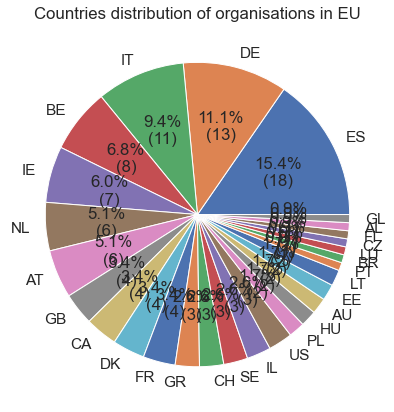

In [182]:
plot_pie(EU_organisations, "country", "Countries distribution of organisations in EU")

In [183]:
EU_organisations['type_']=np.nan

for index, row in EU_organisations.iterrows():
    #print(EU_organisations.loc[index,['type_']])
    try:
        EU_organisations.loc[index,['type_']]=row["orgType"]["type"]
    except:
        EU_organisations.loc[index,['type_']]=None

In [184]:
df_types_o = pd.DataFrame(columns=['id', 'orgType', 'num_times_appears'])

for index, row in EU_organisations.iterrows():
    try:
        if row.orgType.get("id") not in df_types_o['id'].unique():
            new_row = {'id':row.orgType.get("id"), 'orgType':row.orgType.get('type'), 'num_times_appears':1}        
            df_types_o = df_types_o.append(new_row, ignore_index=True)
        else:
            index_ = df_types_o.index[df_types_o['id'] == row.orgType.get("id")]
            df_types_o.loc[index_,'num_times_appears'] = df_types_o.loc[index_,'num_times_appears']  +1 
        
    except:
        pass
    

In [185]:
df_types_o = df_types_o.sort_values(by=['num_times_appears'], ascending=False)
df_types_o

id           orgType num_times_appears
1  3          Academic                52
0  2  Non-governmental                30
5  4    Private sector                14
4  1      Governmental                13
2  5     Community-led                 4
3  6        Consortium                 4

In [186]:
EU_organisations=EU_organisations.drop(columns=["orgType"])

In [187]:
EU_organisations[EU_organisations["type_"]=="Academic"][:5]

id                                               name  \
2    3                  Extreme Citizen Science (ExCiteS)   
6    8                         Mykolas Romeris University   
7   10               Aristotle University of Thessaloniki   
10  43   GEOlab (Geomatics and Earth Observation labor...   
14  16             Citizen Science Lab, Leiden University   

                                          description            contactPoint  \
2   Extreme Citizen Science (ExCiteS) is a situate...             Muki Haklay   
6   As the leading university in social sciences a...       Monika Mačiulienė   
7   Aristotle University of Thessaloniki (AUTh) is...   Prof. Kostas Karatzas   
10  GEOlab is a multidisciplinary research laborat...  Maria Antonia Brovelli   
14  The Citizen Science Lab brings together resear...        Matthijs Begheyn   

             contactPointEmail   latitude  longitude country  \
2            excites@ucl.ac.uk  51.521421  -0.130674      GB   
6          maciuliene@mruni.eu  54.737200  25.263280      LT   
7                kkara@auth.gr  40.626852  22.961294      GR   
10    maria.brovelli@polimi.it  45.478519   9.227486      IT   
14  begheyn@strw.leidenuniv.nl  52.169037   4.458506      NL   

                                    description_clean  \
2   extrem citizen scienc excit situat bottom prac...   
6   lead univers social scienc interdisciplinari r...   
7   aristotl univers thessaloniki auth situat cent...   
10  geolab multidisciplinari research laboratori a...   
14  citizen scienc lab bring togeth research citiz...   

                              description_resultwords  education  university  \
2   [(excit, 0.049), (analys, 0.049), (extrem, 0.0...      False       False   
6   [(mru, 0.18), (employ, 0.06), (social, 0.055),...       True        True   
7   [(auth, 0.11), (engin, 0.077), (mechan, 0.068)...       True        True   
10  [(geolab, 0.116), (milano, 0.116), (manipul, 0...      False       False   
14  [(lab, 0.143), (air, 0.093), (togeth, 0.093), ...      False        True   

       type_  
2   Academic  
6   Academic  
7   Academic  
10  Academic  
14  Academic

In [188]:
EU_organisations["longitude"]=EU_organisations["longitude"].astype(float)
EU_organisations["latitude"]=EU_organisations["latitude"].astype(float)

In [189]:
with pd.ExcelWriter('EU_organisations.xlsx', options={'strings_to_urls': False}) as writer:
        EU_organisations.to_excel(writer, 'EU_organisations')
EU_organisations[:5]

id                                               name  \
0   4  International Institute for Applied Systems An...   
1   6      Vetenskap & Allmänhet (VA – Public & Science)   
2   3                  Extreme Citizen Science (ExCiteS)   
3  82                                    British Library   
4  98                                         MountaiNow   

                                         description      contactPoint  \
0  The International Institute for Applied System...      Dilek Fraisl   
1  VA (Public & Science) is a Swedish non-profit ...  Fredrik Brounéus   
2  Extreme Citizen Science (ExCiteS) is a situate...       Muki Haklay   
3  The British Library is the national library of...         Mia Ridge   
4  A live map of the latest mountain conditions a...  Alexia Massacand   

       contactPointEmail   latitude  longitude country  \
0     fraisl@iiasa.ac.at  48.068272  16.358171      AT   
1         fredrik@v-a.se  59.335830  18.075792      SE   
2      excites@ucl.ac.uk  51.521421  -0.130674      GB   
3  digitalresearch@bl.uk  51.529877  -0.127720      GB   
4  divers@mountainow.net  46.521827   6.632702      CH   

                                   description_clean  \
0  intern institut appli system analysi iiasa ind...   
1  va public scienc swedish non profit membership...   
2  extrem citizen scienc excit situat bottom prac...   
3        british librari nation librari unit kingdom   
4  live map latest mountain condit hazard mountai...   

                             description_resultwords  education  university  \
0  [(iiasa, 0.187), (countri, 0.093), (council, 0...      False       False   
1  [(va, 0.209), (swedish, 0.209), (grant, 0.173)...       True        True   
2  [(excit, 0.049), (analys, 0.049), (extrem, 0.0...      False       False   
3  [(librari, 0.894), (british, 0.678), (kingdom,...      False       False   
4  [(mountainow, 0.271), (mountain, 0.271), (live...      False       False   

              type_  
0  Non-governmental  
1  Non-governmental  
2          Academic  
3  Non-governmental  
4     Community-led

#  RELATE AMONG THEM

### PROJECTS AND ORGANISATIONS

In [190]:
print("In the projects information there are", len(df_main_organisations_e), " main organisations. ")
print("In the projects information there are", len(df_organisations_e), " organisations. ")
print("In the organisations section there are", len(EU_organisations), " organisations. ")

#Find project main organisations that are included in the organisations section.
main_orgs=[]
for index, row in EU_organisations.iterrows():
    for index_2, row_2 in df_main_organisations_e.iterrows():
        if row["id"]==row_2["id"]:
            main_orgs.append(row["id"])
print(len(main_orgs),"out of ", len(df_main_organisations_e), " main organisations of projects are included in the organisations section.")

#Find project organisations that are included in the organisations section.
orgs=[]
for index, row in EU_organisations.iterrows():
    for index_2, row_2 in df_organisations_e.iterrows():
        if row["id"]==row_2["id"]:
            orgs.append(row["id"])
print(len(orgs),"out of ", len(df_organisations_e), " organisations of projects are included in the organisations section.")

total_orgs=sorted(list(set(main_orgs) | set(orgs)))
resting= len(EU_organisations)-len(total_orgs)
print("Therefore all organisations related to the projects appear in the organisations section of the platform, as expected.")
print("And from the ", len(EU_organisations), " organisations, ", len(total_orgs), " do appear in projects while ", (resting), " do not. ")

In the projects information there are 43  main organisations. 
In the projects information there are 33  organisations. 
In the organisations section there are 117  organisations. 
43 out of  43  main organisations of projects are included in the organisations section.
33 out of  33  organisations of projects are included in the organisations section.
Therefore all organisations related to the projects appear in the organisations section of the platform, as expected.
And from the  117  organisations,  67  do appear in projects while  50  do not. 


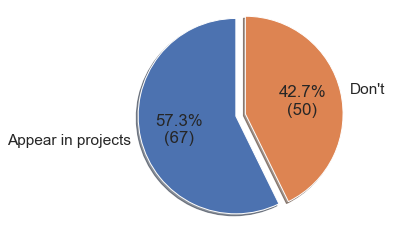

In [191]:
labels="Appear in projects", "Don't"
sizes=[len(total_orgs), resting]
explode=(0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## JOIN RESOURCES AND TRAINING RESOURCES, and relate them to projects if they are connected

First Create a column named clean_name which gets the real name of the projects, by splitting if they contain puntctuaction marks. 

In [193]:
EU_projects["clean_name"]=""
for index, row in EU_projects.iterrows():
    if(len(row["name"].split(" "))==1):
        EU_projects.loc[index, 'clean_name'] = row["name"]
    else:
        EU_projects.loc[index, 'clean_name']=row["name"]
EU_projects

for index, row in EU_projects.iterrows():
    if ":" in row["clean_name"]:
        EU_projects.loc[index, 'clean_name'] = row["clean_name"].split(":")[0]
        #print(row["clean_name"].split(":")[0])
        
    if " -" in row["clean_name"]:
        EU_projects.loc[index, 'clean_name'] = row["clean_name"].split(" -")[0]
        #print(row["clean_name"].split(" -")[0])
        
    if " (" in row["clean_name"]:
        EU_projects.loc[index, 'clean_name'] = row["clean_name"].split(" (")[0]
        #print(row["clean_name"].split(" -")[0])
        
    elif " -" in row["clean_name"]:
        EU_projects.loc[index, 'clean_name'] = row["clean_name"].split(" -")[0]
        #print(row["clean_name"].split(" -"))
    #row_resource.astype(str).str.contains(row["name"]).any():
#to see the projects dataframe with the new column clean_name
EU_projects[:5]

id                                   name  \
0  184                             Vespawatch   
1  185                   Looking for Cowslips   
2    2                The Ladybird Experiment   
3  226  MammalNet: Watch Wildlife for Science   
4   48                               GripeNet   

                                                 url  \
0                             https://vespawatch.be/   
1                                    www.cowslips.eu   
2  https://forskarfredag.se/forskarfredags-massex...   
3                                      mammalnet.com   
4                            http://www.gripenet.pt/   

                                                 aim  \
0  <p>Vespawatch targets beekeepers and the publi...   
1  <p>The aim of the project is to examine the pa...   
2  <p><span class="freebirdFormviewerViewItemsIte...   
3  <ul>\r\n\t<li>&nbsp;&nbsp;&nbsp; To engage cit...   
4  Ajude-nos a monitorizar a epidemia da gripe, e...   

                                         description  \
0  <p>Vespawatch target beekeepers, the public an...   
1  <p>Participants are expected to observe the pa...   
2  <p>Humans are affecting nature in different wa...   
3  <p><strong>MammalNe</strong>t is a partnership...   
4  A ideia de monitorizar a epidemia sazonal de g...   

                                    howToParticipate  \
0  <p>Everyone can help track the Asian hornet in...   
1  <p>Instructions to participate are available o...   
2                                                      
3  <ul>\r\n\t<li>Collecting and sharing the prese...   
4  Ajude-nos a monitorizar a epidemia da gripe, e...   

                                           equipment  \
0         <p>No specific equipment required.</p>\r\n   
1  <p>Recommended: smartphone with internet conne...   
2                                                      
3  <ul>\r\n\t<li>\r\n\t<p>To participate as an ob...   
4                                                      

                                            keywords  \
0  [{'id': 3, 'keyword': 'Biodiversity'}, {'id': ...   
1             [{'id': 3, 'keyword': 'Biodiversity'}]   
2  [{'id': 4, 'keyword': 'Artificial Intelligence...   
3                                                 []   
4  [{'id': 105, 'keyword': 'Influenza'}, {'id': 5...   

                                               topic start_date   end_date  \
0  [{'id': 2, 'topic': 'Animals'}, {'id': 5, 'top... 2018-02-01        NaT   
1                                                 [] 2021-03-15 2021-06-15   
2  [{'id': 5, 'topic': 'Biodiversity'}, {'id': 8,... 2018-06-01 2018-09-30   
3  [{'id': 1, 'topic': 'Agriculture & Veterinary ...        NaT        NaT   
4         [{'id': 17, 'topic': 'Health & Medicine'}]        NaT        NaT   

                 dateCreated                                      status  \
0 2020-12-18 17:22:29.027278               {'id': 2, 'status': 'Active'}   
1 2021-02-08 13:04:33.184447  {'id': 3, 'status': 'Periodically active'}   
2 2020-03-24 06:01:37.419226            {'id': 5, 'status': 'Completed'}   
3 2021-03-03 14:16:49.394339               {'id': 2, 'status': 'Active'}   
4 2020-04-06 13:07:59.357393               {'id': 2, 'status': 'Active'}   

                                               host  \
0                                              None   
1                                              None   
2                             VA (Public & Science)   
3                                              None   
4  Instituto Nacional de Saúde Doutor Ricardo Jorge   

                                    mainOrganisation  \
0  {'id': 66, 'dateCreated': '2020-11-18T08:11:14...   
1  {'id': 67, 'dateCreated': '2020-11-18T16:11:09...   
2                                               None   
3  {'id': 75, 'dateCreated': '2020-11-25T12:44:06...   
4                                               None   

                                        organisation  \
0                                    

Then mix all resources and look for each one if they contain any project name. 

In [194]:
mixed_resources =  pd.DataFrame(columns=EU_train_res.columns)
for index, row in EU_train_res.iterrows():
    
    new_row = {'type_of_resource': 'training_resource' ,'id':row.id, 'name': row["name"], 'abstract': row.abstract, 'abstract_clean': row.abstract_clean, "abstract_resultwords": row.abstract_resultwords, "type": row.type,  'dateUploaded': row.dateUploaded, 'publisher': row.publisher, 'datePublished': row.datePublished, 'inLanguage': row.inLanguage, 'featured': row.featured, 'own': row.own, 'authors_list': row.authors_list, 'audience_list': row.audience_list, 'keywords_list': row.keywords_list, 'themes_list': row.themes_list, 'category_': row.category_, 'inEducation': row.inEducation}
    mixed_resources = mixed_resources.append(new_row, ignore_index=True)
        #print(theme.get('theme'))
for index, row in EU_resources.iterrows():
    #if "Link with formal education" in row.themes_list:
    new_row = {'type_of_resource': 'resource' ,'id':row.id, 'name': row["name"], 'abstract': row.abstract, 'abstract_clean': row.abstract_clean, "abstract_resultwords": row.abstract_resultwords, "type": row.type,  'dateUploaded': row.dateUploaded, 'publisher': row.publisher, 'datePublished': row.datePublished, 'inLanguage': row.inLanguage, 'featured': row.featured, 'own': "None", 'authors_list': row.authors_list, 'audience_list': row.audience_list, 'keywords_list': row.keywords_list, 'themes_list': row.themes_list, 'category_': row.category_, 'inEducation': row.inEducation}
    mixed_resources = mixed_resources.append(new_row, ignore_index=True)

In [195]:
mixed_resources=mixed_resources.reset_index(drop=True)
mixed_resources[:5]

id                                               name  \
0   32  Citizen Science and Scientific Crowdsourcing: ...   
1  101                         Citizen Science with GIS&T   
2   99                     Open Science Training Handbook   
3   39  Citizen Science Projects: How to Make a Differ...   
4  105    Natural History Museum Guide to Citizen Science   

                                            abstract  authors  audience  \
0  Formal university course on a variety of diffe...      NaN       NaN   
1  Citizen Science is defined as the participatio...      NaN       NaN   
2  Basic facts of CS (e.g., approach, law, ethics...      NaN       NaN   
3  "Would you like to understand the environment ...      NaN       NaN   
4  Guide to help design and implement a citizen s...      NaN       NaN   

                dateUploaded  keywords  category                publisher  \
0 2020-03-25 15:08:37.730245       NaN       NaN                      UCL   
1 2020-09-08 08:32:59.265312       NaN       NaN                    UCGIS   
2 2020-09-08 08:12:02.860362       NaN       NaN                    H2020   
3 2020-03-26 11:05:30.520423       NaN       NaN  WeObserve - FutureLearn   
4 2020-09-08 08:56:59.727372       NaN       NaN   Natural History Museum   

   datePublished  theme inLanguage featured   own  \
0         2018.0    NaN         en    False  None   
1         2019.0    NaN         en    False  None   
2            NaN    NaN         en    False  None   
3         2019.0    NaN         en    False  None   
4         2012.0    NaN         en    False  None   

                                      abstract_clean  \
0  formal univers cours varieti differ citizen sc...   
1  citizen scienc defin particip non profession v...   
2          basic fact cs e g approach law ethic data   
3  would like understand environ help creat chang...   
4  guid help design implement citizen scienc proj...   

                                abstract_resultwords  abstract_list    type  \
0  [(registr, 0.18), (theori, 0.18), (topic, 0.18...            NaN  course   
1  [(local, 0.06), (may, 0.06), (decis, 0.04), (r...            NaN           
2  [(ethic, 0.281), (fact, 0.281), (approach, 0.2...            NaN           
3  [(find, 0.076), (environment, 0.076), (data, 0...            NaN  course   
4  [(biodivers, 0.212), (environ, 0.183), (implem...            NaN           

                                    authors_list  \
0                                          [UCL]   
1  [M Haklay, P Rickles, C Ellul, A Skarlatidou]   
2                                             []   
3                            [WeObserve Project]   
4       [J Tweddle, L Robinson, H Roy, M Pocock]   

                                       audience_list  \
0                          [Researchers & Academics]   
1                          [Researchers & Academics]   
2                                        [Educators]   
3                                    [ALL Audiences]   
4  [Researchers & Academics, Policy & Decision Ma...   

                                       keywords_list  \
0                             [general introduction]   
1  [Volunteered Geographic Information, Geographi...   
2                                                 []   
3  [citizen science, Citizen observatories, data,...   
4             [Environment, Biodiversity, Guideline]   

                                         themes_list  \
0  [Co-creation, Reflections on science, Research...   
1  [Evaluation of citizen science, Research desig...   
2                               [Project management]   
3  [Introduction to CS, Best practices, Engagemen...   
4                                   [Best practices]   

                        category_ inEducation   type_of_resource  
0                           Event       False  training_resource  
1  Interactive Resource (Website)       False  training_resource  
2  Interactive Resource (Website)        True  training_resource  


In [197]:
pd.options.display.max_colwidth=100
resources_relatedToProjects=pd.DataFrame(columns=mixed_resources.columns)
resources_relatedToProjects["related_Project"]=""
mixed_resources["related_Initiative"]=""
for index, row in EU_projects.iterrows():
    for index_resource, row_resource in mixed_resources.iterrows():
        if row_resource.astype(str).str.contains(row["clean_name"]).any():
            '''print(row["clean_name"], "\n")
            print(row_resource.astype(str).str.contains(row["clean_name"]))'''
            if row_resource["id"] not in resources_relatedToProjects["id"].unique():
                resources_relatedToProjects=resources_relatedToProjects.append(row_resource)
                index_ = resources_relatedToProjects.index[resources_relatedToProjects['id'] == row_resource['id']]
                resources_relatedToProjects.loc[index_, 'related_Project'] = row["clean_name"]
                mixed_resources.loc[index_resource, 'related_Initiative'] = row["clean_name"]
            else:
                index_ = resources_relatedToProjects.index[resources_relatedToProjects['id'] == row_resource['id']]
                resources_relatedToProjects.loc[index_, 'related_Project2'] = row["clean_name"]
            
            '''print(row["clean_name"], "\n")
            print(row_resource, "\n \n")'''


In [198]:
print("There are ", len(resources_relatedToProjects), " resources and training resources that are related to projects.")
print("From those, ", len(resources_relatedToProjects[resources_relatedToProjects["type_of_resource"]=="training_resource"]), "are training resources and ", len(resources_relatedToProjects[resources_relatedToProjects["type_of_resource"]=="resource"]), " are normal resources. ")
#List to see the projects that have resources linked with them. 
mixed_resources.related_Initiative.value_counts()

There are  18  resources and training resources that are related to projects.
From those,  2 are training resources and  16  are normal resources. 


                       113
D-NOSES                  5
WeObserve                4
EU-Citizen.Science       2
eBird                    1
ScienceAtHome            1
Vigilantes del aire      1
iSpot                    1
Cities at night          1
FotoQuest Go             1
Sensing for Justice      1
Name: related_Initiative, dtype: int64

In [199]:
with pd.ExcelWriter('mixed_resources.xlsx', options={'strings_to_urls': False}) as writer:
        mixed_resources.to_excel(writer, 'mixed_resources')
mixed_resources[:5]

id                                                           name  \
0   32  Citizen Science and Scientific Crowdsourcing: an Introduction   
1  101                                     Citizen Science with GIS&T   
2   99                                 Open Science Training Handbook   
3   39             Citizen Science Projects: How to Make a Difference   
4  105                Natural History Museum Guide to Citizen Science   

                                                                                              abstract  \
0  Formal university course on a variety of different citizen science topics from theory to practic...   
1  Citizen Science is defined as the participation of non-professional volunteers in scientific pro...   
2                                                Basic facts of CS (e.g., approach, law, ethics, data)   
3  "Would you like to understand the environment and help create change? A citizen science project ...   
4  Guide to help design and implement a citizen science project relating to biodiversity or the env...   

   authors  audience               dateUploaded  keywords  category  \
0      NaN       NaN 2020-03-25 15:08:37.730245       NaN       NaN   
1      NaN       NaN 2020-09-08 08:32:59.265312       NaN       NaN   
2      NaN       NaN 2020-09-08 08:12:02.860362       NaN       NaN   
3      NaN       NaN 2020-03-26 11:05:30.520423       NaN       NaN   
4      NaN       NaN 2020-09-08 08:56:59.727372       NaN       NaN   

                 publisher  datePublished  theme inLanguage featured   own  \
0                      UCL         2018.0    NaN         en    False  None   
1                    UCGIS         2019.0    NaN         en    False  None   
2                    H2020            NaN    NaN         en    False  None   
3  WeObserve - FutureLearn         2019.0    NaN         en    False  None   
4   Natural History Museum         2012.0    NaN         en    False  None   

                                                                                        abstract_clean  \
0  formal univers cours varieti differ citizen scienc topic theori practic citizen scienc requir re...   
1  citizen scienc defin particip non profession volunt scientif project dickson et al experienc rap...   
2                                                            basic fact cs e g approach law ethic data   
3  would like understand environ help creat chang citizen scienc project observatori ideal way expl...   
4                            guid help design implement citizen scienc project relat biodivers environ   

                                                                        abstract_resultwords  \
0         [(registr, 0.18), (theori, 0.18), (topic, 0.18), (varieti, 0.18), (formal, 0.151)]   
1                   [(local, 0.06), (may, 0.06), (decis, 0.04), (record, 0.04), (gis, 0.04)]   
2                 [(ethic, 0.281), (fact, 0.281), (approach, 0.236), (e, 0.236), (g, 0.236)]   
3    [(find, 0.076), (environment, 0.076), (data, 0.051), (collect, 0.051), (action, 0.045)]   
4  [(biodivers, 0.212), (environ, 0.183), (implement, 0.183), (relat, 0.183), (guid, 0.143)]   

   abstract_list    type                                   authors_list  \
0            NaN  course                                          [UCL]   
1            NaN          [M Haklay, P Rickles, C Ellul, A Skarlatidou]   
2            NaN                                                     []   
3            NaN  course                            [WeObserve Project]   
4            NaN               [J Tweddle, L Robinson, H Roy, M Pocock]   

                                         audience_list  \
0                            [Researchers & Academics]   
1                            [Researchers & Academics]   
2                                          [Educators]   
3                                      [ALL Audiences]   
4  [Researchers & Academics, Policy & Decision Makers]   

                  

### RESOURCES AND ORGANISATIONS

We also create the column real_name for the organisations, doing the same as with projects. 

In [200]:
EU_organisations["clean_name"]=""
for index, row in EU_organisations.iterrows():
    if(len(row["name"].split(" "))==1):
        EU_organisations.loc[index, 'clean_name'] = row["name"]
    else:
        EU_organisations.loc[index, 'clean_name']=row["name"]
EU_organisations

for index, row in EU_organisations.iterrows():
    if ":" in row["clean_name"]:
        EU_organisations.loc[index, 'clean_name'] = row["clean_name"].split(":")[0]
        #print(row["clean_name"].split(":")[0])
        
    if " -" in row["clean_name"]:
        EU_organisations.loc[index, 'clean_name'] = row["clean_name"].split(" -")[0]
        #print(row["clean_name"].split(" -")[0])
        
    if " (" in row["clean_name"]:
        EU_organisations.loc[index, 'clean_name'] = row["clean_name"].split(" (")[0]
        #print(row["clean_name"].split(" -")[0])
        
    elif "-" in row["clean_name"]:
        #two exceptions
        if row["clean_name"].split("-")[0]==" Bar" or row["clean_name"].split("-")[0]=="European":
            EU_organisations.loc[index, 'clean_name']=row["clean_name"]
        else:
            EU_organisations.loc[index, 'clean_name'] = row["clean_name"].split("-")[0]
    #row_resource.astype(str).str.contains(row["name"]).any():
#EU_organisations

In [201]:
pd.options.display.max_colwidth=1000
resources_relatedToOrganisations=pd.DataFrame(columns=mixed_resources.columns)
resources_relatedToOrganisations["related_Organisation"]=""
mixed_resources["related_Organisation"]=""

for index, row in EU_organisations.iterrows():
    for index_resource, row_resource in mixed_resources.iterrows():
        if row_resource.astype(str).str.contains(row["clean_name"]).any():
            '''print(row["clean_name"], "\n")            
            print(row_resource.astype(str).str.contains(row["clean_name"]))'''
            if row_resource["id"] not in resources_relatedToOrganisations["id"].unique():
                resources_relatedToOrganisations=resources_relatedToOrganisations.append(row_resource)
                index_ = resources_relatedToOrganisations.index[resources_relatedToOrganisations['id'] == row_resource['id']]
                resources_relatedToOrganisations.loc[index_, 'related_Organisation'] = row["clean_name"]
                mixed_resources.loc[index_resource, 'related_Organisation'] = row["clean_name"]
            else:
                index_ = resources_relatedToOrganisations.index[resources_relatedToOrganisations['id'] == row_resource['id']]
                resources_relatedToOrganisations.loc[index_, 'related_Organisation2'] = row["clean_name"]
            
            '''print(row["clean_name"], "\n")
            print(row_resource, "\n \n")'''


In [202]:
resources_relatedToOrganisations[:5]

id  \
33    73   
37   140   
58    34   
76    72   
124   27   

                                                                                                                         name  \
33                                                                Bioblitz in Leopold Park (Brussels) - June 02 2018 - REPORT   
37   Scaling up Citizen Science: What are the factors associated with increased reach and how to lever them to achieve impact   
58                                                                                                               geo-wiki.org   
76                                                                 Bioblitz in Leopold Park (Brussels) - May 25 2019 - REPORT   
124                                                      Citizen science and the United Nations Sustainable Development Goals   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    abstract  \
33                                                                                                                                                                                                                                                                                                                               Here is the report of a BioBlitz that took place in Brussels in 2018. “BioBlitz Leopold Park” is a follow-up of how biodiversity has changed –and hopefully increased– in a park located in the heart of Brussels, since the revegetation of the pond and set up of a flowery meadow in 2015. After a short introduction on sampling techniques and insect ecology, 20 citizens were invited to collect insects at the bank of the pond, in the meadow, and in other locations of the park. This participatory event aimed at raising citizens awareness about biodiversity in the city. The material to be used for the observation and identification of the specimens were provided by the Museum staff.   
37   The rapid pace of technology advancements, the open innovation paradigm, and the ubiquity of high-speed connectivity, greatly facilitate access to information to individuals, increasing their opportunities to achieve greater emancipation and empowerment. This provides new opportunities for widening participation in scientific research and policy, thus opening a myriad of avenues driving a paradigm shift across fields and disciplines, including the strengthening of Citizen Science. Nowadays, the application of Citizen Science principles spans across several scientific disciplines, covering different geographical scales. While the interdisciplinary approach taken so far has shown significant results and findings, the current situation depicts a wide range of projects that are heavily context-dependent and where the learning outcomes of pilots are very much situated within the specific areas in which these projects are implemented. There is little evidence on how to foster the spread ...   
58   The Geo-Wiki platform provides citizens with the means to engage in environmental monitoring of the earth by providing feedback o

In [203]:
print("There are ", len(resources_relatedToOrganisations), " resources and training resources that are related to organisations.")
print("From those, ", len(resources_relatedToOrganisations[resources_relatedToOrganisations["type_of_resource"]=="training_resource"]), "are training resources and ", len(resources_relatedToOrganisations[resources_relatedToOrganisations["type_of_resource"]=="resource"]), " are normal resources. ")
#List to see the organisations that have resources linked with them. 
resources_relatedToOrganisations.related_Organisation.value_counts()[:5]

There are  41  resources and training resources that are related to organisations.
From those,  4 are training resources and  37  are normal resources. 


Citizen Science Network Austria                         7
Citizen Science Association                             5
International Institute for Applied Systems Analysis    5
Ibercivis Foundation                                    4
SciStarter                                              4
Name: related_Organisation, dtype: int64

In [204]:
#EXPORT TO EXCEL
with pd.ExcelWriter('EU_projects.xlsx', options={'strings_to_urls': False}) as writer:
        mixed_resources.to_excel(writer, 'EU_projects')
EU_projects[:5]

id                                   name  \
0  184                             Vespawatch   
1  185                   Looking for Cowslips   
2    2                The Ladybird Experiment   
3  226  MammalNet: Watch Wildlife for Science   
4   48                               GripeNet   

                                                                          url  \
0                                                      https://vespawatch.be/   
1                                                             www.cowslips.eu   
2  https://forskarfredag.se/forskarfredags-massexperiment/nyckelpigeforsoket/   
3                                                               mammalnet.com   
4                                                     http://www.gripenet.pt/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       aim  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            <p>Vespawatch targets beekeepers and the public for monitoring the invasion of the invasive Asian hornet. The first Asian hornet appeared in Belgium in 2011. Since then the species has expanded rapidly. This wasp comes from China and is a threat to honeybees and native pollinators. It is considered an invasive alien species and must be managed under the EU invasive species Regulation. The population is managed by exterminating nests. Surveillance requires many eyes on the lookout.</p>\r\n   
1                                                                                                                                                                                                                                                                                                                                                                                                                                    <p>The aim of the project is to examine the patterns of heterostyly in cowslip populations all across Europe using a citizen science approach. The citizen science project &lsquo;Looking for Cowslips&rsquo; was carried out already in 2019 and 2020 in Estonia and Latvia. Within the frames of this campaign, we obtained heterostyly data from &gt; 200 000 cowslip individuals in the first year and &gt; 155 000 in the second year. Data originating from the campaign provides unprecedented insight into the patterns of heterostyly following the loss of semi-natural grasslands.</p>\r\n   
2                                                                                                                                                                                                           